# Determine internal and external damping for EPFL sample 1 5.1 GHz 215 mK at different pump powers.

## opposition line

In [1]:
import pandas as pd
import numpy as np  
# from scipy import find_peaks
import matplotlib.pyplot as plt
import cmath
import math as m
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit, leastsq
from pylab import *
import glob
from datetime import *

Band={}
Scaling_factor={}
damping_gammac_as_parameter={}
external_coupling={}
gamma0={}
asymmetry_parameter={}
resonance_frequency={}
Storing_pFinal_215mK={}

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096831e+09
Total damping Γ₀ (Hz): 277604.7
Coupling rate Γc (Hz): 274691.3
Quality factor Q₀: 18360.0
Γin (Hz): 2913.4358886997247
asymmetry parameter wd (Hz): -29579.1


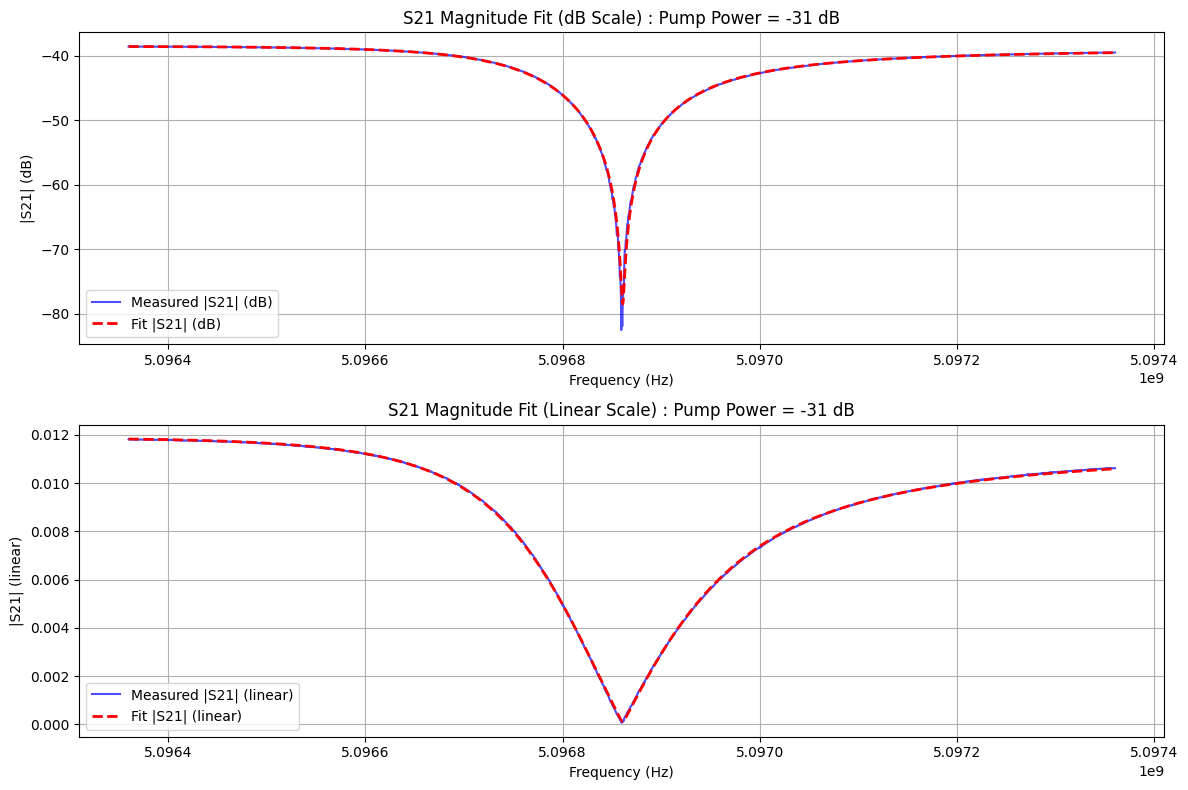

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq


folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps\\opposition line 5.09686043'
filename= '-31 dBm pump -41 dBm probe + opp line.txt'
pump_power= -31
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        29572.4             # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")
    print(f"asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final


p_fitted = analyze_s21_logmag(freq*1e9, logMag, pump_power)
Storing_pFinal_215mK[pump_power]=p_fitted
# Store the fitted parameters in the dictionaries
# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)



=== Fitted Parameters ===
Resonance frequency (Hz): 5.096830e+09
Total damping Γ₀ (Hz): 281392.8
Coupling rate Γc (Hz): 277496.0
Quality factor Q₀: 18112.9
Γin (Hz): 3896.790623080201
asymmetry parameter wd (Hz): -28929.3


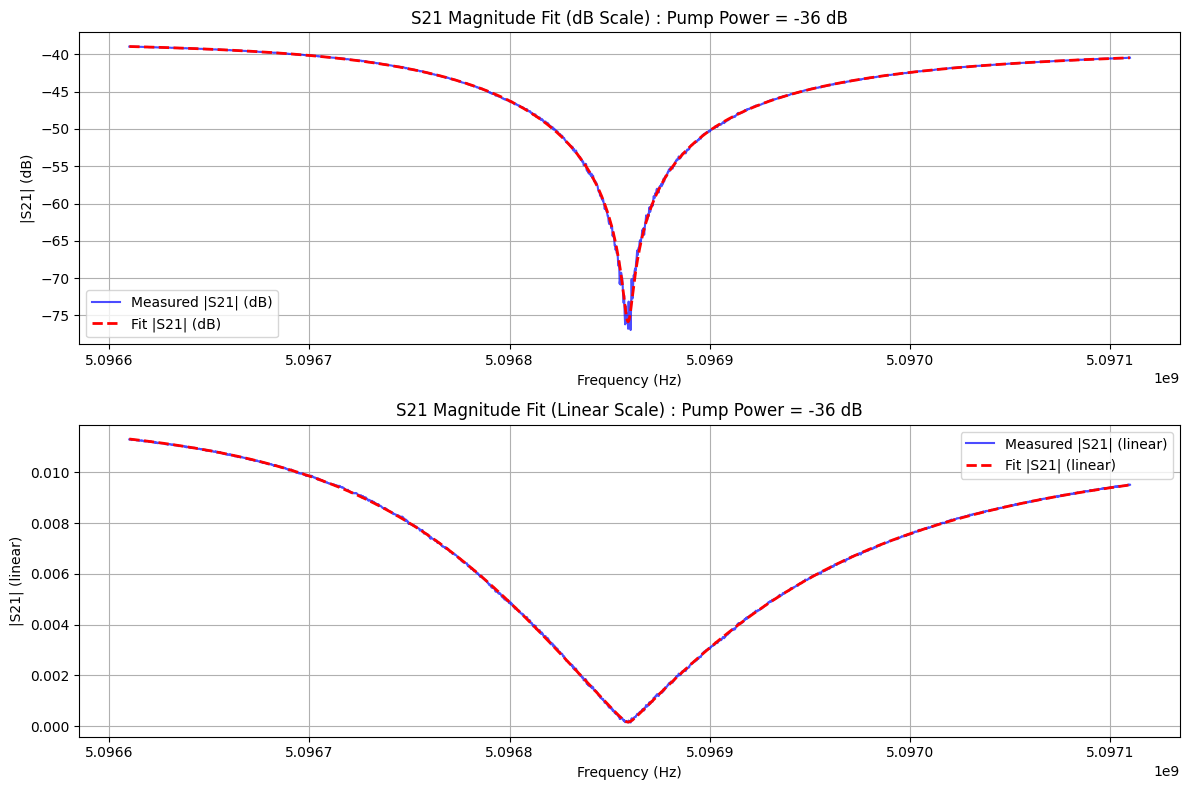

In [3]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096830e+09 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.5e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
       -28929.3          # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps\\opposition line 5.09686043'
filename= '-36 dBm pump -46 dBm probe + opp line.txt'
pump_power= -36
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)

S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Storing_pFinal_215mK[pump_power]=p_fitted
# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096829e+09
Total damping Γ₀ (Hz): 283567.0
Coupling rate Γc (Hz): 276710.4
Quality factor Q₀: 17974.0
Γin (Hz): 6856.566107864464
asymmetry parameter wd (Hz): -29463.6


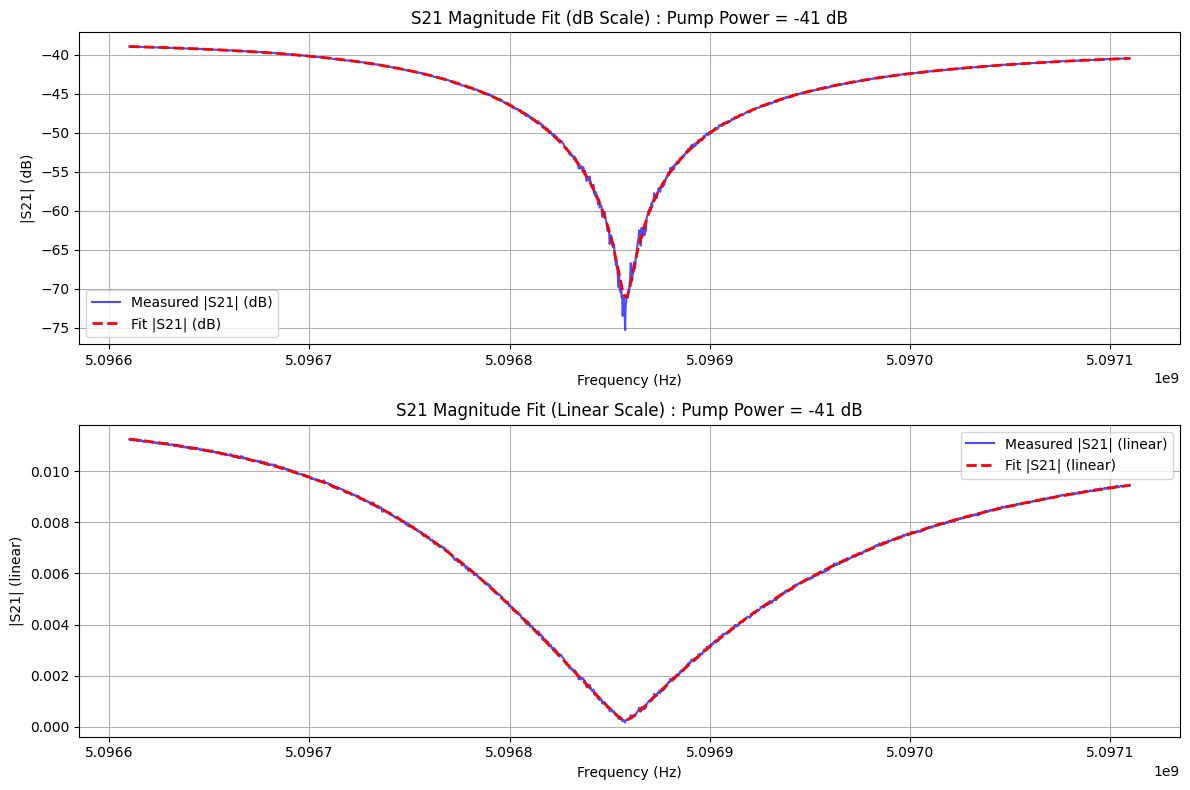

In [4]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        29572.4             # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps\\opposition line 5.09686043'
filename= '-41 dBm pump -51 dBm probe + opp line.txt'
pump_power= -41
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)

S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Storing_pFinal_215mK[pump_power]=p_fitted
# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096832e+09
Total damping Γ₀ (Hz): 282884.1
Coupling rate Γc (Hz): 273165.0
Quality factor Q₀: 18017.4
Γin (Hz): 9719.03839393066
asymmetry parameter wd (Hz): -27537.3


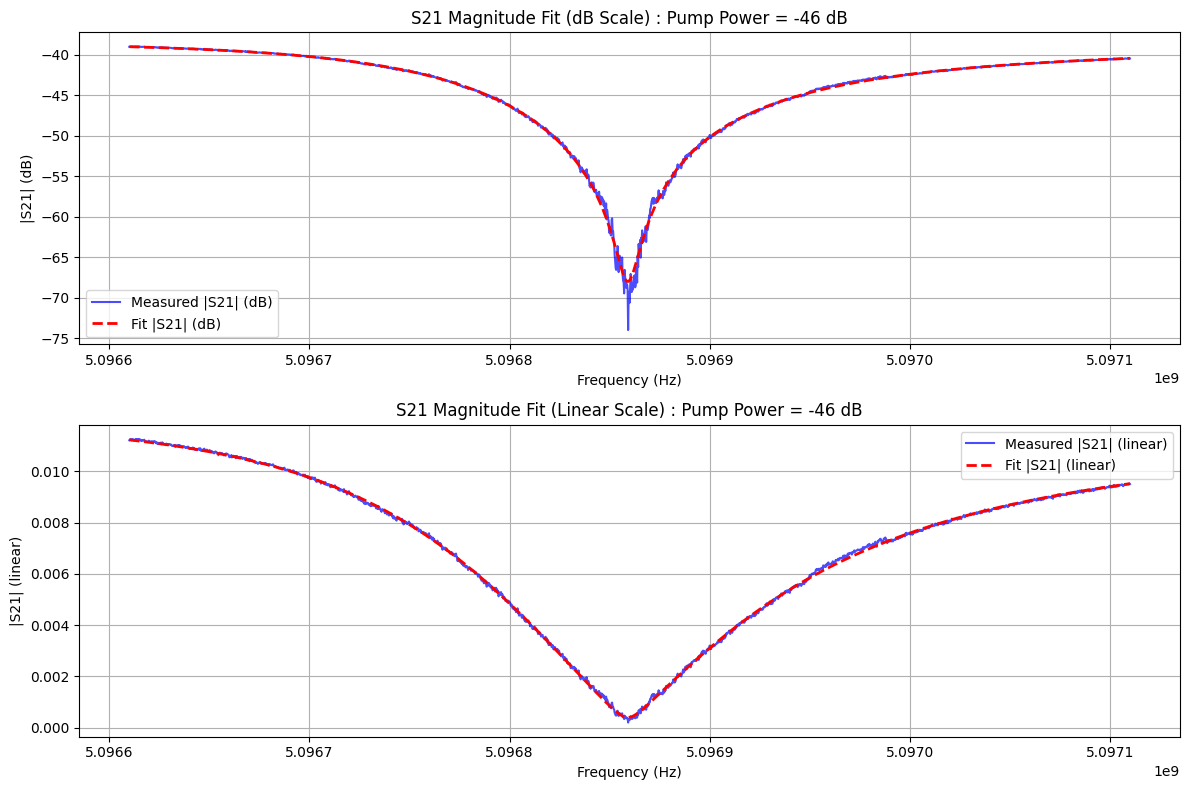

 amplitude scaling factor:  0.011844953899890662


In [5]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac  - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.4e5 * 2 * np.pi, # Gammac (rad/s)
        0.0118449,               # A (amplitude scaling)
        -27537.3    # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps\\opposition line 5.09686043'
filename= '-46 dBm pump -56 dBm probe + opp line.txt'
pump_power= -46
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)

S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag, pump_power)
Storing_pFinal_215mK[pump_power]=p_fitted
# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)
print(" amplitude scaling factor: ", Scaling_factor[pump_power])

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096831e+09
Total damping Γ₀ (Hz): 292709.6
Coupling rate Γc (Hz): 278273.6
Quality factor Q₀: 17412.6
Γin (Hz): 14436.062852582178
asymmetry parameter wd (Hz): -28123.3


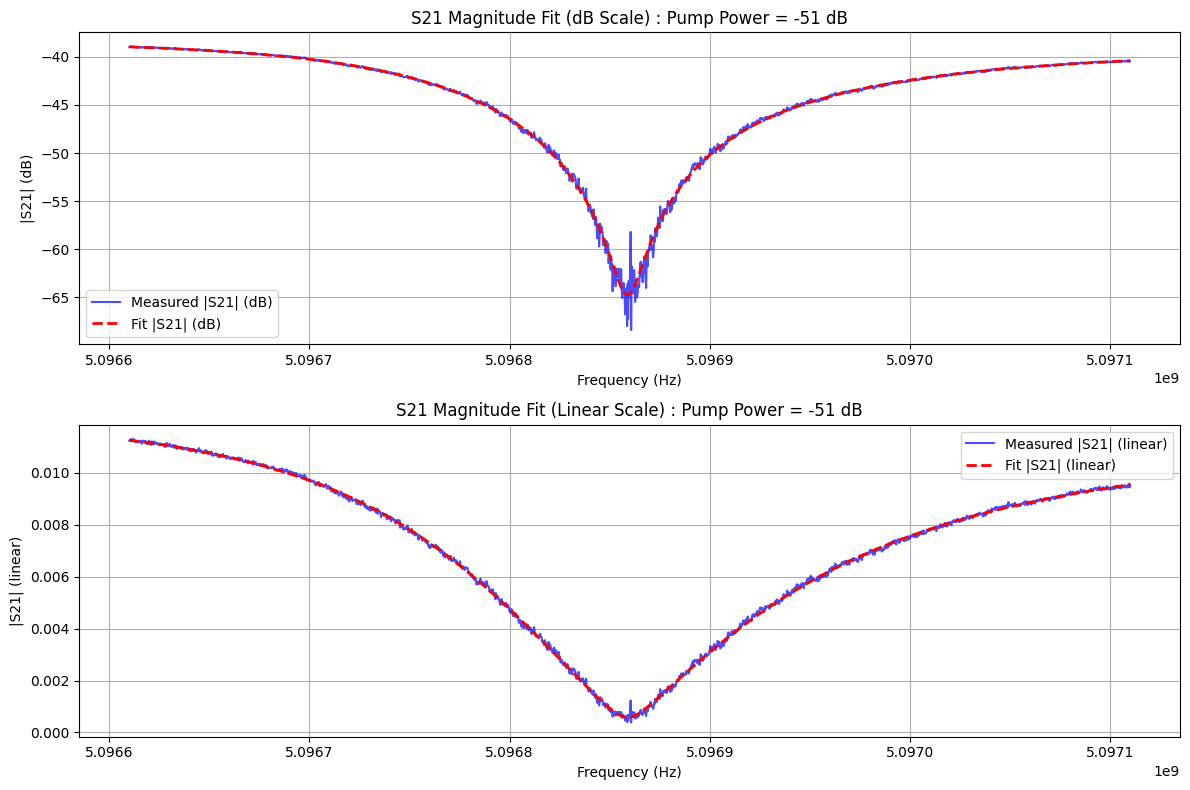

In [6]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.5e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        -28123.3    # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps\\opposition line 5.09686043'
filename= '-51 dBm pump -61 dBm probe + opp line.txt'
pump_power= -51
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)

S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)
Storing_pFinal_215mK[pump_power]=p_fitted

# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096826e+09
Total damping Γ₀ (Hz): 298907.2
Coupling rate Γc (Hz): 273255.2
Quality factor Q₀: 17051.5
Γin (Hz): 25651.991444112078
asymmetry parameter wd (Hz): -28364.7


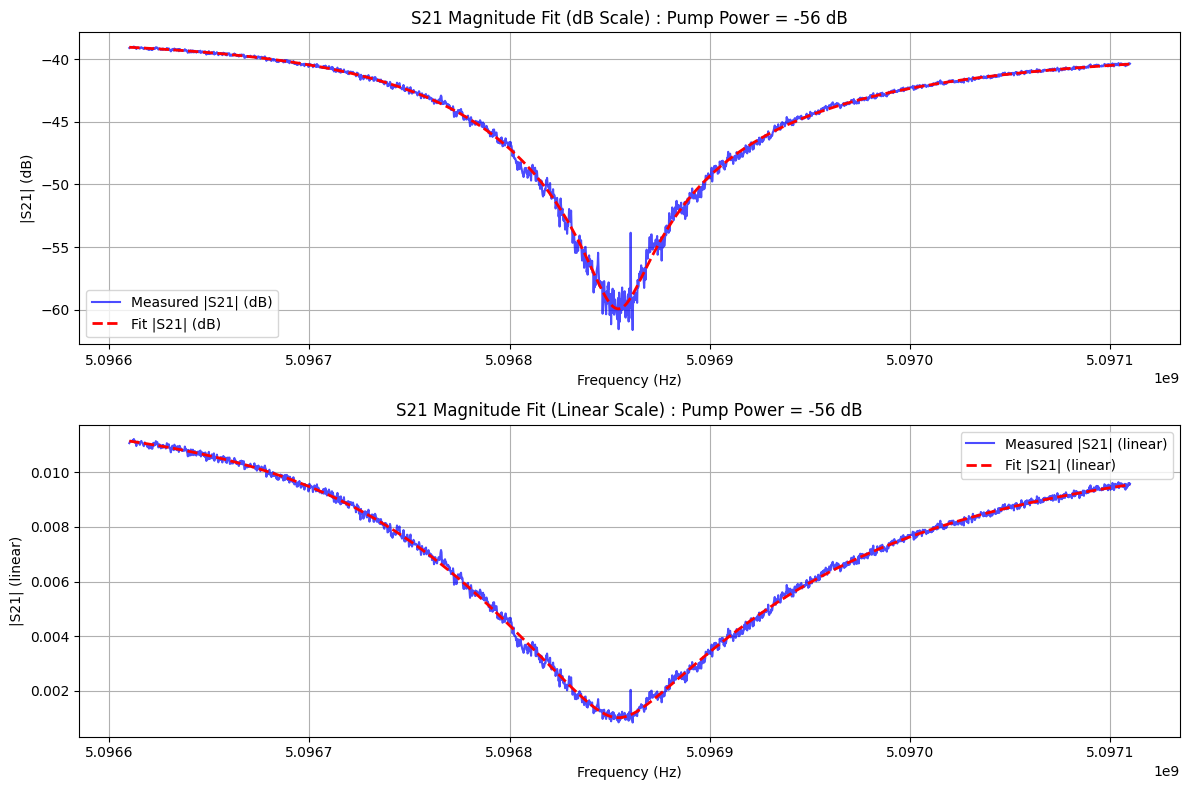

In [7]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
         2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        11022554.5 # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps\\opposition line 5.09686043'
filename= '-56 dBm pump -66 dBm probe + opp line.txt'
pump_power= -56
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)

S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)
Storing_pFinal_215mK[pump_power]=p_fitted
# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)

In [8]:
print("internal damping for different pump powers:")
for power, band in damping_gammac_as_parameter.items():
    print(f"Pump Power: {power} dBm, Γin (Hz): {band:.6f} Hz")
print("scaling factor for different pump powers:")
for power, scale in Scaling_factor.items():
    print(f"Pump Power: {power} dBm, Scaling Factor: {scale:.6f}")

internal damping for different pump powers:
Pump Power: -31 dBm, Γin (Hz): 2913.435889 Hz
Pump Power: -36 dBm, Γin (Hz): 3896.790623 Hz
Pump Power: -41 dBm, Γin (Hz): 6856.566108 Hz
Pump Power: -46 dBm, Γin (Hz): 9719.038394 Hz
Pump Power: -51 dBm, Γin (Hz): 14436.062853 Hz
Pump Power: -56 dBm, Γin (Hz): 25651.991444 Hz
scaling factor for different pump powers:
Pump Power: -31 dBm, Scaling Factor: 0.011597
Pump Power: -36 dBm, Scaling Factor: 0.011862
Pump Power: -41 dBm, Scaling Factor: 0.011820
Pump Power: -46 dBm, Scaling Factor: 0.011845
Pump Power: -51 dBm, Scaling Factor: 0.011975
Pump Power: -56 dBm, Scaling Factor: 0.011970


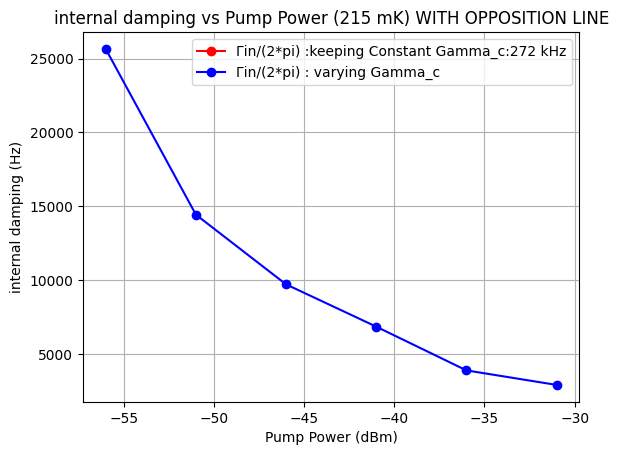

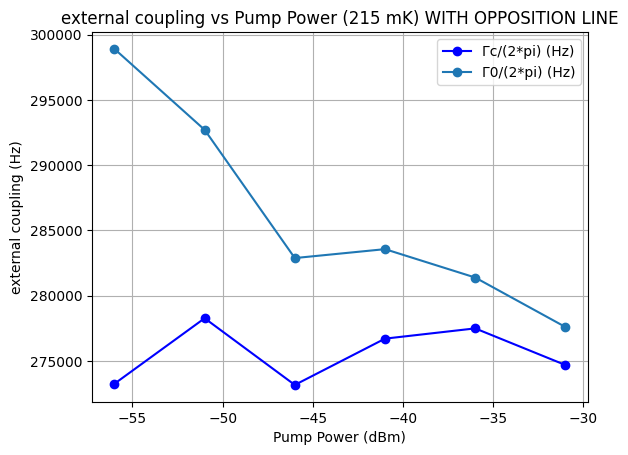

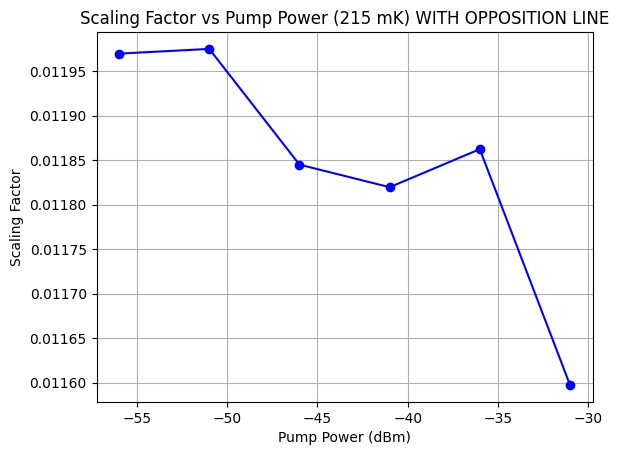

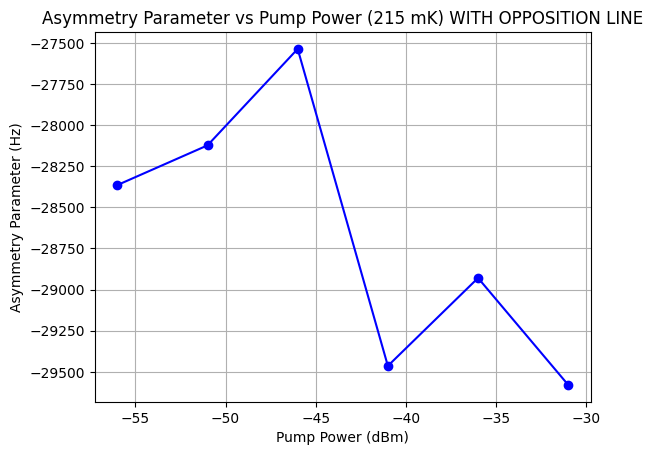

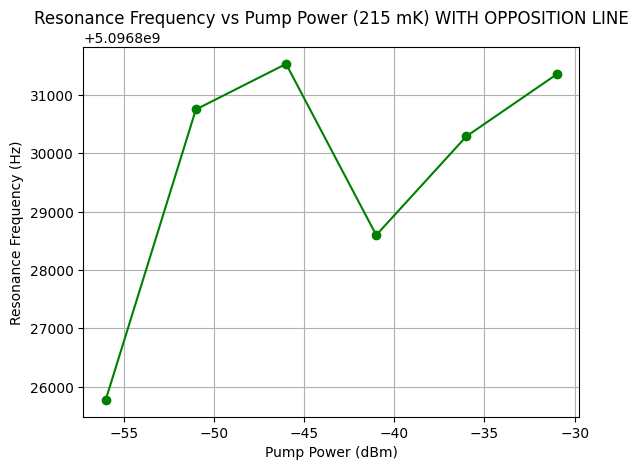

In [9]:
plot(list(Band.keys()), list(Band.values()), 'ro-', label='Γin/(2*pi) :keeping Constant Gamma_c:272 kHz')
plot(list(damping_gammac_as_parameter.keys()), list(damping_gammac_as_parameter.values()), 'bo-',label="Γin/(2*pi) : varying Gamma_c")
xlabel('Pump Power (dBm)')
ylabel('internal damping (Hz)')
title('internal damping vs Pump Power (215 mK) WITH OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(external_coupling.keys()), list(external_coupling.values()), 'bo-', label='Γc/(2*pi) (Hz)')
plot(list(gamma0.keys()), list(gamma0.values()), 'o-', label='Γ0/(2*pi) (Hz)')
xlabel('Pump Power (dBm)')
ylabel('external coupling (Hz)')    
title('external coupling vs Pump Power (215 mK) WITH OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(Scaling_factor.keys()), list(Scaling_factor.values()), 'bo-')
xlabel('Pump Power (dBm)')
ylabel('Scaling Factor')
grid(True)
title('Scaling Factor vs Pump Power (215 mK) WITH OPPOSITION LINE')
show()
plot(list(asymmetry_parameter.keys()), list(asymmetry_parameter.values()), 'bo-')
xlabel('Pump Power (dBm)')
ylabel('Asymmetry Parameter (Hz)')
title('Asymmetry Parameter vs Pump Power (215 mK) WITH OPPOSITION LINE')
grid(True)
show()
plot(list(resonance_frequency.keys()), list(resonance_frequency.values()), 'go-')
xlabel('Pump Power (dBm)')
ylabel('Resonance Frequency (Hz)')
title('Resonance Frequency vs Pump Power (215 mK) WITH OPPOSITION LINE')
grid(True)
show()


## without the optimised opposition line

In [20]:
import pandas as pd
import numpy as np  
# from scipy import find_peaks
import matplotlib.pyplot as plt
import cmath
import math as m
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit, leastsq
from pylab import *
import glob
from datetime import *


=== Fitted Parameters ===
Resonance frequency (Hz): 5.096832e+09
Total damping Γ₀ (Hz): 294301.4
Coupling rate Γc (Hz): 280000.0
Quality factor Q₀: 17318.4
asymmetry parameter wd (Hz): -29171.4
Amplitude scaling factor A: 0.012361
Γin (Hz): 14301.406161120025


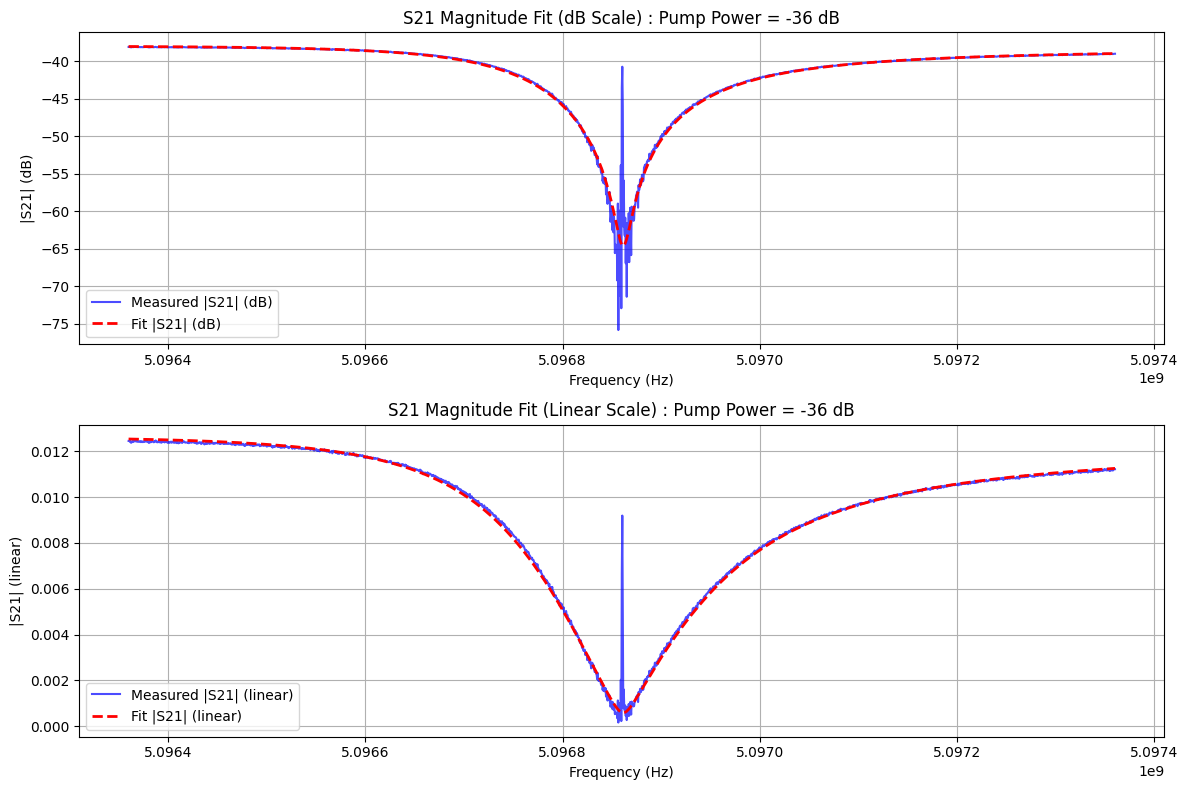

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

Band2={}
external_damping01={}
Scaling_factor2={}
asymmetry_parameter2={}
resonance_frequency2={}
total_damping={}
folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-36 dBm pump -46 dBm probe.txt'
pump_power= -36
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)

S21_linear = 10**(logMag / 20)  # Convert from dB to linear


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (280000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.8e5 * 2 * np.pi, # Gammac (rad/s)
        1,               # A (amplitude scaling)
        0               # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    print(f"asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
    print(f"Amplitude scaling factor A: {A_fit:.6f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)



=== Fitted Parameters ===
Resonance frequency (Hz): 5.096832e+09
Total damping Γ₀ (Hz): 294491.0
Coupling rate Γc (Hz): 280000.0
Quality factor Q₀: 17307.3
asymmetry parameter wd (Hz): -28781.0
Amplitude scaling factor A: 0.012341
Γin (Hz): 14490.973747579468


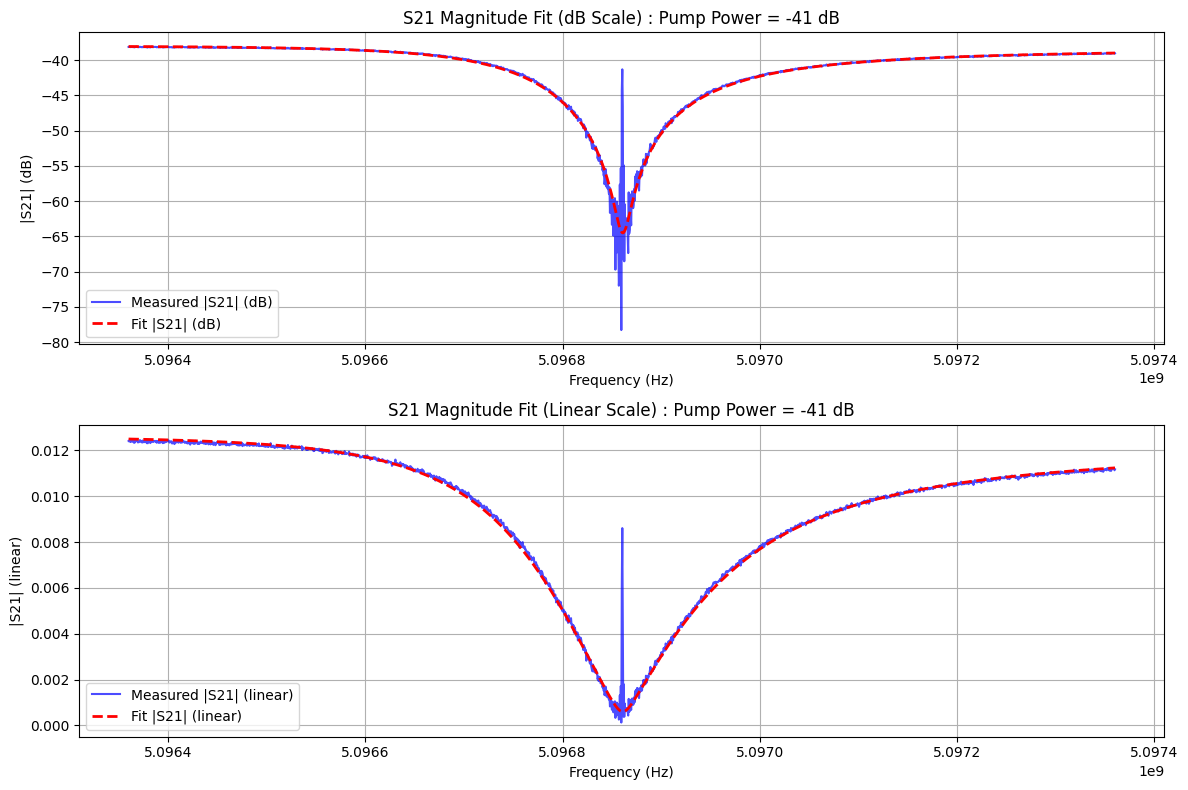

In [5]:
folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-41 dBm pump -51 dBm probe.txt'
pump_power= -41
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096833e+09
Total damping Γ₀ (Hz): 295762.8
Coupling rate Γc (Hz): 280000.0
Quality factor Q₀: 17232.8
asymmetry parameter wd (Hz): -28321.3
Amplitude scaling factor A: 0.012400
Γin (Hz): 15762.828767399405


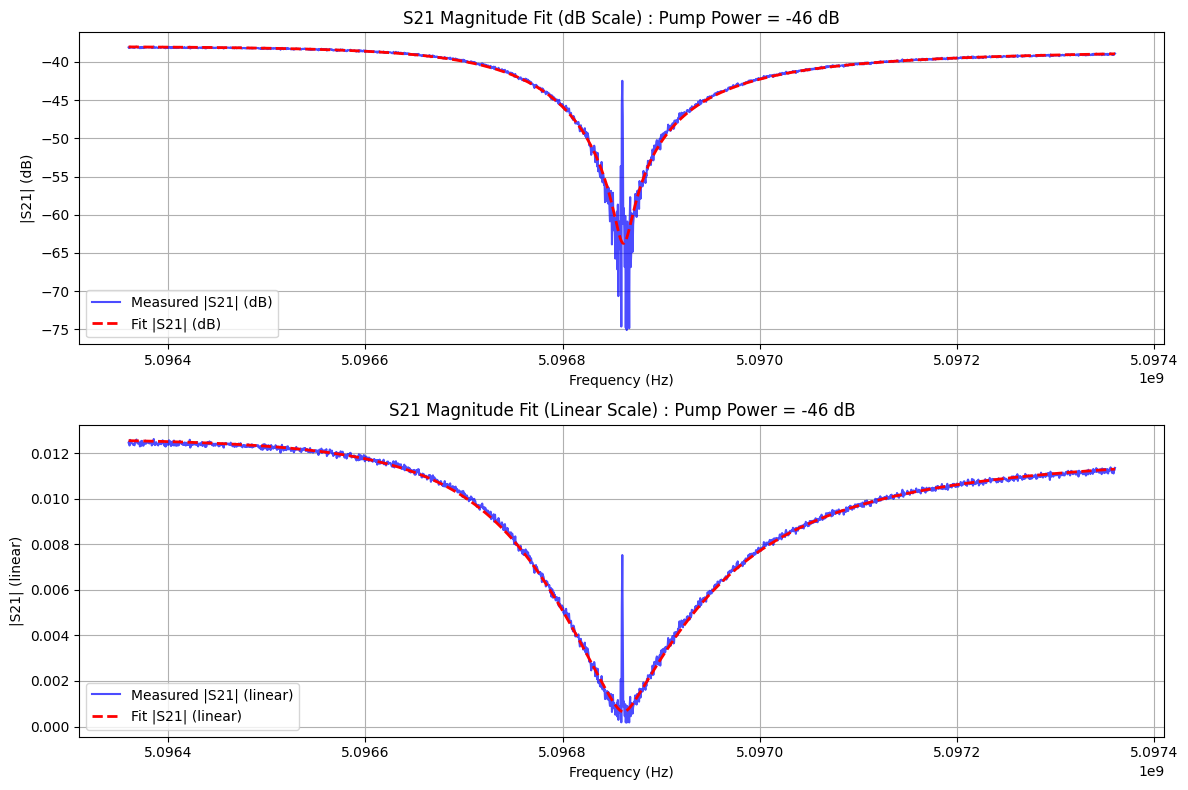

In [57]:
folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-46 dBm pump -56 dBm probe.txt'
pump_power= -46
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])  
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096837e+09
Total damping Γ₀ (Hz): 299097.0
Coupling rate Γc (Hz): 280000.0
Quality factor Q₀: 17040.7
asymmetry parameter wd (Hz): -28161.4
Amplitude scaling factor A: 0.012387
Γin (Hz): 19097.013287228085


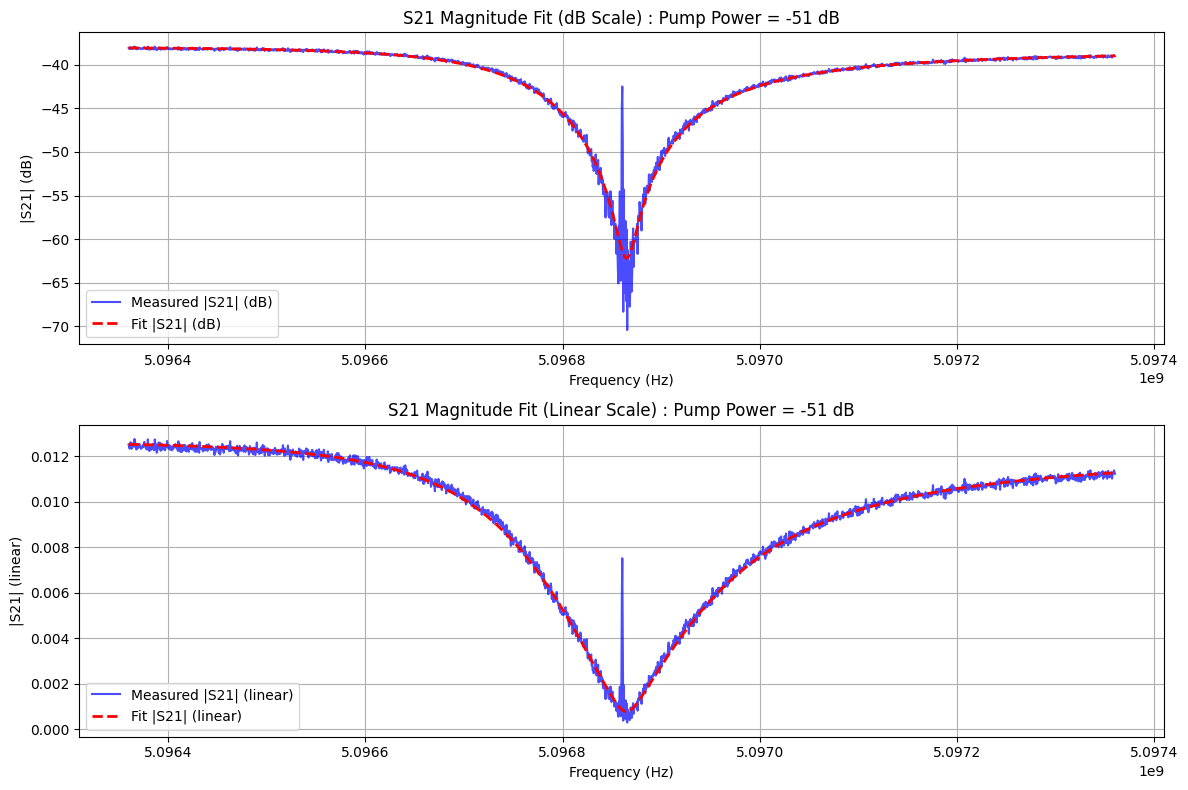

In [58]:
folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-51 dBm pump -61 dBm probe.txt'
pump_power= -51
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096837e+09
Total damping Γ₀ (Hz): 299097.0
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 17040.7
asymmetry parameter wd (Hz): -28161.4
Amplitude scaling factor A: 0.012387
Γin (Hz): 27097.013287228074


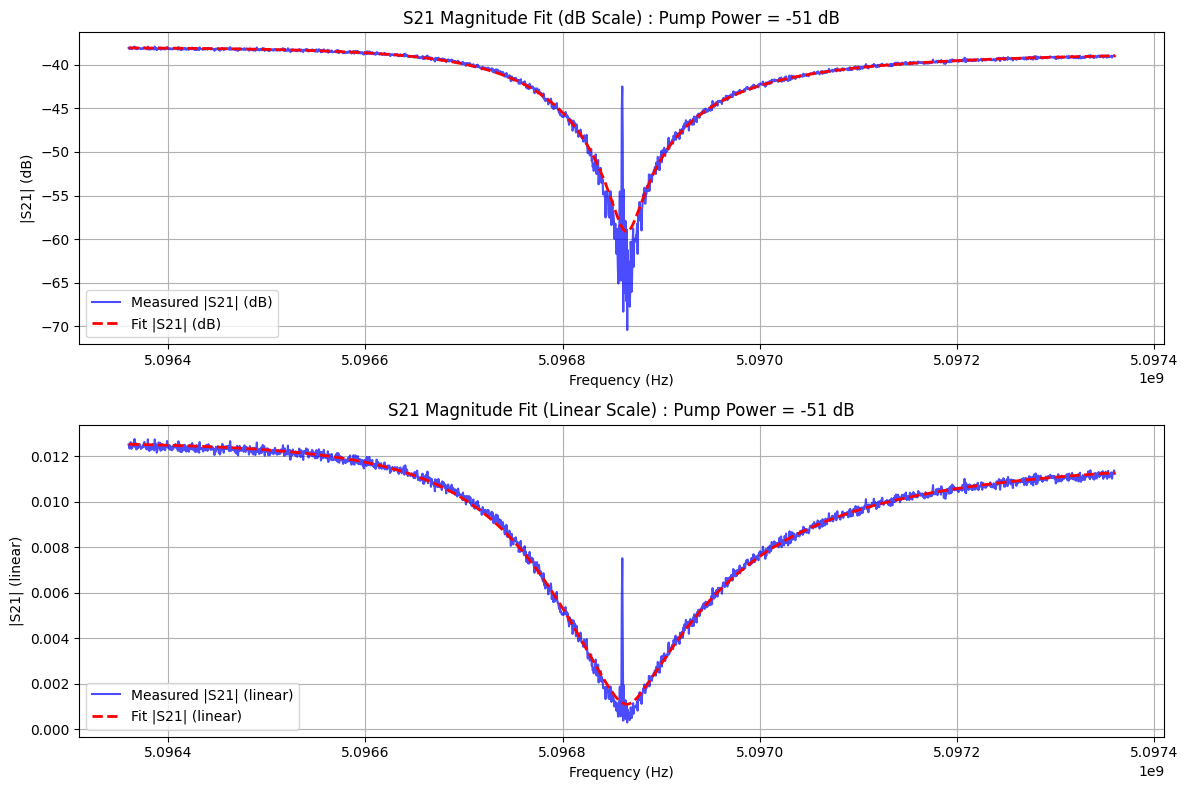

In [59]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (280000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6*np.pi*2,   # Gamma0 (rad/s)
        272000*np.pi*2, # Gammac (rad/s)
        1,               # A (amplitude scaling)
        0              # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    print(f"asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
    print(f"Amplitude scaling factor A: {A_fit:.6f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final


p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)
folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-56 dBm pump -66 dBm probe.txt'
pump_power= -56
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[616:1462]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear


Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096843e+09
Total damping Γ₀ (Hz): 321317.3
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 15862.3
asymmetry parameter wd (Hz): -26600.8
Amplitude scaling factor A: 0.011868
Γin (Hz): 49317.31644146653


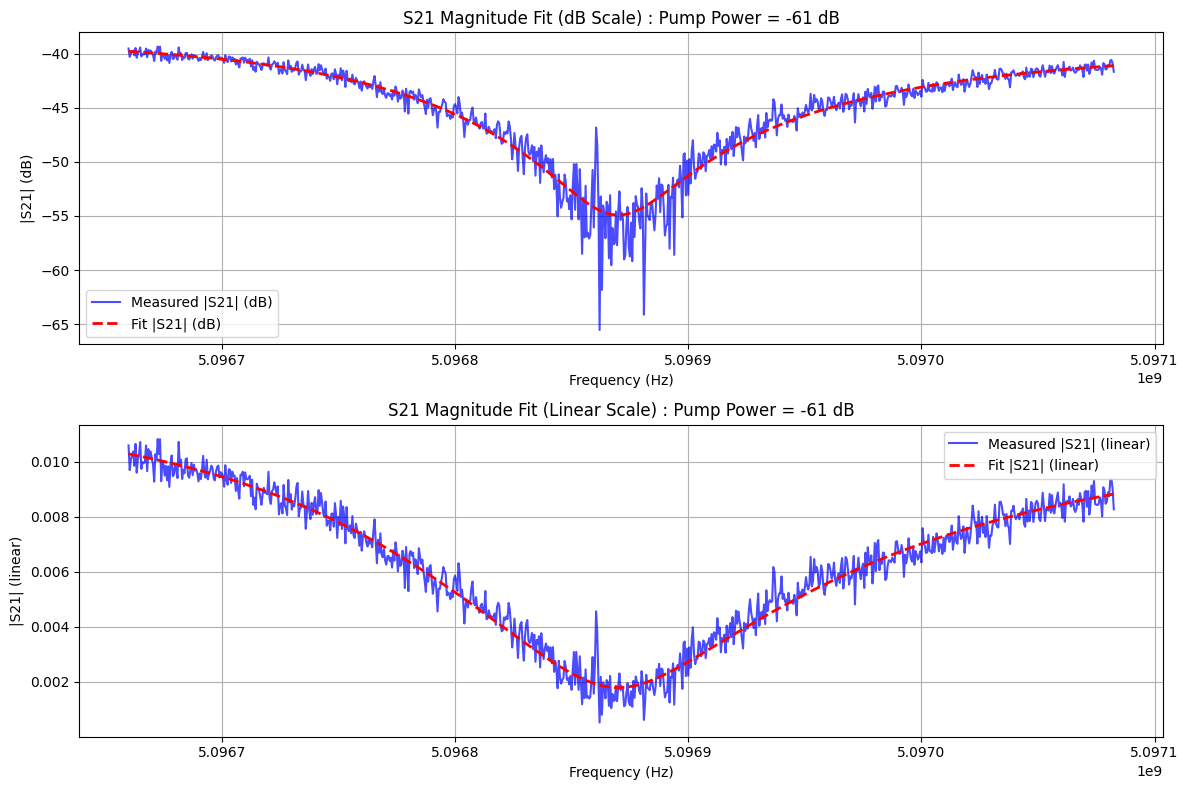

In [60]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6*np.pi*2,   # Gamma0 (rad/s)
        272000*np.pi*2, # Gammac (rad/s)
        0.011397,               # A (amplitude scaling)
        -25564.3             # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    print(f"asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
    print(f"Amplitude scaling factor A: {A_fit:.6f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final

folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-61 dBm pump -71 dBm probe.txt'
pump_power= -61
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[616:1462]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096826e+09
Total damping Γ₀ (Hz): 355939.0
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 14319.4
asymmetry parameter wd (Hz): -36068.6
Amplitude scaling factor A: 0.011892
Γin (Hz): 83938.98070100608


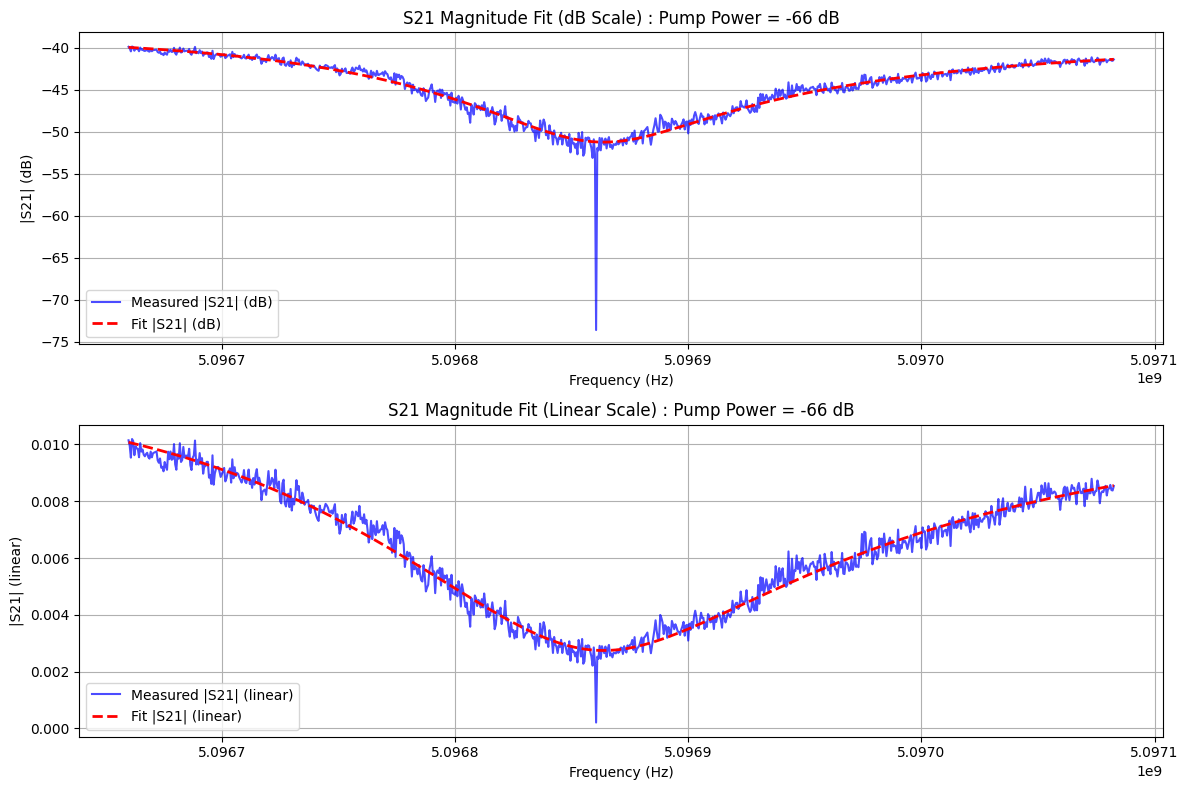

In [66]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.09686043e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6*np.pi*2,   # Gamma0 (rad/s)
        272000*np.pi*2, # Gammac (rad/s)
       0.010520,               # A (amplitude scaling)
        -27654.6             # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    print(f"asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
    print(f"Amplitude scaling factor A: {A_fit:.6f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final


folder='EPFL sample 1 5.1 GHz 215 mK\\215 mK cavity sweeps'
filename= '-66 dBm pump -76 dBm probe.txt'
pump_power= -66
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[616:1462]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band2[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping01[pump_power]=p_fitted[2]/(2*np.pi)
total_damping[pump_power]=p_fitted[1]/(2*np.pi)
Scaling_factor2[pump_power]=p_fitted[3]
asymmetry_parameter2[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency2[pump_power]=p_fitted[0]/(2*np.pi)

In [67]:
print("internal damping for different pump powers:")
for power, band in Band2.items():
    print(f"Pump Power: {power} dBm, Γin (Hz): {band:.6f} Hz")
print("external damping for different pump powers:")
for power, band in external_damping01.items():
    print(f"Pump Power: {power} dBm, Γex (Hz): {band:.6f} Hz")
print("scaling factor for different pump powers:")
for power, scale in Scaling_factor2.items():
    print(f"Pump Power: {power} dBm, Scaling Factor: {scale:.6f}")

internal damping for different pump powers:
Pump Power: -36 dBm, Γin (Hz): 14301.406161 Hz
Pump Power: -41 dBm, Γin (Hz): 14490.973748 Hz
Pump Power: -46 dBm, Γin (Hz): 15762.828767 Hz
Pump Power: -51 dBm, Γin (Hz): 19097.013287 Hz
Pump Power: -56 dBm, Γin (Hz): 27097.013287 Hz
Pump Power: -61 dBm, Γin (Hz): 49317.316441 Hz
Pump Power: -66 dBm, Γin (Hz): 83938.980701 Hz
external damping for different pump powers:
Pump Power: -36 dBm, Γex (Hz): 280000.000000 Hz
Pump Power: -41 dBm, Γex (Hz): 280000.000000 Hz
Pump Power: -46 dBm, Γex (Hz): 280000.000000 Hz
Pump Power: -51 dBm, Γex (Hz): 280000.000000 Hz
Pump Power: -56 dBm, Γex (Hz): 272000.000000 Hz
Pump Power: -61 dBm, Γex (Hz): 272000.000000 Hz
Pump Power: -66 dBm, Γex (Hz): 272000.000000 Hz
scaling factor for different pump powers:
Pump Power: -36 dBm, Scaling Factor: 0.012361
Pump Power: -41 dBm, Scaling Factor: 0.012341
Pump Power: -46 dBm, Scaling Factor: 0.012400
Pump Power: -51 dBm, Scaling Factor: 0.012387
Pump Power: -56 dBm, 

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_8708\3512199441.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


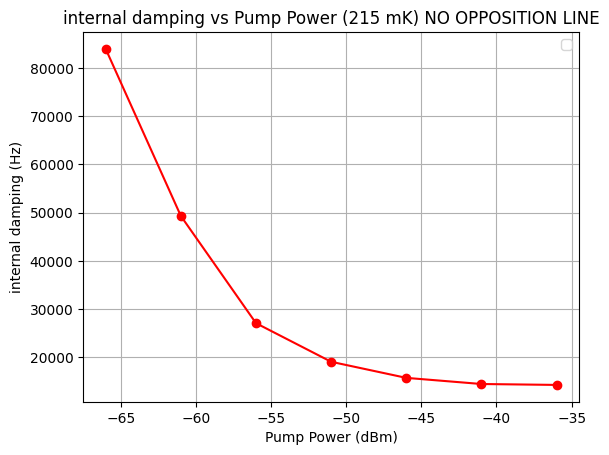

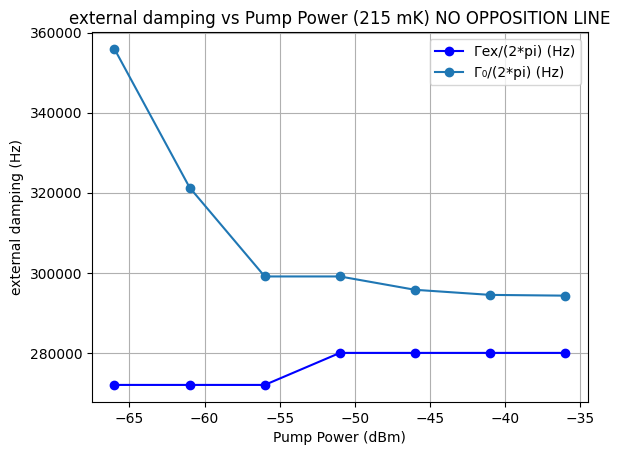

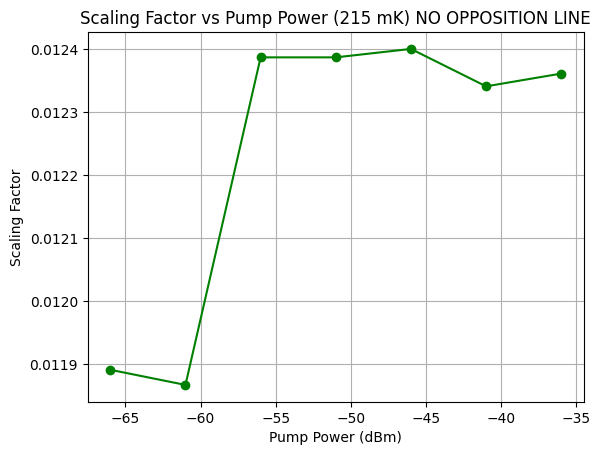

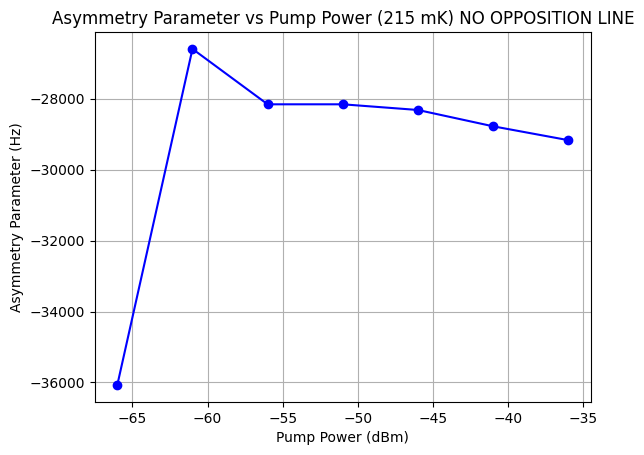

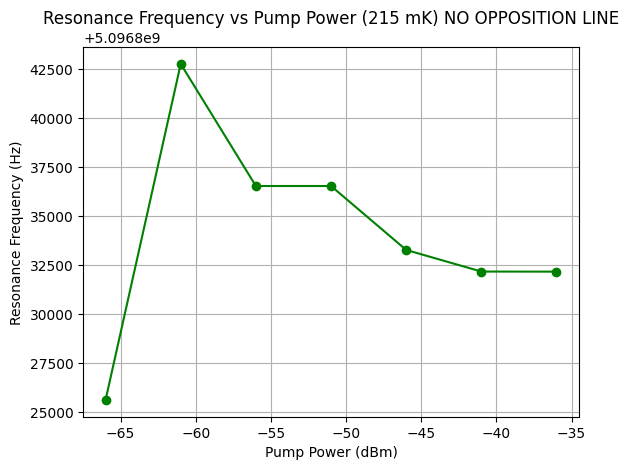

In [71]:
plot(list(Band2.keys()), list(Band2.values()), 'ro-')
xlabel('Pump Power (dBm)')
ylabel('internal damping (Hz)')
title('internal damping vs Pump Power (215 mK) NO OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(external_damping01.keys()), list(external_damping01.values()), 'bo-', label='Γex/(2*pi) (Hz)')
plot(list(total_damping.keys()), list(total_damping.values()),"o-", label='Γ₀/(2*pi) (Hz)')
xlabel('Pump Power (dBm)')
ylabel('external damping (Hz)')
title('external damping vs Pump Power (215 mK) NO OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(Scaling_factor2.keys()), list(Scaling_factor2.values()), 'go-')
xlabel('Pump Power (dBm)')
ylabel('Scaling Factor')
grid(True)
title('Scaling Factor vs Pump Power (215 mK) NO OPPOSITION LINE')
show()
plot(list(asymmetry_parameter2.keys()), list(asymmetry_parameter2.values()), 'bo-')
xlabel('Pump Power (dBm)')
ylabel('Asymmetry Parameter (Hz)')
title('Asymmetry Parameter vs Pump Power (215 mK) NO OPPOSITION LINE')
grid(True)
show()
plot(list(resonance_frequency2.keys()), list(resonance_frequency2.values()), 'go-')
xlabel('Pump Power (dBm)')
ylabel('Resonance Frequency (Hz)')
title('Resonance Frequency vs Pump Power (215 mK) NO OPPOSITION LINE')
grid(True)
show()

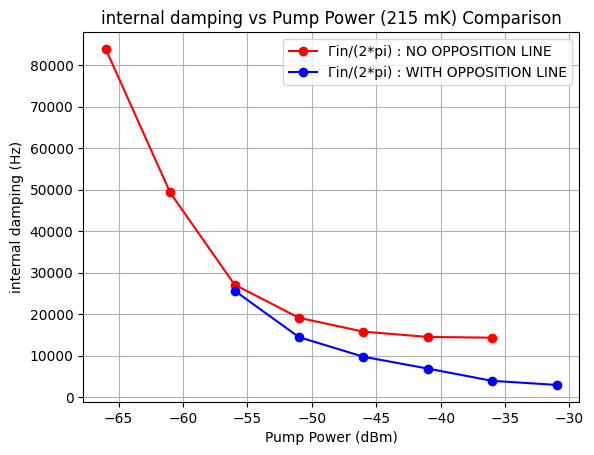

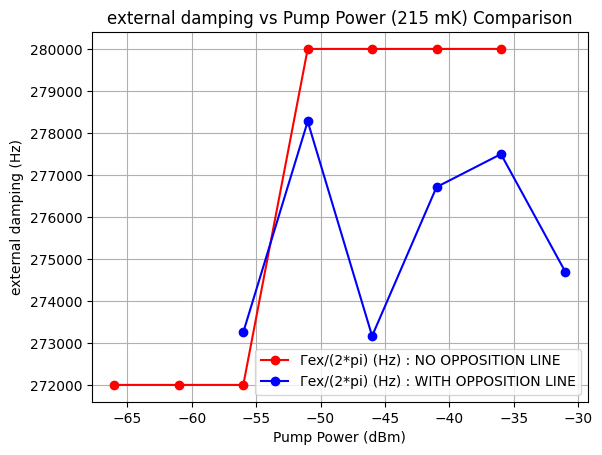

In [103]:
# plotting comparison of internal damping with and without opposition line
plot(list(Band2.keys()), list(Band2.values()), 'ro-', label='Γin/(2*pi) : NO OPPOSITION LINE')
plot(list(damping_gammac_as_parameter.keys()), list(damping_gammac_as_parameter.values()), 'bo-',label="Γin/(2*pi) : WITH OPPOSITION LINE")
xlabel('Pump Power (dBm)')
ylabel('internal damping (Hz)')
title('internal damping vs Pump Power (215 mK) Comparison')
grid(True)
legend()
show()
# comparison of external damping with and without opposition line
plot(list(external_damping01.keys()), list(external_damping01.values()), 'ro-', label='Γex/(2*pi) (Hz) : NO OPPOSITION LINE')
plot(list(external_coupling.keys()), list(external_coupling.values()), 'bo-', label='Γex/(2*pi) (Hz) : WITH OPPOSITION LINE')
xlabel('Pump Power (dBm)')
ylabel('external damping (Hz)')
title('external damping vs Pump Power (215 mK) Comparison')
grid(True)
legend()
show()

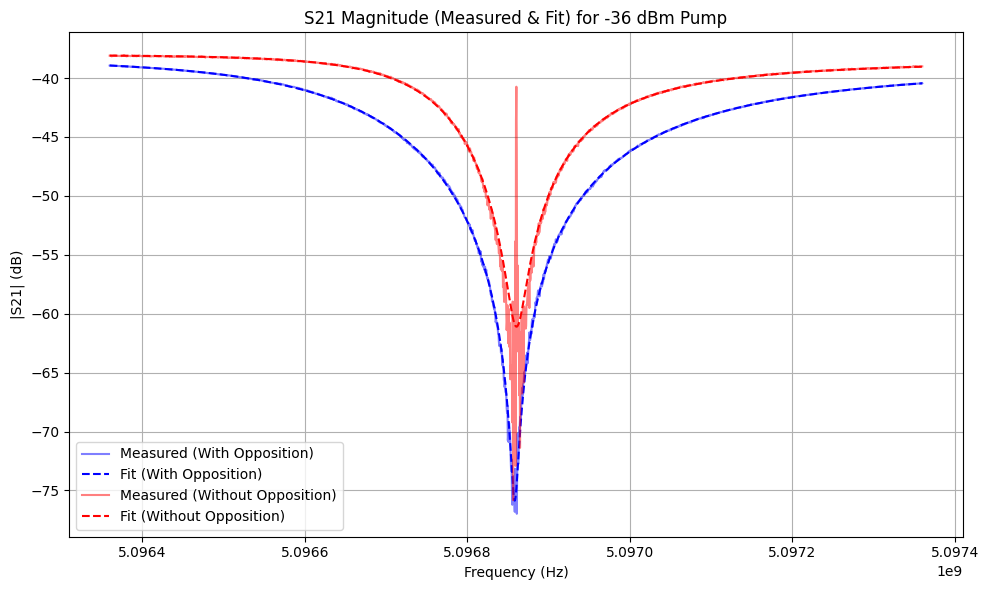

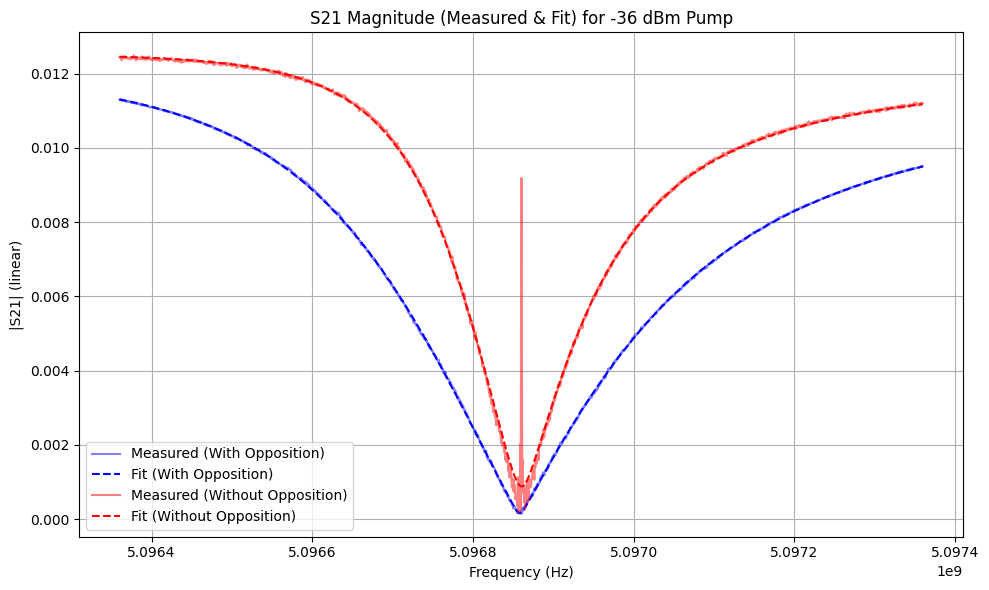

Fitted Parameters with Opposition Line:
Resonance frequency (Hz): 5.096830e+09
Total damping Γ₀ (Hz): 281392.8
Coupling rate Γc (Hz): 277496.0
internal damping Γin (Hz): 3896.8
Quality factor Q₀: 18112.9
Asymmetry parameter wd (Hz): -28929.3
Amplitude scaling factor A: 0.011862
Fitted Parameters without Opposition Line:
Resonance frequency (Hz): 5.096831e+09
Total damping Γ₀ (Hz): 284762.3
Coupling rate Γc (Hz): 263862.0
internal damping Γin (Hz): 20900.3
Quality factor Q₀: 17898.5
Asymmetry parameter wd (Hz): -29179.1
Amplitude scaling factor A: 0.012253


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096830e+09 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.5e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
       -28929.3          # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


# --- Load and fit WITH opposition line ---
folder = r'EPFL sample 1 5.1 GHz 215 mK\215 mK cavity sweeps\opposition line 5.09686043'
filename = '-36 dBm pump -46 dBm probe + opp line.txt'
pump_power = -36
freq = []
S21 = []
with open(folder + '\\' + filename, 'r') as f:
    data = f.readlines()
for line in data[16:]:
    fields = line.split('\t')
    freq.append(float(fields[1]))
    S21.append(float(fields[2]))
freq = np.array(freq)
logMag = np.array(S21)
freq_Hz = freq * 1e9  # If your freq is in GHz, convert to Hz

p_with, S21_linear_with = fit_s21_magnitude(freq_Hz, logMag)
w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_with
omega = 2 * np.pi * freq_Hz
s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
s21_fit_mag = A_fit * np.abs(s21_fit_complex)
s21_fit_dB = 20 * np.log10(s21_fit_mag)


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096830e+09 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.8e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
       -28929.3          # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


# --- Load and fit WITHOUT opposition line ---
folder = r'EPFL sample 1 5.1 GHz 215 mK\215 mK cavity sweeps'
filename = '-36 dBm pump -46 dBm probe.txt'
freq = []
S21 = []
with open(folder + '\\' + filename, 'r') as f:
    data = f.readlines()
for line in data[16:]:
    fields = line.split('\t')
    freq.append(float(fields[1]))
    S21.append(float(fields[2]))
freq = np.array(freq)
logMag = np.array(S21)
freq_Hz = freq * 1e9 

p_without, S21_linear_without = fit_s21_magnitude(freq_Hz, logMag)
w0_fit2, Gamma0_fit2, Gammac_fit2, A_fit2, wd_fit2 = p_without
omega2 = 2 * np.pi * freq_Hz
s21_fit_complex2 = 1 - (Gammac_fit2 - 2j*wd_fit2) / (Gamma0_fit2 + 2j*(omega2 - w0_fit2))
s21_fit_mag2 = A_fit2 * np.abs(s21_fit_complex2)
s21_fit_dB2 = 20 * np.log10(s21_fit_mag2)

# --- Plot both on the same figure ---
plt.figure(figsize=(10, 6))
plt.plot(freq_Hz, 20*np.log10(S21_linear_with), 'b-', alpha=0.5, label='Measured (With Opposition)')
plt.plot(freq_Hz, s21_fit_dB, 'b--',  label='Fit (With Opposition)')
plt.plot(freq_Hz, 20*np.log10(S21_linear_without), 'r-', alpha=0.5, label='Measured (Without Opposition)')
plt.plot(freq_Hz, s21_fit_dB2, 'r--', label='Fit (Without Opposition)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S21| (dB)')
plt.title('S21 Magnitude (Measured & Fit) for -36 dBm Pump')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# also plot in linear scale
plt.figure(figsize=(10, 6))
plt.plot(freq_Hz, S21_linear_with, 'b-', alpha=0.5, label='Measured (With Opposition)')
plt.plot(freq_Hz, s21_fit_mag, 'b--', label='Fit (With Opposition)')
plt.plot(freq_Hz, S21_linear_without, 'r-', alpha=0.5, label='Measured (Without Opposition)')
plt.plot(freq_Hz, s21_fit_mag2, 'r--', label='Fit (Without Opposition)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S21| (linear)')
plt.title('S21 Magnitude (Measured & Fit) for -36 dBm Pump')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print fitted parameters for both cases
print("Fitted Parameters with Opposition Line:")
print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
print(f"internal damping Γin (Hz): {(Gamma0_fit - Gammac_fit)/(2*np.pi):.1f}")
print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
print(f"Asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
print(f"Amplitude scaling factor A: {A_fit:.6f}")
print("Fitted Parameters without Opposition Line:")
print(f"Resonance frequency (Hz): {w0_fit2/(2*np.pi):.6e}")
print(f"Total damping Γ₀ (Hz): {Gamma0_fit2/(2*np.pi):.1f}")
print(f"Coupling rate Γc (Hz): {Gammac_fit2/(2*np.pi):.1f}")
print(f"internal damping Γin (Hz): {(Gamma0_fit2 - Gammac_fit2)/(2*np.pi):.1f}")
print(f"Quality factor Q₀: {w0_fit2/(Gamma0_fit2):.1f}")
print(f"Asymmetry parameter wd (Hz): {wd_fit2/(2*np.pi):.1f}")
print(f"Amplitude scaling factor A: {A_fit2:.6f}")

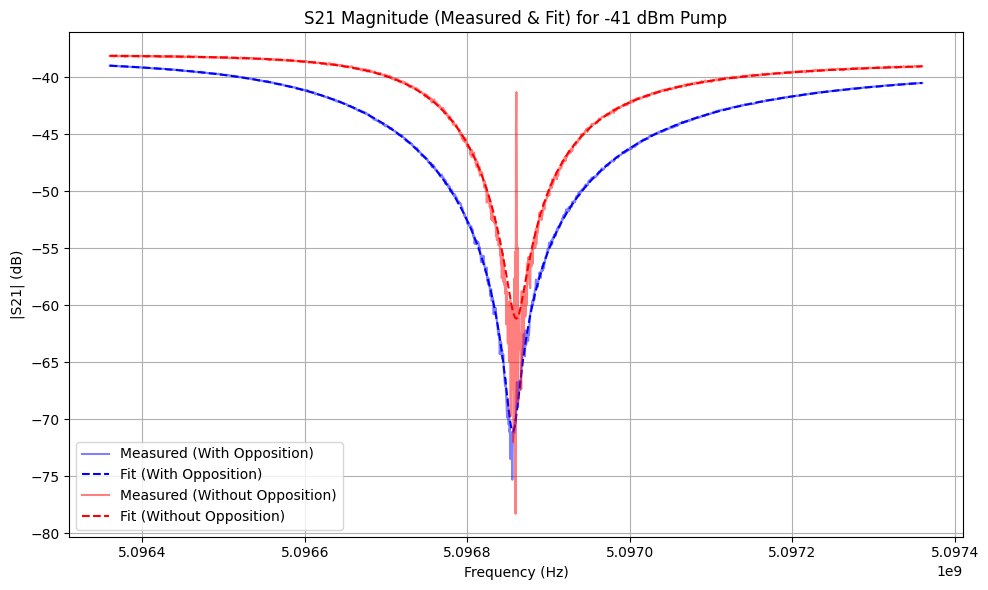

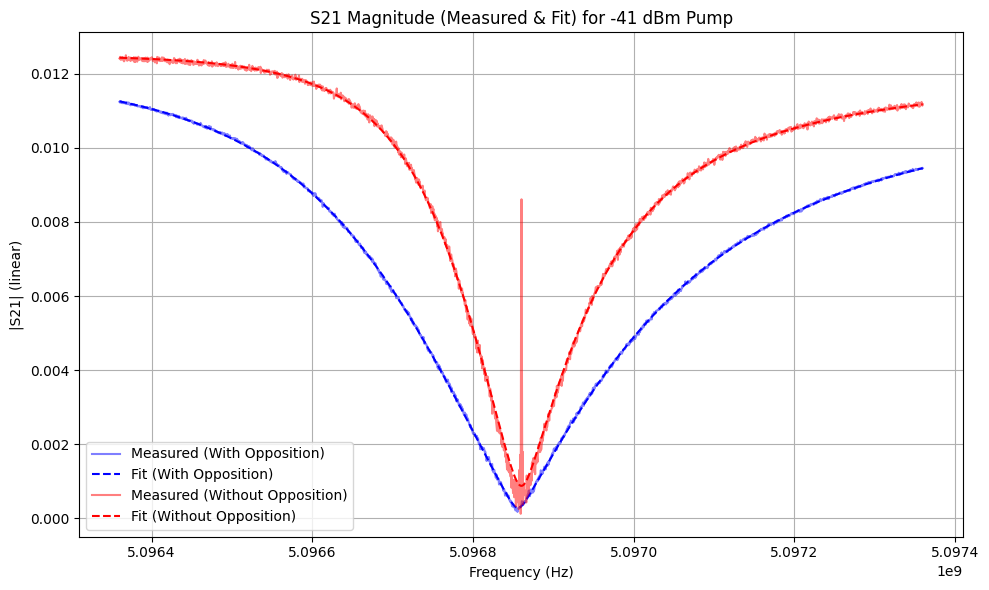

Fitted Parameters with Opposition Line:
Resonance frequency (Hz): 5.096829e+09
Total damping Γ₀ (Hz): 283567.0
Coupling rate Γc (Hz): 276710.5
internal damping Γin (Hz): 6856.5
Quality factor Q₀: 17974.0
Asymmetry parameter wd (Hz): -29463.6
Amplitude scaling factor A: 0.011820
Fitted Parameters without Opposition Line:
Resonance frequency (Hz): 5.096831e+09
Total damping Γ₀ (Hz): 285395.4
Coupling rate Γc (Hz): 264559.2
internal damping Γin (Hz): 20836.2
Quality factor Q₀: 17858.8
Asymmetry parameter wd (Hz): -28774.4
Amplitude scaling factor A: 0.012238


In [20]:
# doing the same for -41 dBm pump power

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096830e+09 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        29572.4          # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


# --- Load and fit WITH opposition line ---
folder = r'EPFL sample 1 5.1 GHz 215 mK\215 mK cavity sweeps\opposition line 5.09686043'
filename = '-41 dBm pump -51 dBm probe + opp line.txt'
pump_power = -41
freq = []
S21 = []
with open(folder + '\\' + filename, 'r') as f:
    data = f.readlines()
for line in data[16:]:
    fields = line.split('\t')
    freq.append(float(fields[1]))
    S21.append(float(fields[2]))
freq = np.array(freq)
logMag = np.array(S21)
freq_Hz = freq * 1e9  # If your freq is in GHz, convert to Hz

p_with, S21_linear_with = fit_s21_magnitude(freq_Hz, logMag)
w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_with
omega = 2 * np.pi * freq_Hz
s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
s21_fit_mag = A_fit * np.abs(s21_fit_complex)
s21_fit_dB = 20 * np.log10(s21_fit_mag)


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096830e+09 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.8e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
       -28929.3          # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag


# --- Load and fit WITHOUT opposition line ---
folder = r'EPFL sample 1 5.1 GHz 215 mK\215 mK cavity sweeps'
filename = '-41 dBm pump -51 dBm probe.txt'
freq = []
S21 = []
with open(folder + '\\' + filename, 'r') as f:
    data = f.readlines()
for line in data[16:]:
    fields = line.split('\t')
    freq.append(float(fields[1]))
    S21.append(float(fields[2]))
freq = np.array(freq)
logMag = np.array(S21)
freq_Hz = freq * 1e9 

p_without, S21_linear_without = fit_s21_magnitude(freq_Hz, logMag)
w0_fit2, Gamma0_fit2, Gammac_fit2, A_fit2, wd_fit2 = p_without
omega2 = 2 * np.pi * freq_Hz
s21_fit_complex2 = 1 - (Gammac_fit2 - 2j*wd_fit2) / (Gamma0_fit2 + 2j*(omega2 - w0_fit2))
s21_fit_mag2 = A_fit2 * np.abs(s21_fit_complex2)
s21_fit_dB2 = 20 * np.log10(s21_fit_mag2)

# --- Plot both on the same figure ---
plt.figure(figsize=(10, 6))
plt.plot(freq_Hz, 20*np.log10(S21_linear_with), 'b-', alpha=0.5, label='Measured (With Opposition)')
plt.plot(freq_Hz, s21_fit_dB, 'b--', label='Fit (With Opposition)')
plt.plot(freq_Hz, 20*np.log10(S21_linear_without), 'r-', alpha=0.5, label='Measured (Without Opposition)')
plt.plot(freq_Hz, s21_fit_dB2, 'r--', label='Fit (Without Opposition)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S21| (dB)')
plt.title('S21 Magnitude (Measured & Fit) for -41 dBm Pump')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# also plot in linear scale
plt.figure(figsize=(10, 6))
plt.plot(freq_Hz, S21_linear_with, 'b-', alpha=0.5, label='Measured (With Opposition)')
plt.plot(freq_Hz, s21_fit_mag, 'b--', label='Fit (With Opposition)')
plt.plot(freq_Hz, S21_linear_without, 'r-', alpha=0.5, label='Measured (Without Opposition)')
plt.plot(freq_Hz, s21_fit_mag2, 'r--', label='Fit (Without Opposition)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S21| (linear)')
plt.title('S21 Magnitude (Measured & Fit) for -41 dBm Pump')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print fitted parameters for both cases
print("Fitted Parameters with Opposition Line:")
print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
print(f"Total damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
print(f"internal damping Γin (Hz): {(Gamma0_fit - Gammac_fit)/(2*np.pi):.1f}")
print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
print(f"Asymmetry parameter wd (Hz): {wd_fit/(2*np.pi):.1f}")
print(f"Amplitude scaling factor A: {A_fit:.6f}")
print("Fitted Parameters without Opposition Line:")
print(f"Resonance frequency (Hz): {w0_fit2/(2*np.pi):.6e}")
print(f"Total damping Γ₀ (Hz): {Gamma0_fit2/(2*np.pi):.1f}")
print(f"Coupling rate Γc (Hz): {Gammac_fit2/(2*np.pi):.1f}")
print(f"internal damping Γin (Hz): {(Gamma0_fit2 - Gammac_fit2)/(2*np.pi):.1f}")
print(f"Quality factor Q₀: {w0_fit2/(Gamma0_fit2):.1f}")
print(f"Asymmetry parameter wd (Hz): {wd_fit2/(2*np.pi):.1f}")
print(f"Amplitude scaling factor A: {A_fit2:.6f}")

# Determine internal and external damping for EPFL sample 1 5.1 GHz 12 mK at different pump powers. 

In [91]:
import pandas as pd
import numpy as np  
# from scipy import find_peaks
import matplotlib.pyplot as plt
import cmath
import math as m
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit, leastsq
from pylab import *
import glob
from datetime import *


=== Fitted Parameters ===
Resonance frequency (Hz): 5.096815e+09
Internal damping Γ₀ (Hz): 278104.9
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 18326.9
Γin (Hz): 6104.941402283479


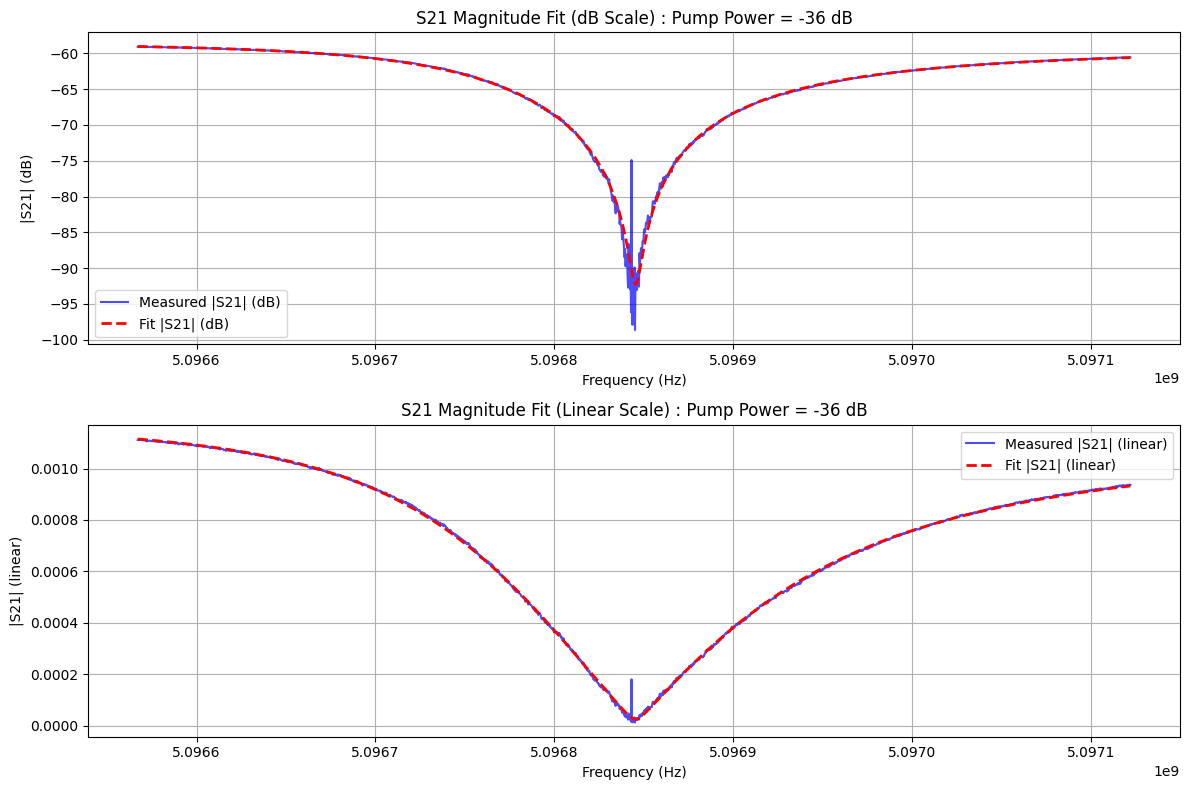

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

Band3={}
external_damping={}
Scaling_factor3={}
asymmetry_parameter00={}
resonance_frequency00={}
folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.09684 -36dB pump - 51dB probe with 40dB Attenuation on final divider.txt'
pump_power= -36
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096846e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Internal damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final


p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)




=== Fitted Parameters ===
Resonance frequency (Hz): 5.096815e+09
Internal damping Γ₀ (Hz): 280154.1
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 18192.9
Γin (Hz): 8154.0883899975


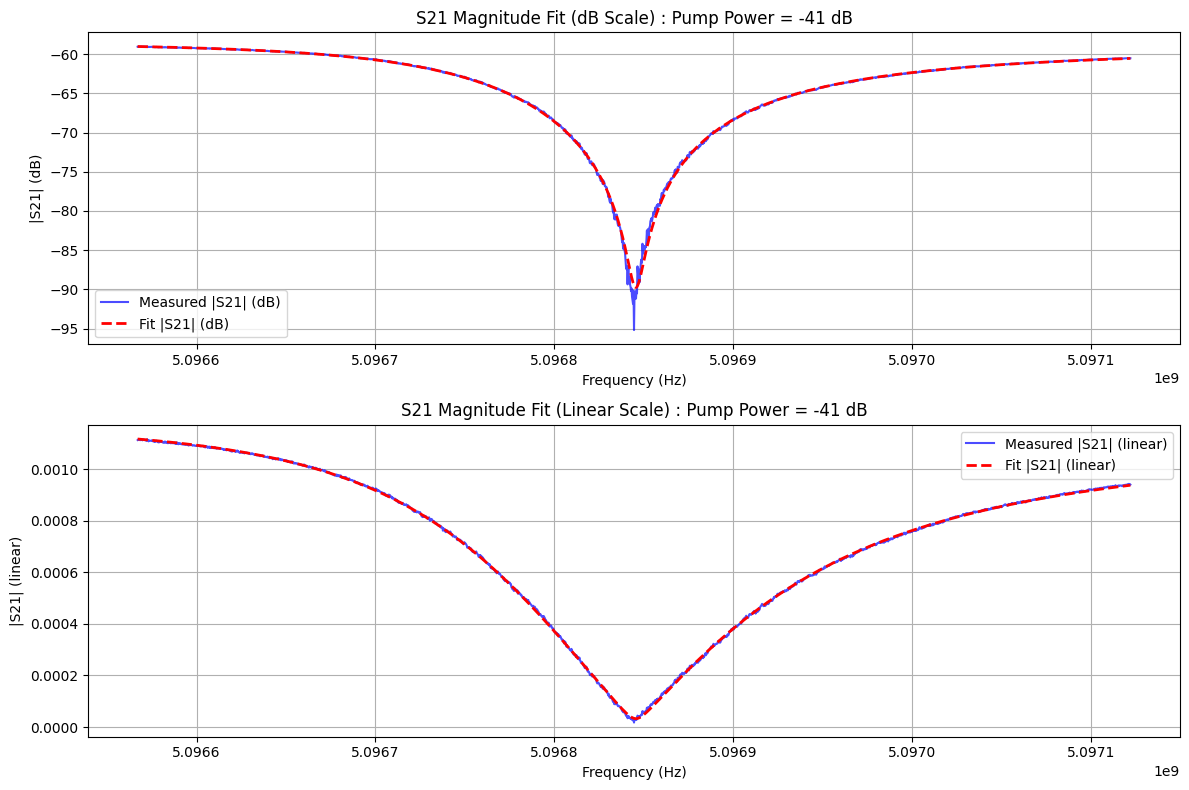

In [107]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096846e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.096846 -41dB pump -51 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -41
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096821e+09
Internal damping Γ₀ (Hz): 283544.8
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 17975.4
Γin (Hz): 11544.793888579681


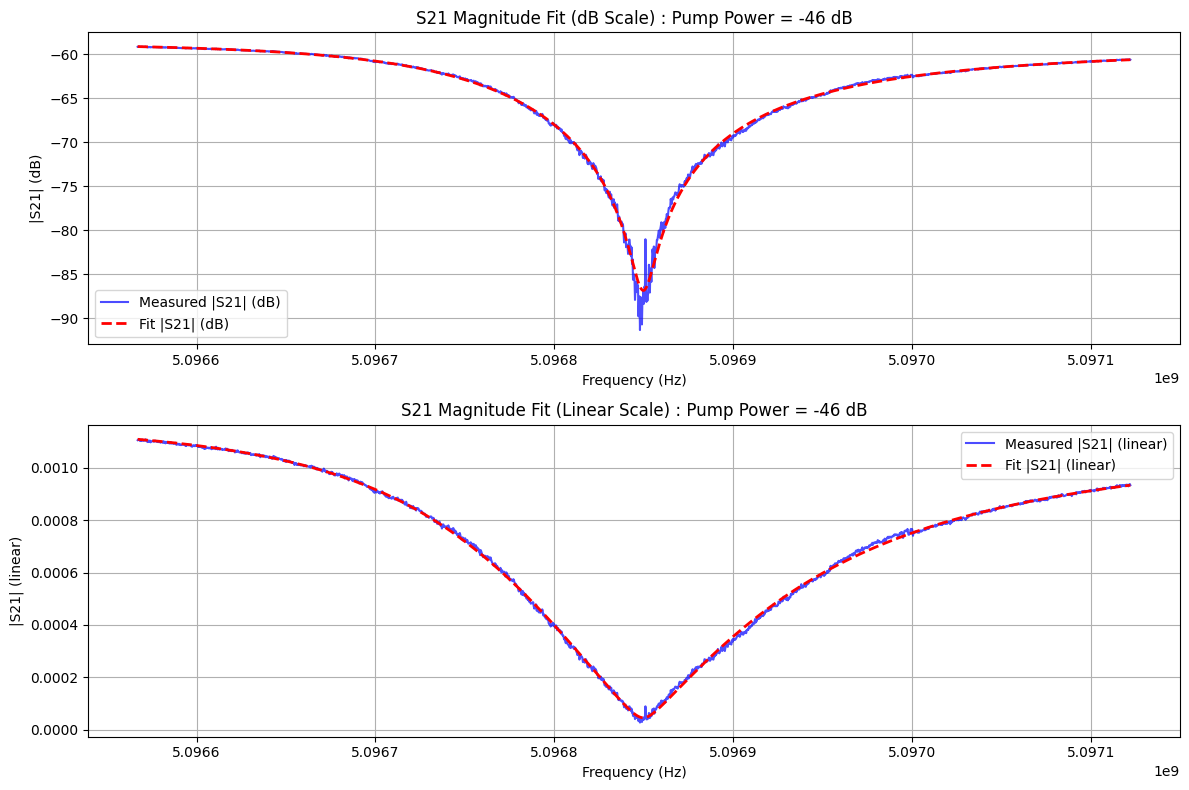

In [108]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096851e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.096851 -46dB pump -56 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -46
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096824e+09
Internal damping Γ₀ (Hz): 283217.2
Coupling rate Γc (Hz): 269838.7
Quality factor Q₀: 17996.2
Γin (Hz): 13378.533023906286


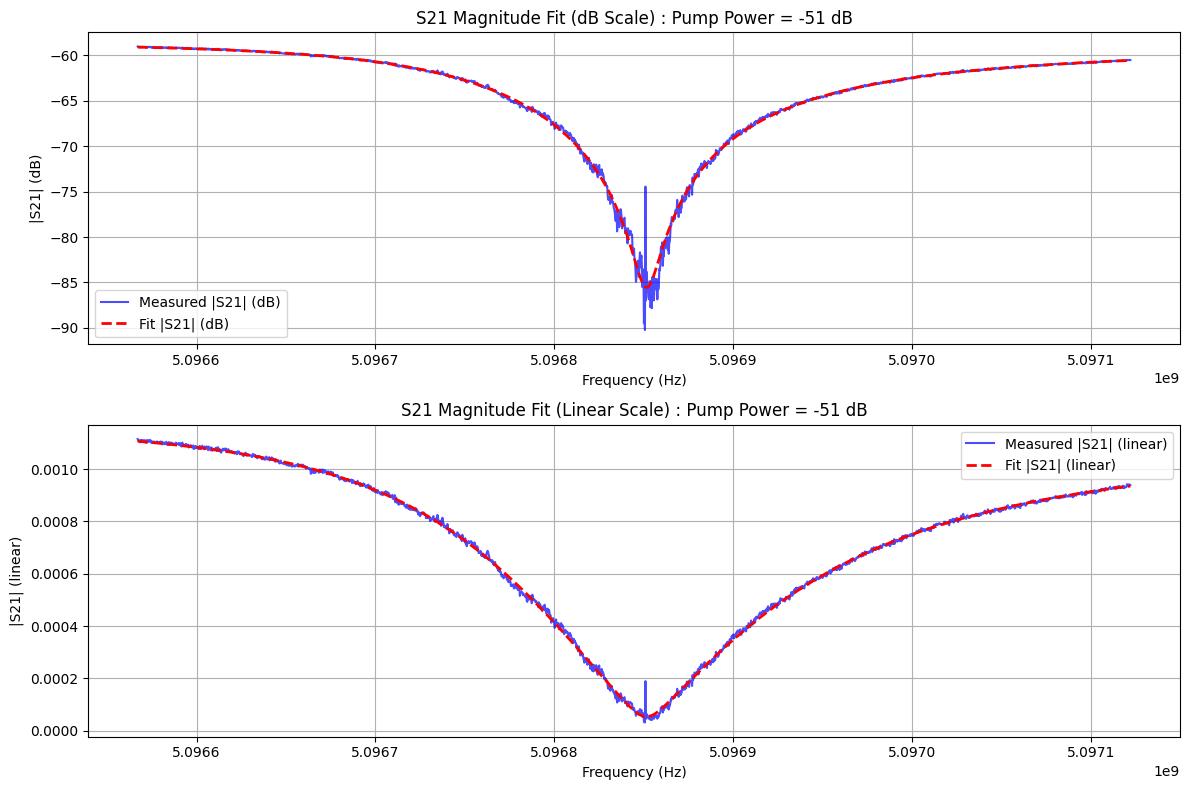

In [109]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess =5.096851e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.7e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.096851 -51dB pump -61 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -51
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096819e+09
Internal damping Γ₀ (Hz): 281950.5
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 18077.0
Γin (Hz): 9950.497703089288


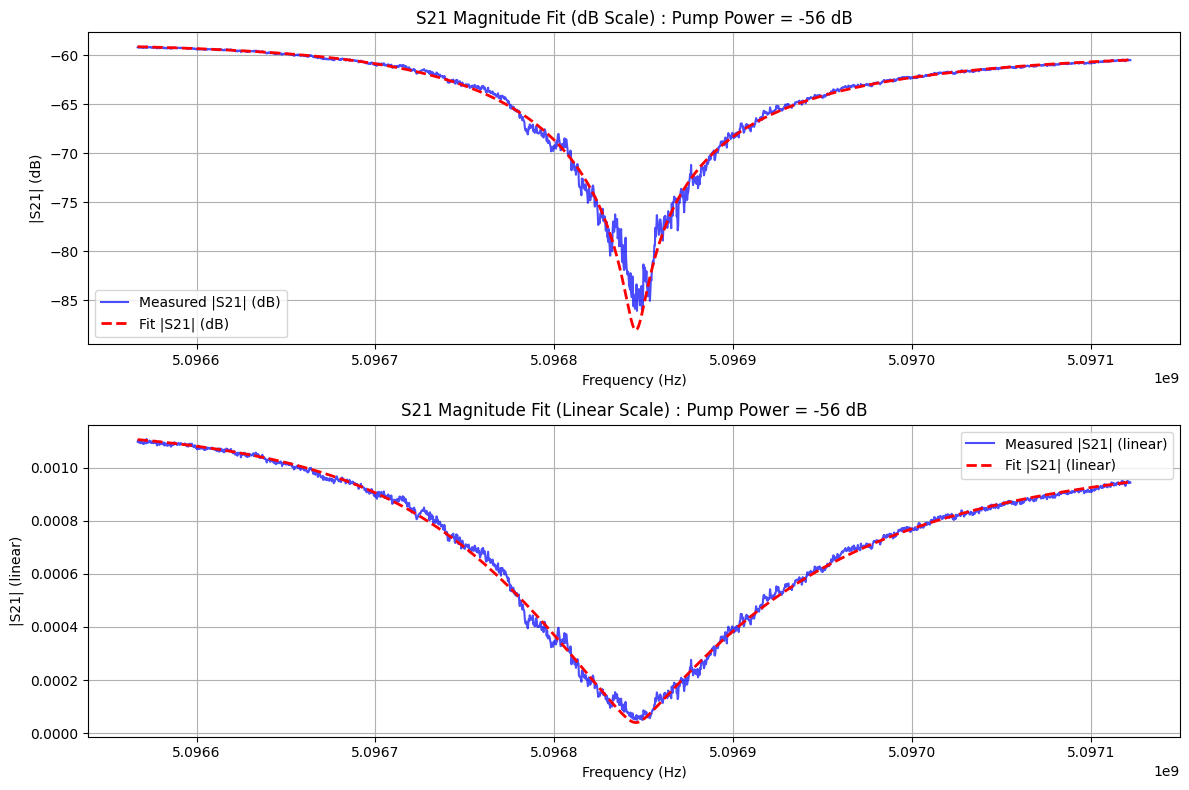

In [110]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096859e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.096859 -56dB pump -66 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -56
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096811e+09
Internal damping Γ₀ (Hz): 283620.0
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 17970.6
Γin (Hz): 11619.997669237348


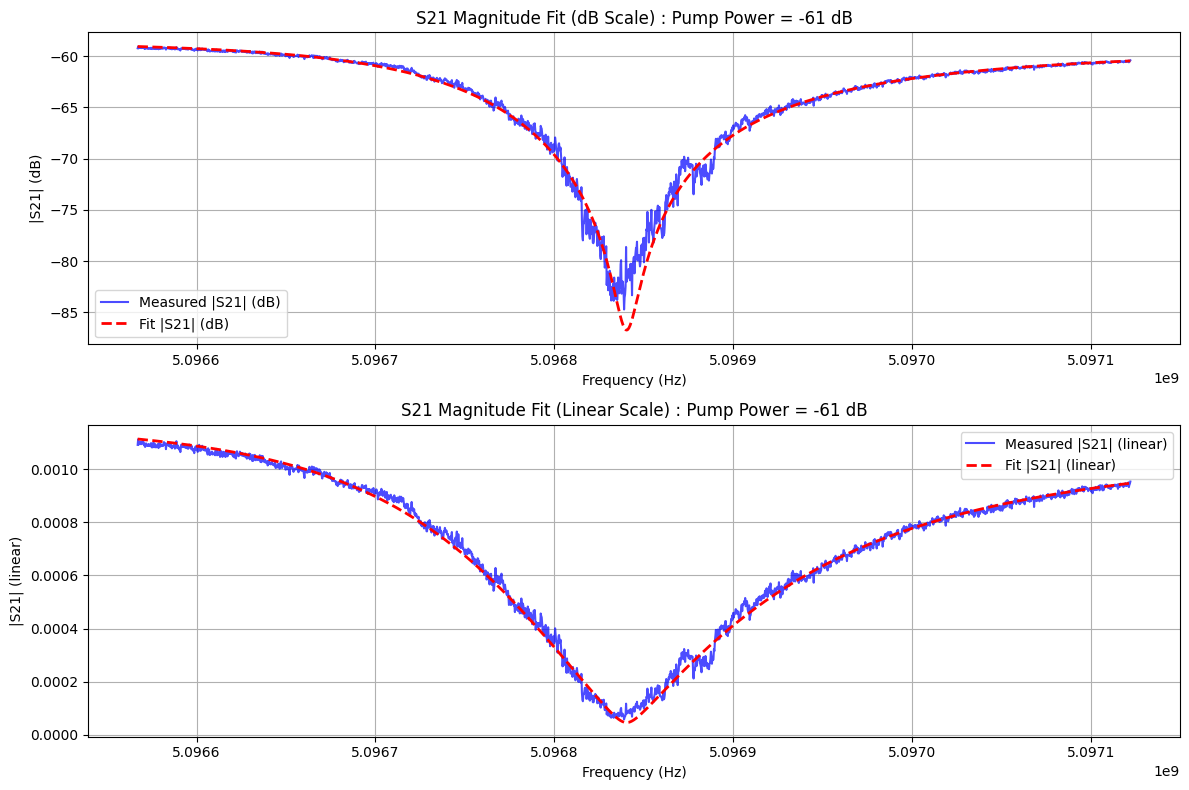

In [111]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096846e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.09684 -61dB pump -71 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -61
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.096801e+09
Internal damping Γ₀ (Hz): 253304.4
Coupling rate Γc (Hz): 229011.3
Quality factor Q₀: 20121.2
Γin (Hz): 24293.068171095514


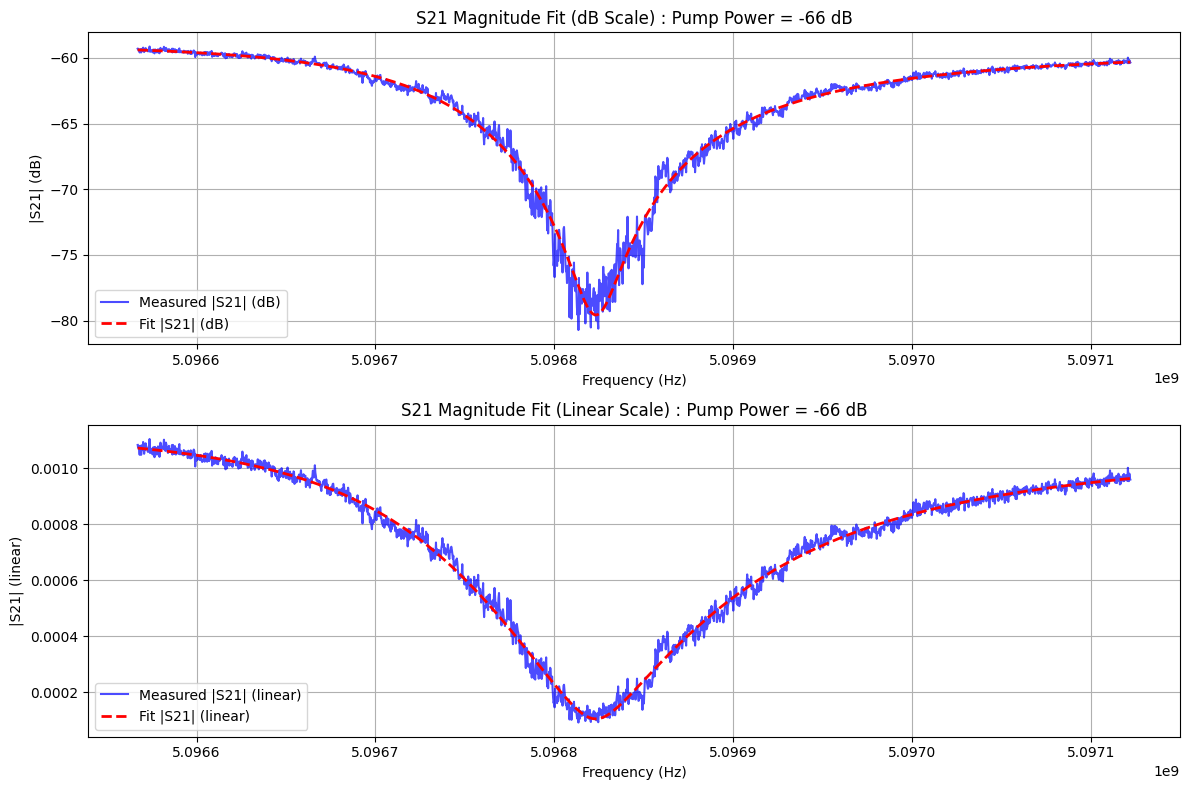

In [112]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096825e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.5e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.096825 -66dB pump -76 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -66
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.095859e+09
Internal damping Γ₀ (Hz): 347121.1
Coupling rate Γc (Hz): 272000.0
Quality factor Q₀: 14680.3
Γin (Hz): 75121.12170718088


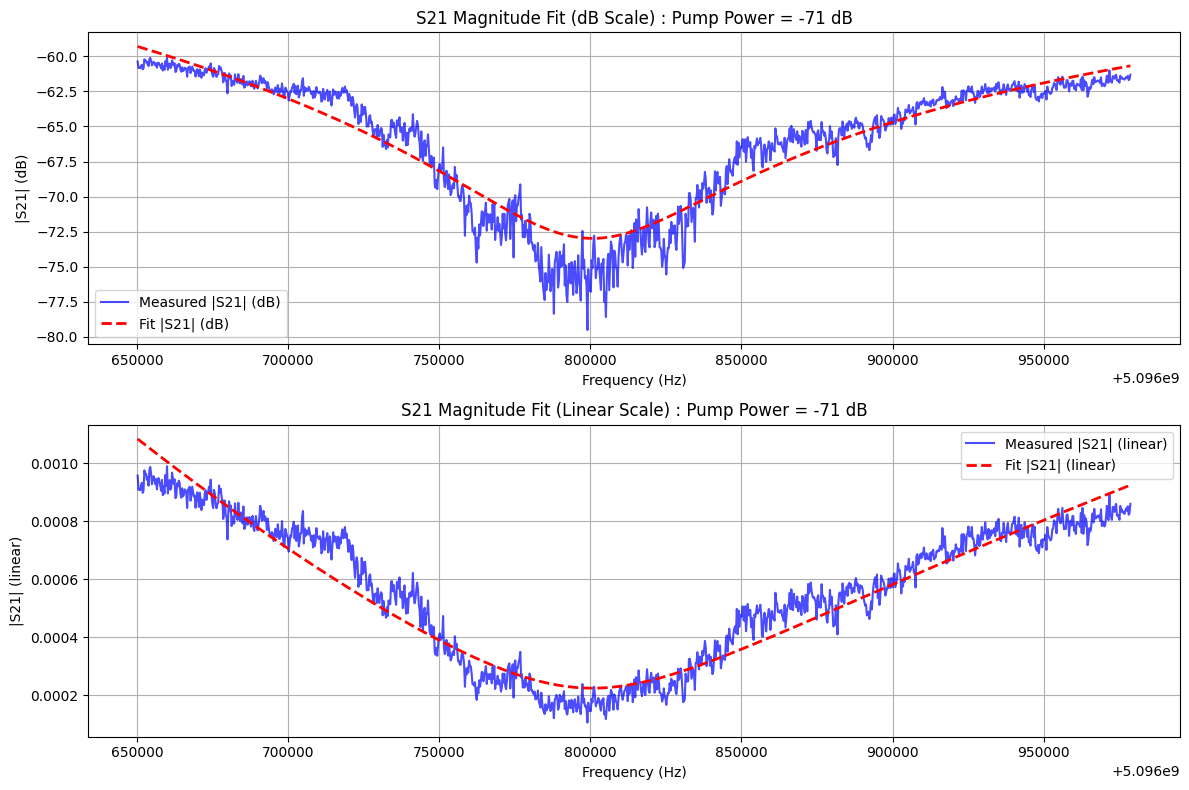

In [113]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (272000*np.pi*2 - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.096803e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.0                # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.1 GHz 12 mK'
filename= '5.096803 -71dB pump -81 dB probe  with 40dB Attenuation on final divider.txt'
pump_power= -71
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[316:1500]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band3[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor3[pump_power]=p_fitted[3]
asymmetry_parameter00[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency00[pump_power]=p_fitted[0]/(2*np.pi)

In [114]:
print("internal damping for different pump powers:")
for power, band in Band3.items():
    print(f"Pump Power: {power} dBm, Γin (Hz): {band:.6f} Hz")

print("external damping for different pump powers:")
for power, damping in external_damping.items():
    print(f"Pump Power: {power} dBm, Γext (Hz): {damping:.6f} Hz")
print("Scaling factor for different pump powers:")
for power, scaling in Scaling_factor3.items():
    print(f"Pump Power: {power} dBm, Scaling Factor: {scaling:.6f}")

internal damping for different pump powers:
Pump Power: -36 dBm, Γin (Hz): 6104.941402 Hz
Pump Power: -41 dBm, Γin (Hz): 8154.088390 Hz
Pump Power: -46 dBm, Γin (Hz): 11544.793889 Hz
Pump Power: -51 dBm, Γin (Hz): 13378.533024 Hz
Pump Power: -56 dBm, Γin (Hz): 9950.497703 Hz
Pump Power: -61 dBm, Γin (Hz): 11619.997669 Hz
Pump Power: -66 dBm, Γin (Hz): 24293.068171 Hz
Pump Power: -71 dBm, Γin (Hz): 75121.121707 Hz
external damping for different pump powers:
Pump Power: -36 dBm, Γext (Hz): 272000.000000 Hz
Pump Power: -41 dBm, Γext (Hz): 272000.000000 Hz
Pump Power: -46 dBm, Γext (Hz): 272000.000000 Hz
Pump Power: -51 dBm, Γext (Hz): 269838.673456 Hz
Pump Power: -56 dBm, Γext (Hz): 272000.000000 Hz
Pump Power: -61 dBm, Γext (Hz): 272000.000000 Hz
Pump Power: -66 dBm, Γext (Hz): 229011.328878 Hz
Pump Power: -71 dBm, Γext (Hz): 272000.000000 Hz
Scaling factor for different pump powers:
Pump Power: -36 dBm, Scaling Factor: 0.001137
Pump Power: -41 dBm, Scaling Factor: 0.001144
Pump Power: -

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_8708\2998744270.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


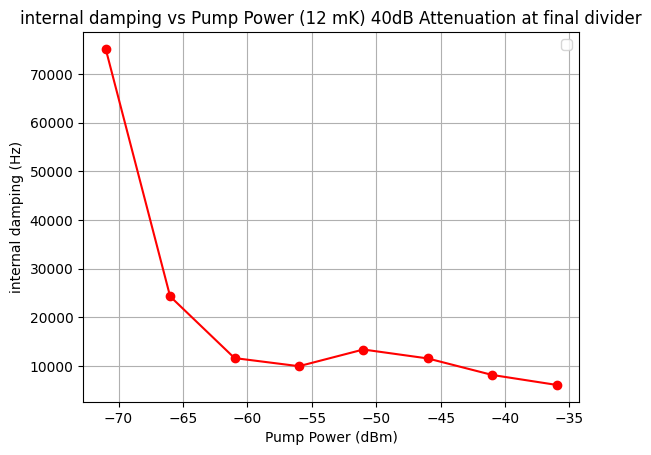

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_8708\2998744270.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


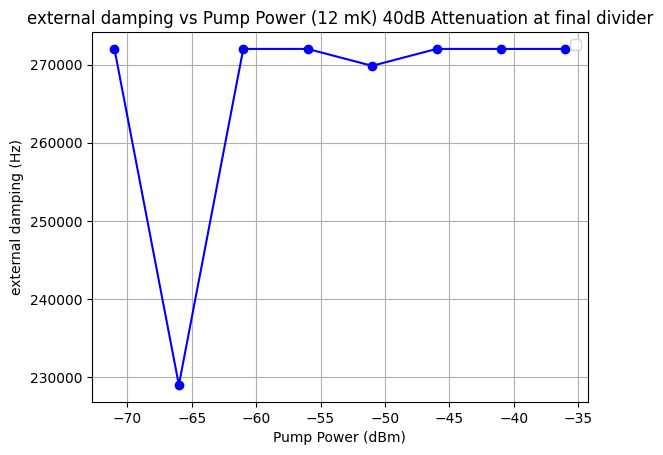

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_8708\2998744270.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


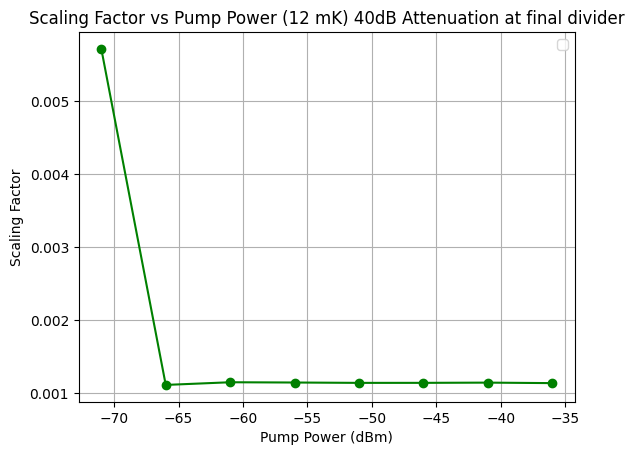

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_8708\2998744270.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


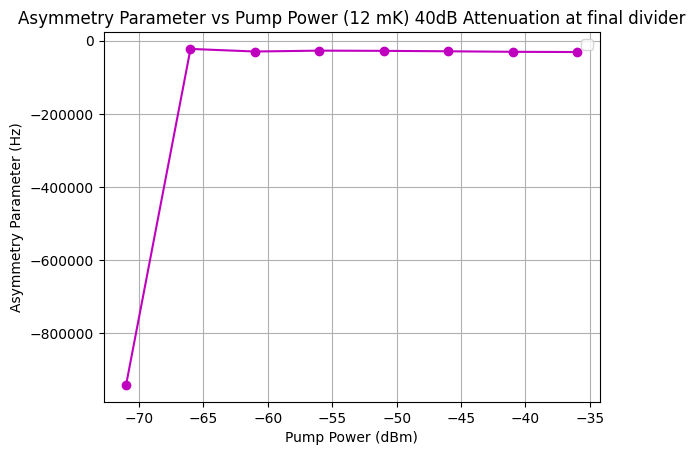

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_8708\2998744270.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


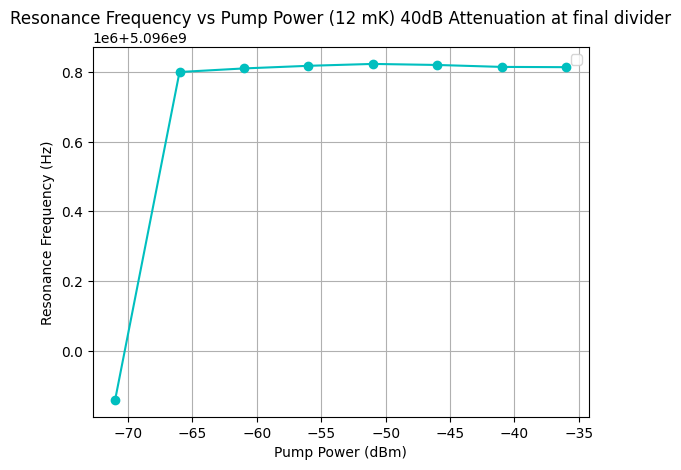

In [115]:
plot(list(Band3.keys()), list(Band3.values()), 'ro-')
xlabel('Pump Power (dBm)')
ylabel('internal damping (Hz)')
title('internal damping vs Pump Power (12 mK) 40dB Attenuation at final divider')
grid(True)
legend()
show()
plot(list(external_damping.keys()), list(external_damping.values()), 'bo-')
xlabel('Pump Power (dBm)')
ylabel('external damping (Hz)')
title('external damping vs Pump Power (12 mK) 40dB Attenuation at final divider')
grid(True)
legend()
show()
plot(list(Scaling_factor3.keys()), list(Scaling_factor3.values()), 'go-')
xlabel('Pump Power (dBm)')
ylabel('Scaling Factor')
title('Scaling Factor vs Pump Power (12 mK) 40dB Attenuation at final divider')
grid(True)
legend()
show()
plot(list(asymmetry_parameter00.keys()), list(asymmetry_parameter00.values()), 'mo-')
xlabel('Pump Power (dBm)')
ylabel('Asymmetry Parameter (Hz)')  
title('Asymmetry Parameter vs Pump Power (12 mK) 40dB Attenuation at final divider')
grid(True)
legend()
show()
plot(list(resonance_frequency00.keys()), list(resonance_frequency00.values()), 'co-')   
xlabel('Pump Power (dBm)')
ylabel('Resonance Frequency (Hz)')
title('Resonance Frequency vs Pump Power (12 mK) 40dB Attenuation at final divider')
grid(True)
legend()
show()

# Comparison of Internal Damping( Γin/(2*pi)) vs Pump Power with Temperature sample 1: 5.1 GHz

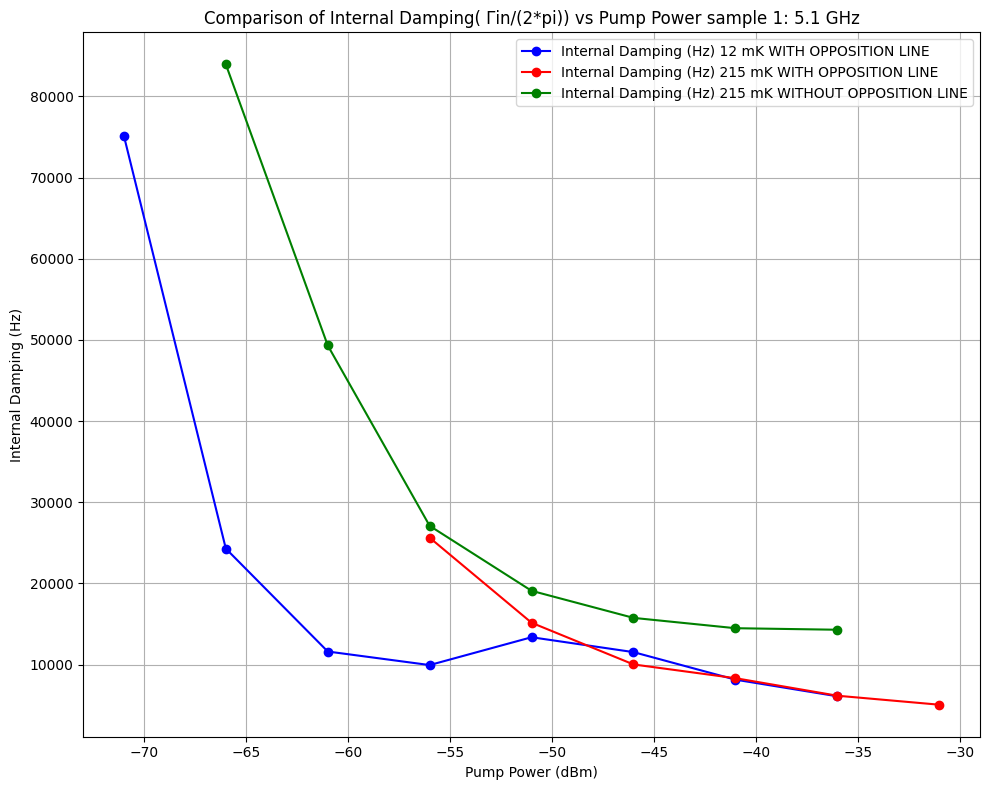

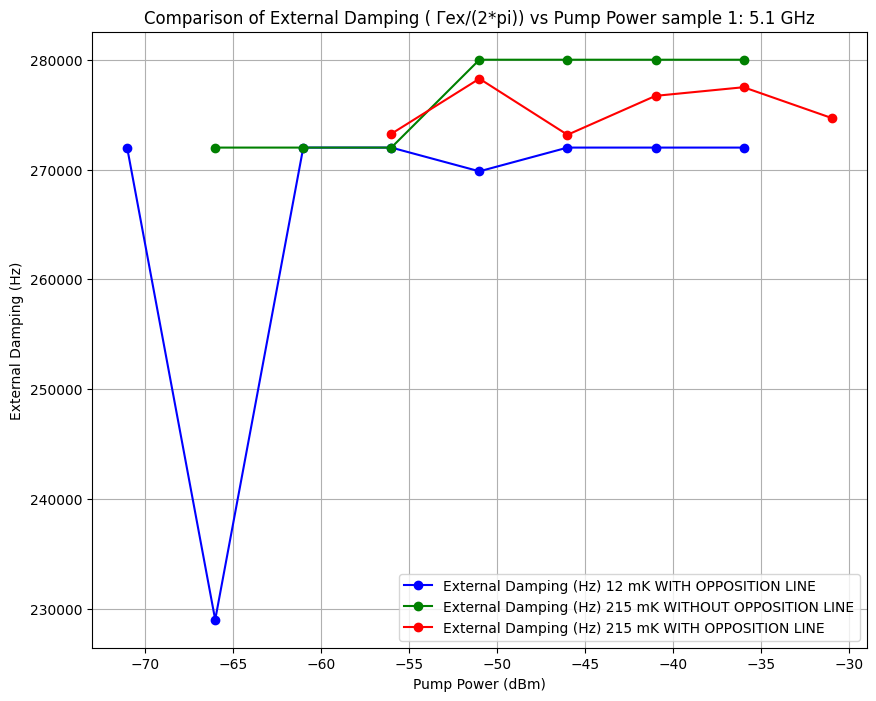

In [125]:
plt.figure(figsize=(10, 8))
plt.plot(list(Band3.keys()), list(Band3.values()), 'bo-', label='Internal Damping (Hz) 12 mK WITH OPPOSITION LINE')
plt.plot(list(Band.keys()), list(Band.values()), 'ro-', label='Internal Damping (Hz) 215 mK WITH OPPOSITION LINE')
plt.plot(list(Band2.keys()), list(Band2.values()), 'go-', label='Internal Damping (Hz) 215 mK WITHOUT OPPOSITION LINE')
plt.xlabel('Pump Power (dBm)')
plt.ylabel('Internal Damping (Hz)')
plt.title('Comparison of Internal Damping( Γin/(2*pi)) vs Pump Power sample 1: 5.1 GHz')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
plot(list(external_damping.keys()), list(external_damping.values()), 'bo-', label='External Damping (Hz) 12 mK WITH OPPOSITION LINE')
plot(list(external_damping01.keys()), list(external_damping01.values()), 'go-', label='External Damping (Hz) 215 mK WITHOUT OPPOSITION LINE')
plt.plot(list(external_coupling.keys()), list(external_coupling.values()), 'ro-', label='External Damping (Hz) 215 mK WITH OPPOSITION LINE')
xlabel('Pump Power (dBm)')
ylabel('External Damping (Hz)')
title('Comparison of External Damping ( Γex/(2*pi)) vs Pump Power sample 1: 5.1 GHz')
grid(True)
legend()
show()

# Determine internal and external damping EPFL sample 1 5.973 GHz 12 mK measurements of S21 at different pump powers. WITH OPPOSITION LINE


In [1]:
import pandas as pd
import numpy as np  
# from scipy import find_peaks
import matplotlib.pyplot as plt
import cmath
import math as m
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit, leastsq
from pylab import *
import glob
from datetime import *
Band4={}
external_damping02={}
Scaling_factor4={}


=== Fitted Parameters ===
Resonance frequency (Hz): 5.973055e+09
Internal damping Γ₀ (Hz): 866471.1
Coupling rate Γc (Hz): 850000.0
Quality factor Q₀: 6893.5
Γin (Hz): 16471.149717128497
asymmetry parameter (Hz): 80612.8


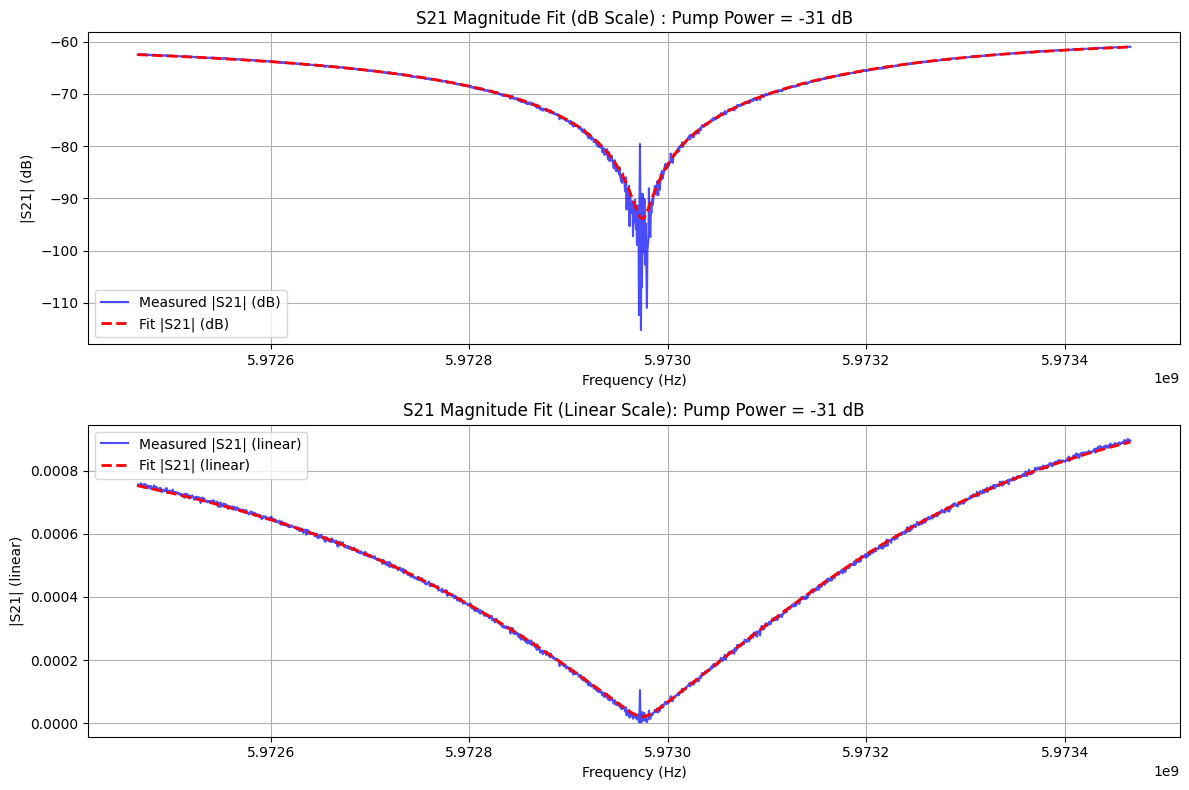

asymmetry parameter: 80612.77399944101


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.972972 GHz -31 dBm pump -51 dBm probe.txt'
pump_power= -31
freq=[]
S21=[]
scaling_factor4={}
asymmetry_parameter03={}
resonance_frequency03={}
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( 8.5e5 * 2 * np.pi - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.972972e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        8.5e5 * 2 * np.pi, # Gammac (rad/s)
        0.5,               # A (amplitude scaling)
        20000         # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Internal damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")
    print(f"asymmetry parameter (Hz): {wd_fit/(2*np.pi):.1f}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale) : Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale): Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final


p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
print("asymmetry parameter:", p_fitted[4]/(2*np.pi))
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)


=== Fitted Parameters ===
Resonance frequency (Hz): 5.973113e+09
Internal damping Γ₀ (Hz): 900418.5
Coupling rate Γc (Hz): 881646.4
Quality factor Q₀: 6633.7
Γin (Hz): 18772.10190807621
asymmetry parameter (Hz): 84003.8


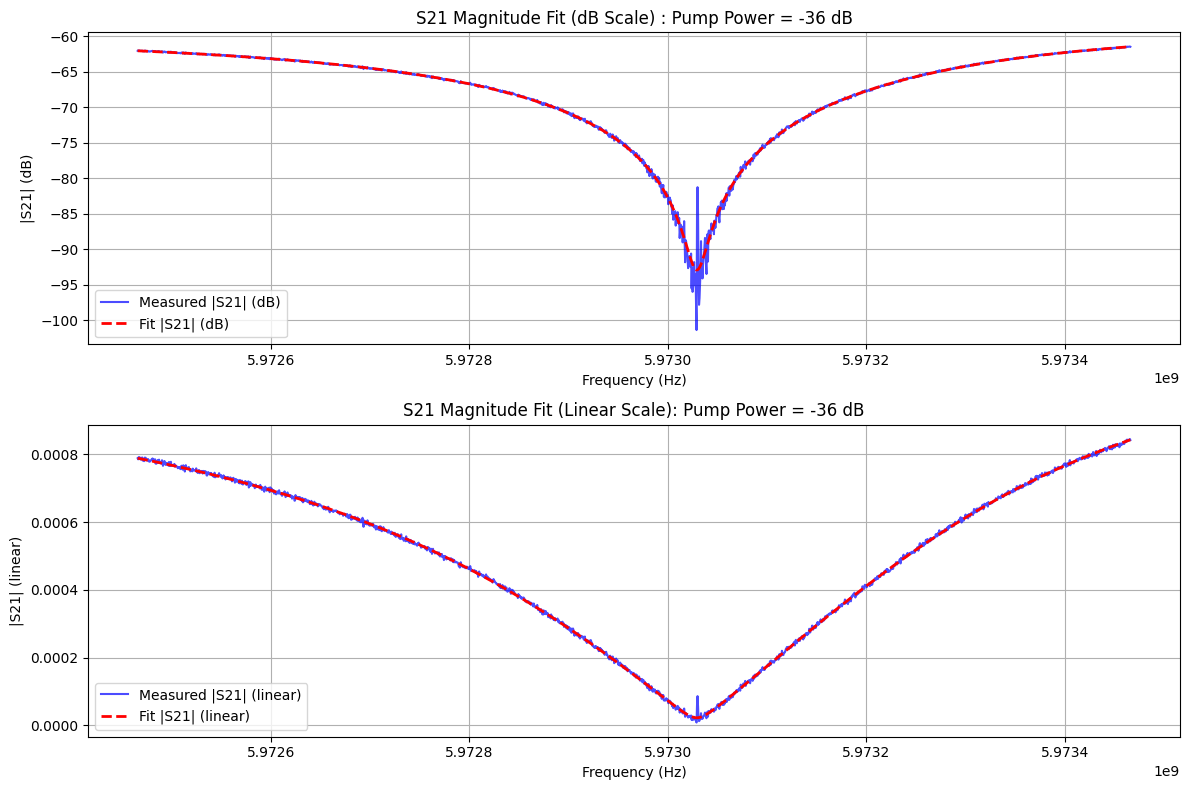

In [5]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973030e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.82e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.00             # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973030 GHz -36 dBm pump -51 dBm probe.txt'
pump_power= -36
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)


=== Fitted Parameters ===
Resonance frequency (Hz): 5.973128e+09
Internal damping Γ₀ (Hz): 875605.5
Coupling rate Γc (Hz): 858865.8
Quality factor Q₀: 6821.7
Γin (Hz): 16739.651720875056
asymmetry parameter (Hz): 82938.0


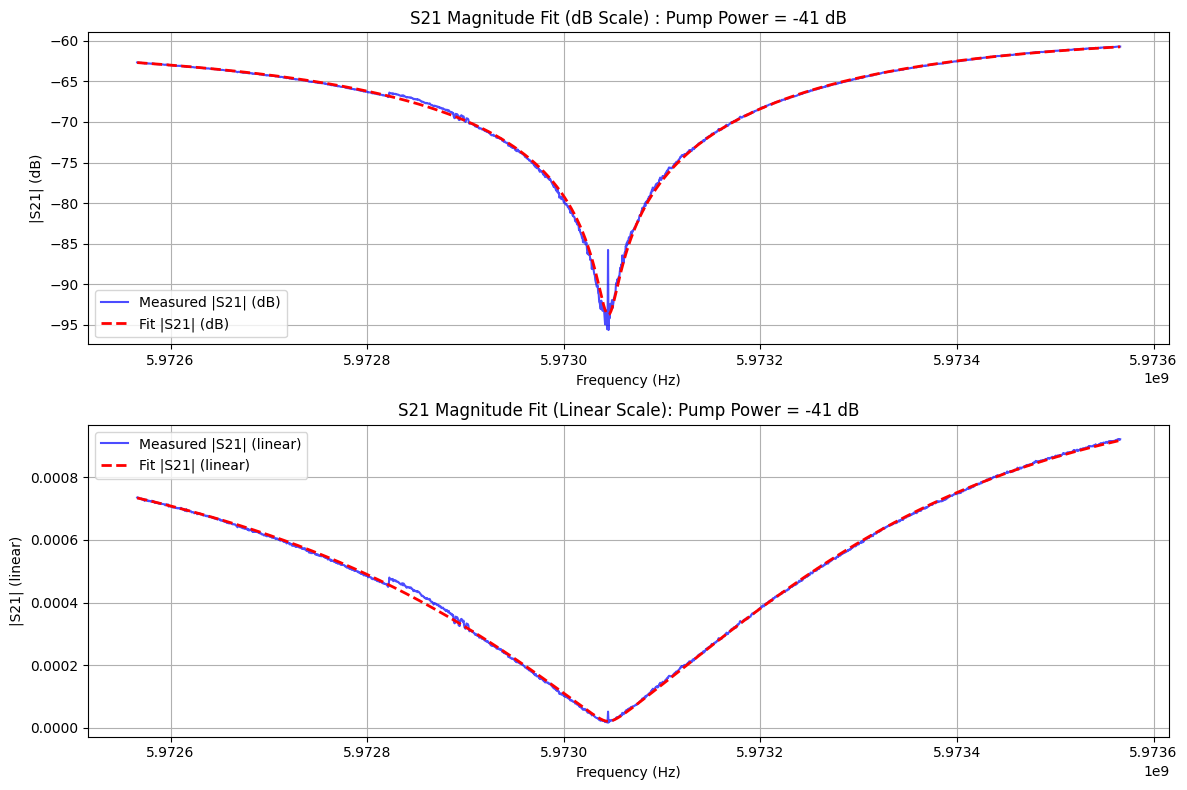

In [6]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973045e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.5e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.00001            # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973045 GHz -41 dBm pump -51 dBm probe.txt'
pump_power= -41
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973133e+09
Internal damping Γ₀ (Hz): 868987.7
Coupling rate Γc (Hz): 850429.2
Quality factor Q₀: 6873.7
Γin (Hz): 18558.53378221095
asymmetry parameter (Hz): 82654.2


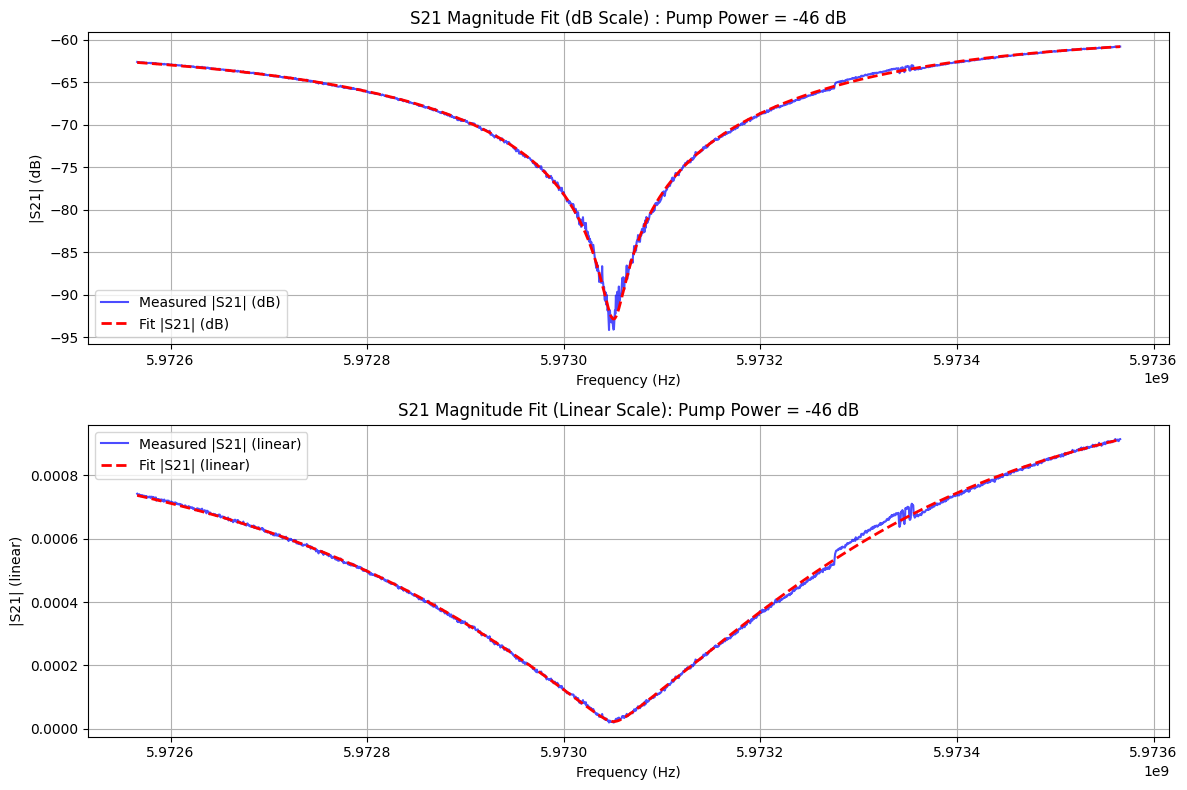

asymmetry parameter: 519331.4723263433


In [7]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973053e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        5.72e5*2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        519331.25456013443               # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973053 GHz -46 dBm pump -56 dBm probe.txt'
pump_power= -46
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)
print("asymmetry parameter:", p_fitted[4])

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973139e+09
Internal damping Γ₀ (Hz): 896888.8
Coupling rate Γc (Hz): 877351.2
Quality factor Q₀: 6659.8
Γin (Hz): 19537.638949562443
asymmetry parameter (Hz): 87168.4


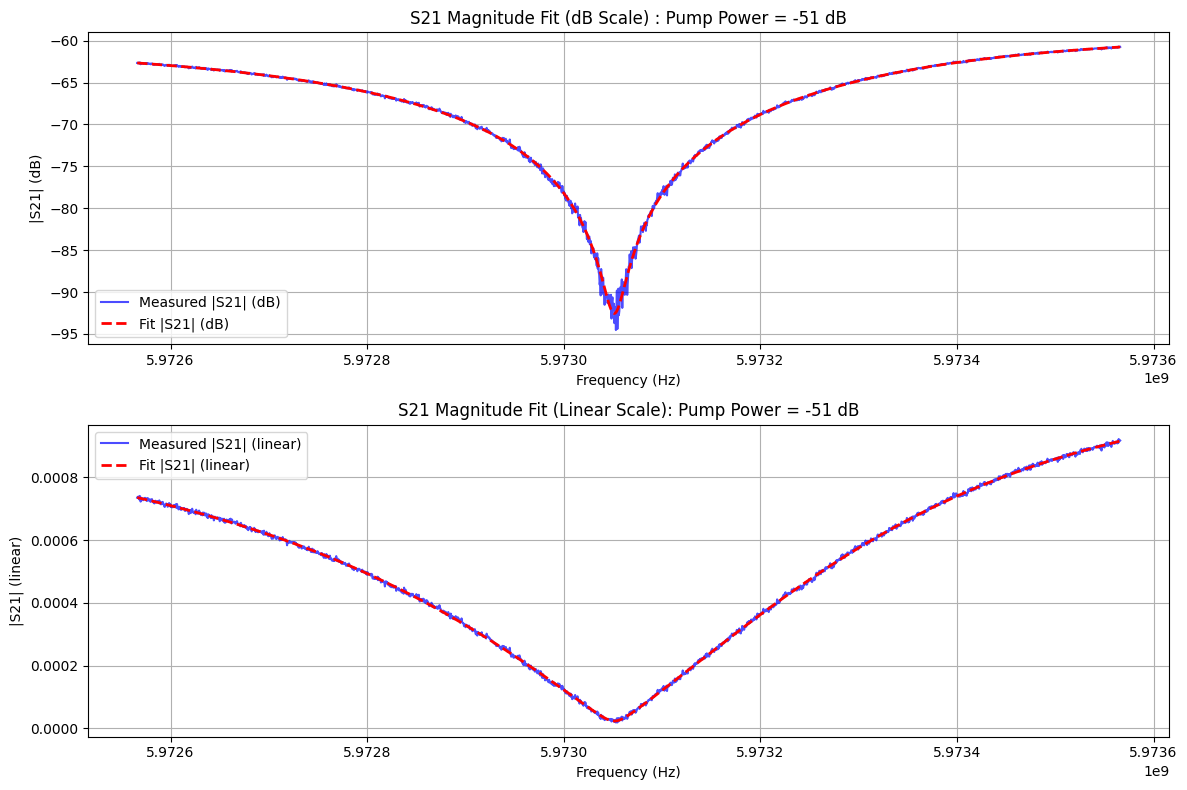

In [9]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973053e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.82e5*2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.00               # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973053 GHz -51 dBm pump -61 dBm probe.txt'
pump_power= -51
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973129e+09
Internal damping Γ₀ (Hz): 873155.1
Coupling rate Γc (Hz): 844271.3
Quality factor Q₀: 6840.9
Γin (Hz): 28883.800360488647
asymmetry parameter (Hz): 79560.0


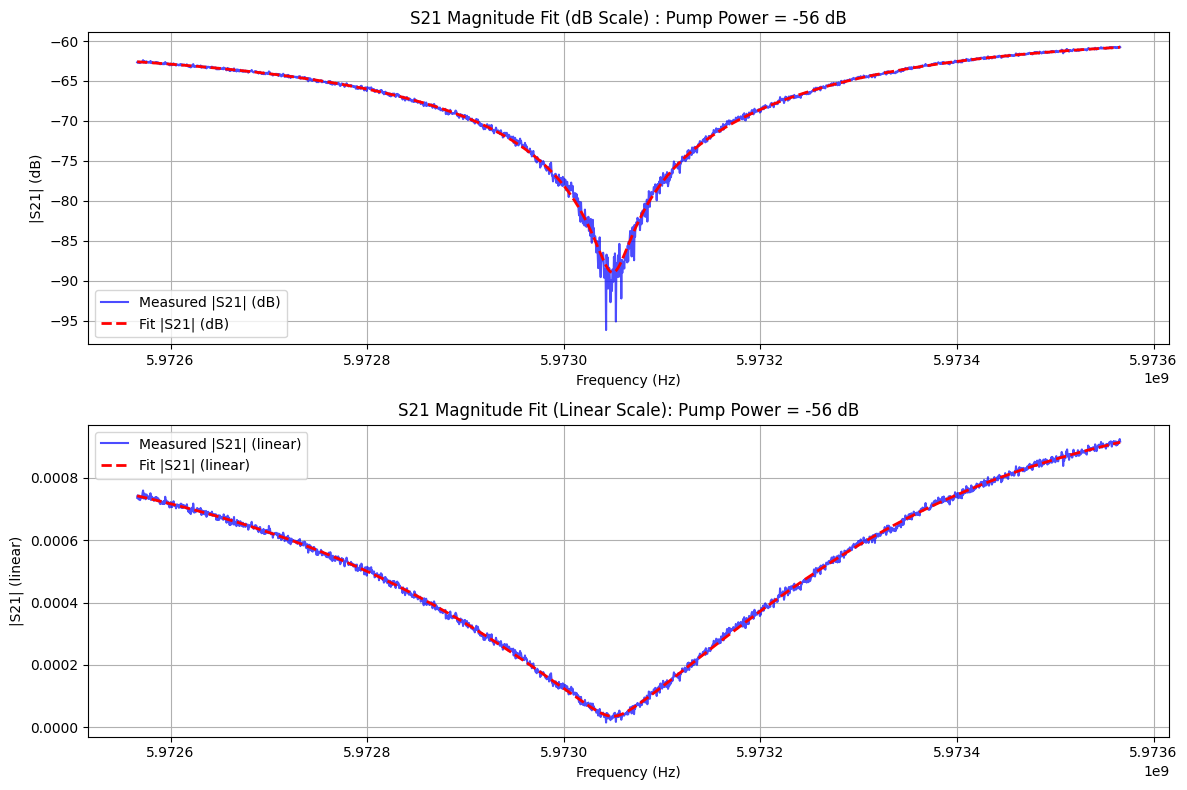

In [10]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973053e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.82e5*2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.00               # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973053 GHz -56 dBm pump -66 dBm probe.txt'
pump_power= -56
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973124e+09
Internal damping Γ₀ (Hz): 875780.4
Coupling rate Γc (Hz): 840879.3
Quality factor Q₀: 6820.3
Γin (Hz): 34901.14029025698
asymmetry parameter (Hz): 72105.8


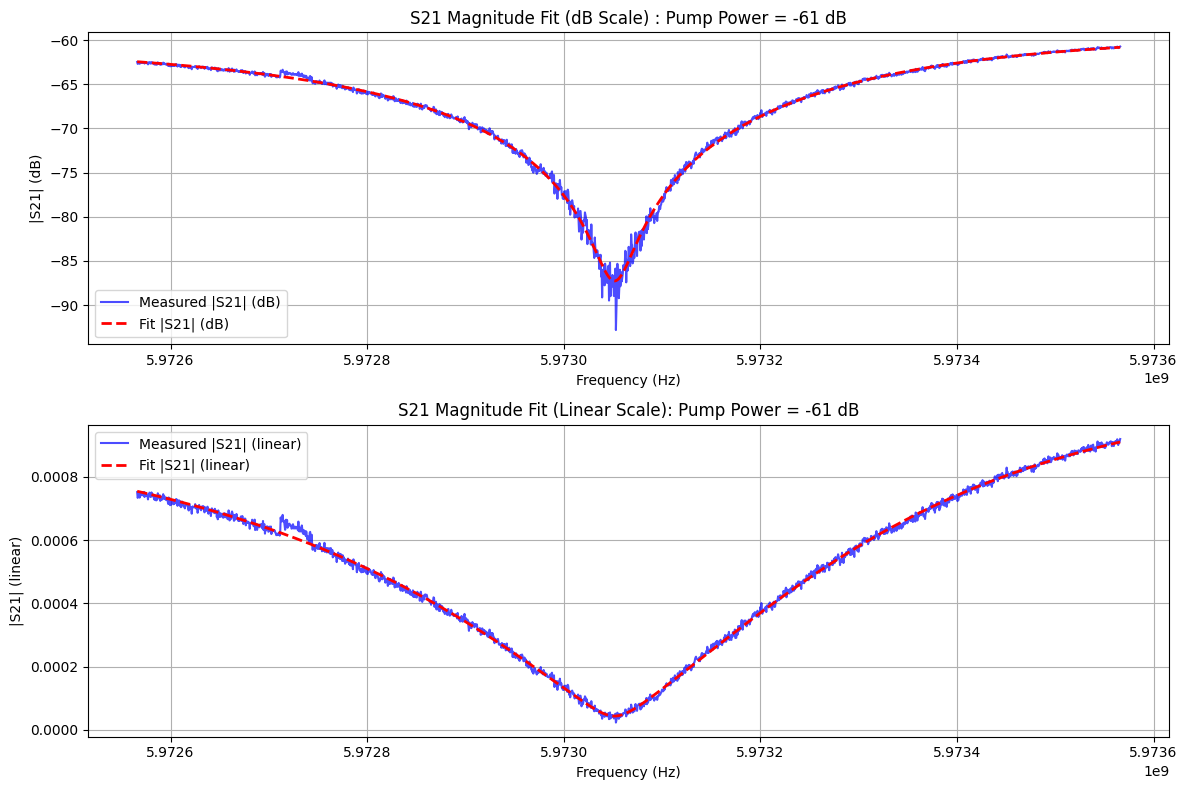

In [11]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973053e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.82e5*2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.00               # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973053 GHz -61 dBm pump -71 dBm probe.txt'
pump_power= -61
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973117e+09
Internal damping Γ₀ (Hz): 860198.7
Coupling rate Γc (Hz): 821519.2
Quality factor Q₀: 6943.9
Γin (Hz): 38679.47361215708
asymmetry parameter (Hz): 69360.3


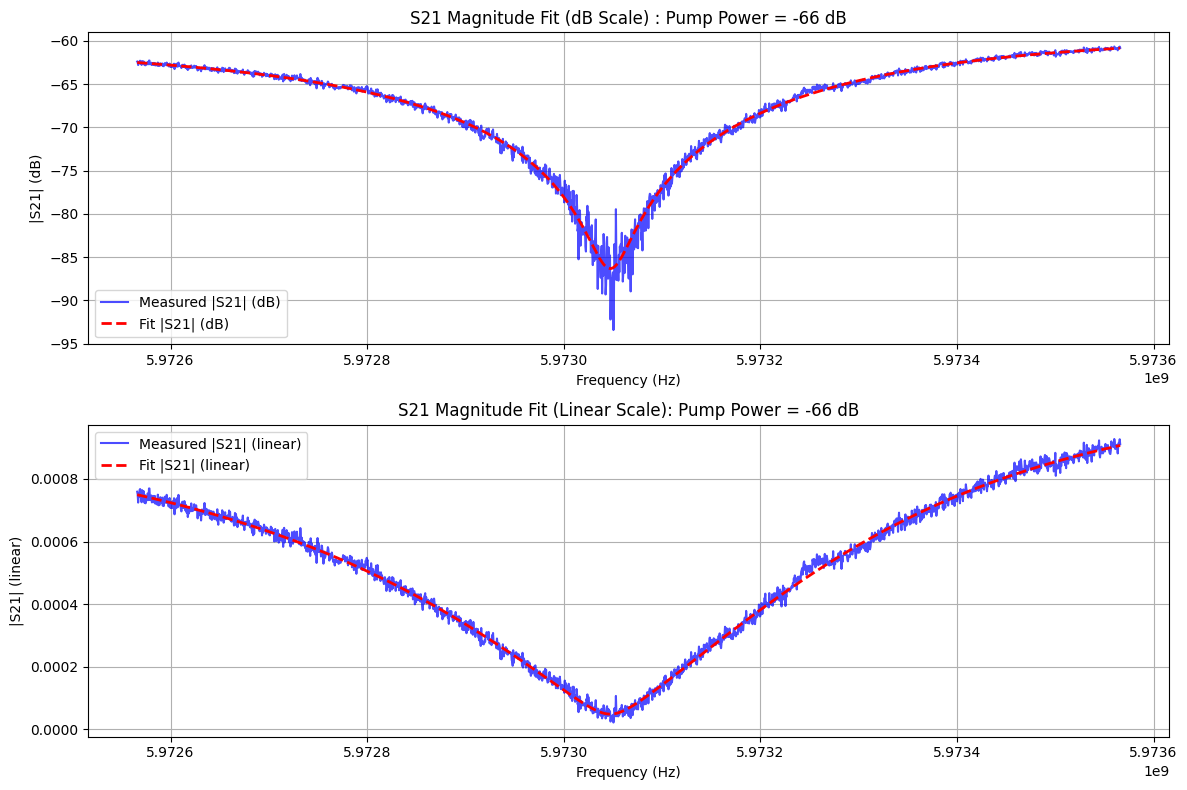

In [12]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973053e9 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.82e5*2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        0.00               # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973053 GHz -66 dBm pump -76 dBm probe.txt'
pump_power= -66
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973122e+09
Internal damping Γ₀ (Hz): 809268.8
Coupling rate Γc (Hz): 752026.6
Quality factor Q₀: 7380.9
Γin (Hz): 57242.14418656341
asymmetry parameter (Hz): 69903.6


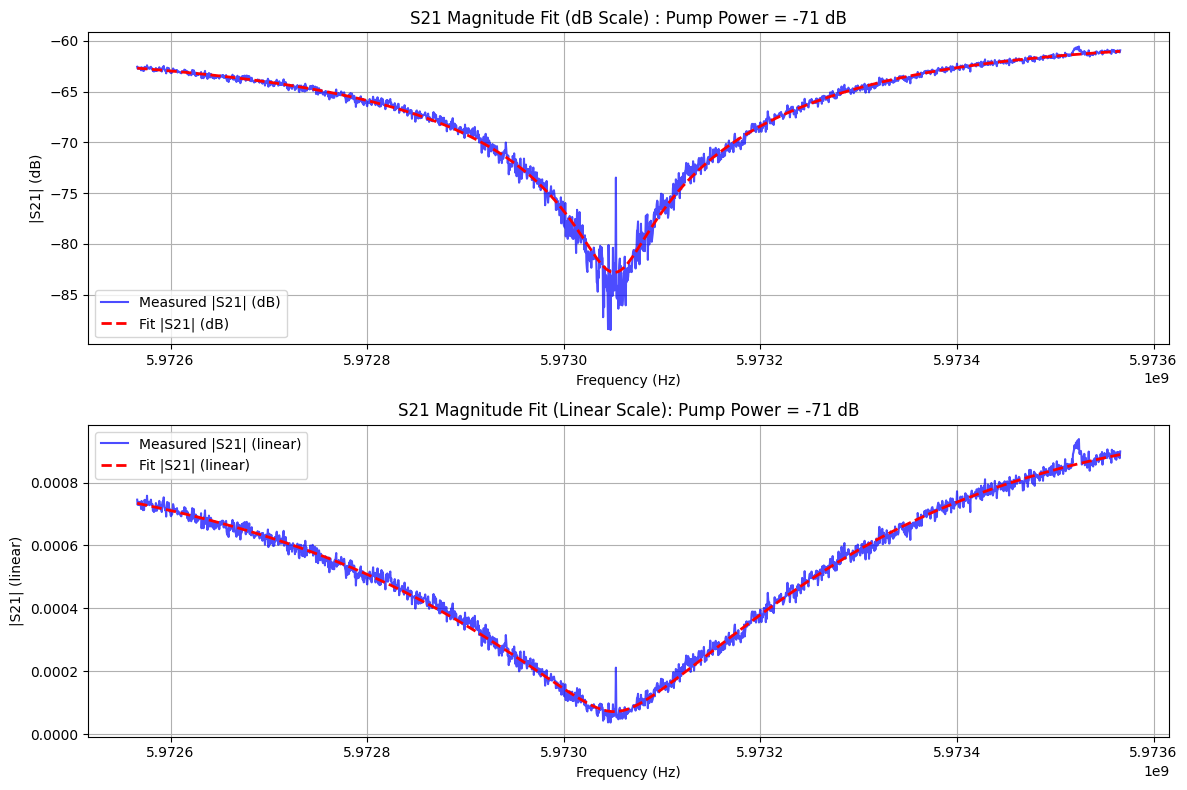

asymmetry parameter: 69903.5579398327


In [13]:

def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - ( Gammac - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.973122e+09 * 2 * np.pi
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        8.82e5*2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        69903.5766269763          # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 12 mK'
filename= '5.973053 GHz -71 dBm pump -81 dBm probe.txt'
pump_power= -71
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band4[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping02[pump_power]=p_fitted[2]/(2*np.pi)
scaling_factor4[pump_power]=p_fitted[3]
asymmetry_parameter03[pump_power]=p_fitted[4]/(2*np.pi)
print("asymmetry parameter:", p_fitted[4]/(2*np.pi))
resonance_frequency03[pump_power]=p_fitted[0]/(2*np.pi)

In [14]:
print("internal damping for different pump powers:")
for power, band in Band4.items():
    print(f"Pump Power: {power} dBm, Γin (Hz): {band:.6f} Hz")
print("external damping for different pump powers:")
for power, band in external_damping02.items():
    print(f"Pump Power: {power} dBm, Γex (Hz): {band:.6f} Hz")
print("Scaling factor for different pump powers:")
for power, scaling in scaling_factor4.items():
    print(f"Pump Power: {power} dBm, Scaling Factor: {scaling:.6f}")

internal damping for different pump powers:
Pump Power: -31 dBm, Γin (Hz): 16471.149717 Hz
Pump Power: -36 dBm, Γin (Hz): 18772.101908 Hz
Pump Power: -41 dBm, Γin (Hz): 16739.651721 Hz
Pump Power: -46 dBm, Γin (Hz): 18558.533782 Hz
Pump Power: -51 dBm, Γin (Hz): 19537.638950 Hz
Pump Power: -56 dBm, Γin (Hz): 28883.800360 Hz
Pump Power: -61 dBm, Γin (Hz): 34901.140290 Hz
Pump Power: -66 dBm, Γin (Hz): 38679.473612 Hz
Pump Power: -71 dBm, Γin (Hz): 57242.144187 Hz
external damping for different pump powers:
Pump Power: -31 dBm, Γex (Hz): 850000.000000 Hz
Pump Power: -36 dBm, Γex (Hz): 881646.401058 Hz
Pump Power: -41 dBm, Γex (Hz): 858865.799721 Hz
Pump Power: -46 dBm, Γex (Hz): 850429.176729 Hz
Pump Power: -51 dBm, Γex (Hz): 877351.203655 Hz
Pump Power: -56 dBm, Γex (Hz): 844271.276866 Hz
Pump Power: -61 dBm, Γex (Hz): 840879.265392 Hz
Pump Power: -66 dBm, Γex (Hz): 821519.195195 Hz
Pump Power: -71 dBm, Γex (Hz): 752026.612838 Hz
Scaling factor for different pump powers:
Pump Power: -31

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_15100\2335640947.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


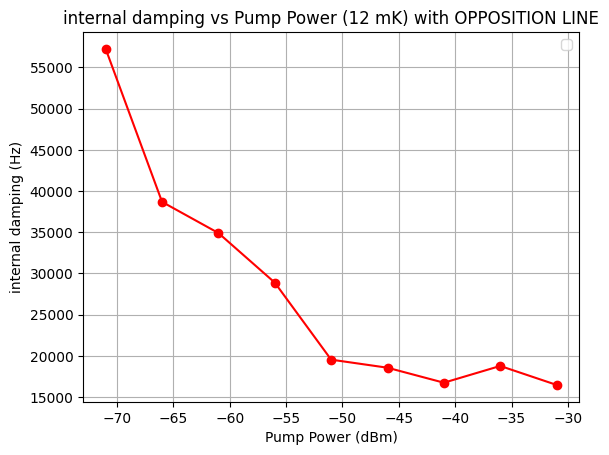

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_15100\2335640947.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


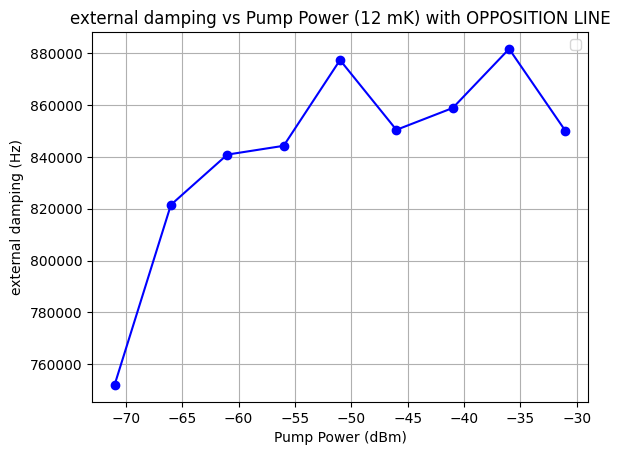

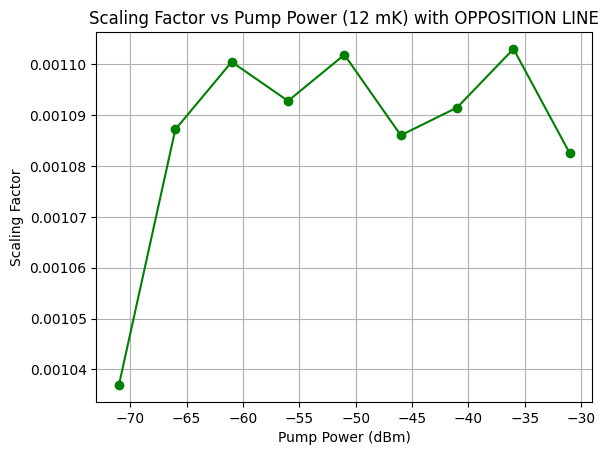

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_15100\2335640947.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


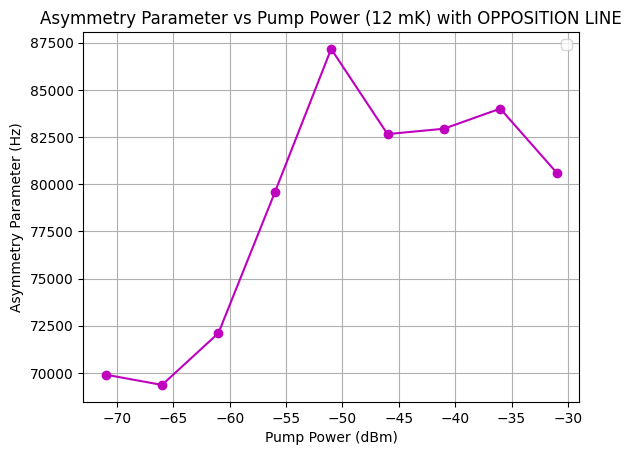

C:\Users\Anushka.PANDEY\AppData\Local\Temp\ipykernel_15100\2335640947.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


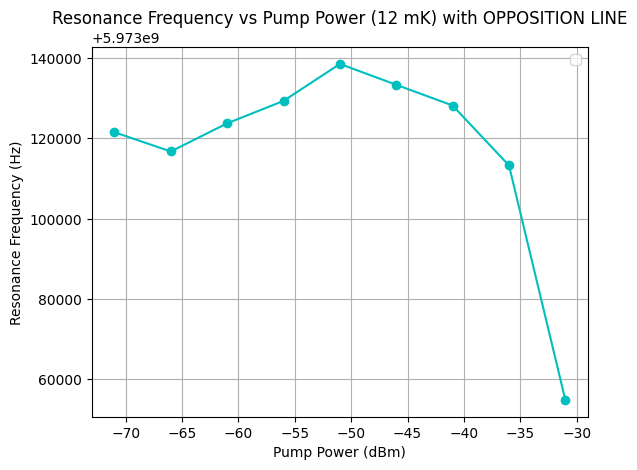

In [15]:
plot(list(Band4.keys()), list(Band4.values()), 'ro-')
xlabel('Pump Power (dBm)')
ylabel('internal damping (Hz)')
title('internal damping vs Pump Power (12 mK) with OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(external_damping02.keys()), list(external_damping02.values()), 'bo-')
xlabel('Pump Power (dBm)')
ylabel('external damping (Hz)')
title('external damping vs Pump Power (12 mK) with OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(scaling_factor4.keys()), list(scaling_factor4.values()), 'go-')
xlabel('Pump Power (dBm)')  
ylabel('Scaling Factor')
title('Scaling Factor vs Pump Power (12 mK) with OPPOSITION LINE')
grid(True)
show()
plot(list(asymmetry_parameter03.keys()), list(asymmetry_parameter03.values()), 'mo-')
xlabel('Pump Power (dBm)')
ylabel('Asymmetry Parameter (Hz)')
title('Asymmetry Parameter vs Pump Power (12 mK) with OPPOSITION LINE')
grid(True)
legend()
show()
plot(list(resonance_frequency03.keys()), list(resonance_frequency03.values()), 'co-')
xlabel('Pump Power (dBm)')
ylabel('Resonance Frequency (Hz)')
title('Resonance Frequency vs Pump Power (12 mK) with OPPOSITION LINE')
grid(True)
legend()
show()

# Determine internal and external damping EPFL sample 1 5.973 GHz 215 mK measurements of S21 at different pump powers.


In [16]:
import pandas as pd
import numpy as np  
# from scipy import find_peaks
import matplotlib.pyplot as plt
import cmath
import math as m
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit, leastsq
from pylab import *
import glob
from datetime import *

Band5={}
external_damping03={}
Scaling_factor5={}
asymmetry_parameter5={}
resonance_frequency05={}

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973036e+09
Internal damping Γ₀ (Hz): 888712.6
Coupling rate Γc (Hz): 879723.9
Quality factor Q₀: 6721.0
Γin (Hz): 8988.66988754423
Asymmetry parameter wd: 493073.730612


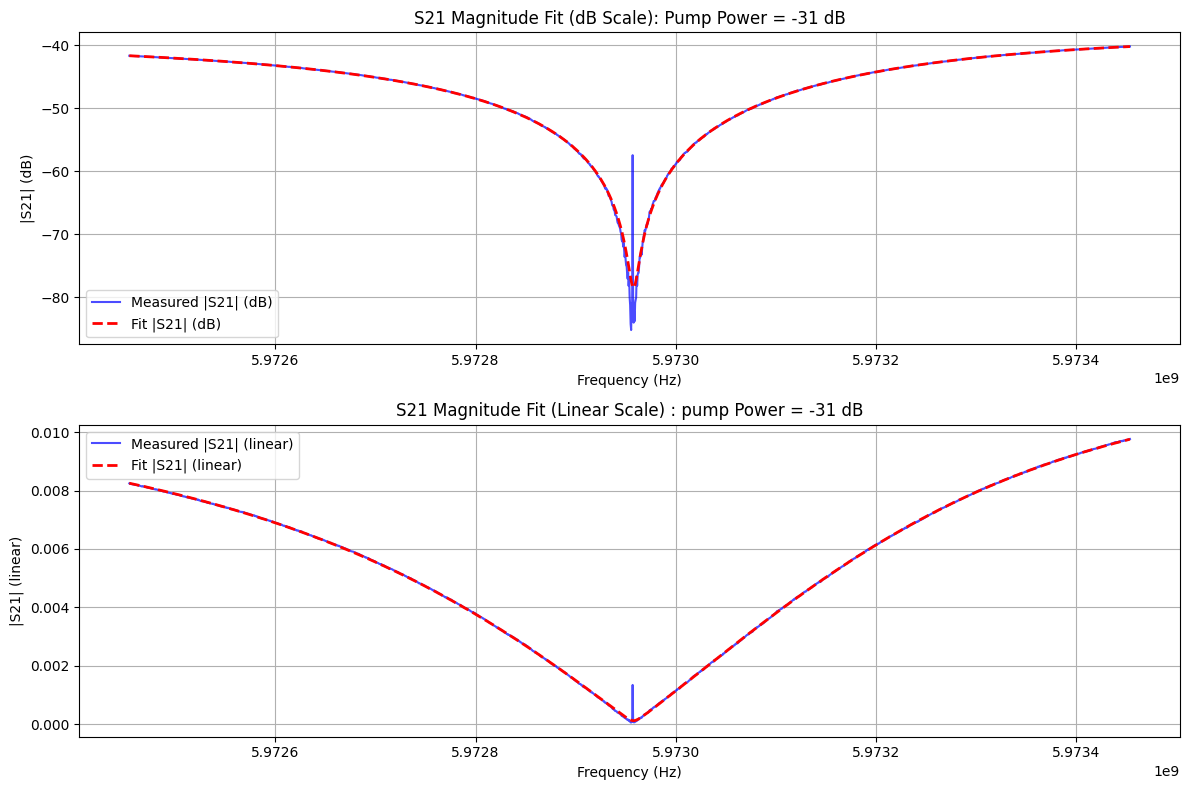

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.972957 GHz -31 dBm pump -41 dBm probe.txt'
pump_power= -31
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields=line.split('\t')
        freq.append(float(fields[1]))
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)


def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.972957e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

def analyze_s21_logmag(freq, logMag,pump_power):
    """
    Complete analysis pipeline for freq + logMag data
    """
    p_final, S21_linear = fit_s21_magnitude(freq, logMag)
    
    w0_fit, Gamma0_fit, Gammac_fit, A_fit, wd_fit = p_final
    
    # Print results
    print("=== Fitted Parameters ===")
    print(f"Resonance frequency (Hz): {w0_fit/(2*np.pi):.6e}")
    print(f"Internal damping Γ₀ (Hz): {Gamma0_fit/(2*np.pi):.1f}")
    print(f"Coupling rate Γc (Hz): {Gammac_fit/(2*np.pi):.1f}")
    print(f"Quality factor Q₀: {w0_fit/(Gamma0_fit):.1f}")
    Band1=((p_final[1]-p_final[2]) / (2 * np.pi))
    print(f"Γin (Hz): {Band1}")
    print(f"Asymmetry parameter wd: {wd_fit:.6f}")

        
    # Generate fit for plotting
    omega = 2 * np.pi * freq
    s21_fit_complex = 1 - (Gammac_fit - 2j*wd_fit) / (Gamma0_fit + 2j*(omega - w0_fit))
    s21_fit_mag = A_fit * np.abs(s21_fit_complex)
    s21_fit_dB = 20 * np.log10(s21_fit_mag)
        
        # Plot results
    plt.figure(figsize=(12, 8))
        
        # Plot in dB scale
    plt.subplot(2, 1, 1)
    plt.plot(freq, logMag, 'b-', label='Measured |S21| (dB)', alpha=0.7)
    plt.plot(freq, s21_fit_dB, 'r--', linewidth=2, label='Fit |S21| (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title(f'S21 Magnitude Fit (dB Scale): Pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
        # Plot in linear scale
    plt.subplot(2, 1, 2)
    plt.plot(freq, S21_linear, 'b-', label='Measured |S21| (linear)', alpha=0.7)
    plt.plot(freq, s21_fit_mag, 'r--', linewidth=2, label='Fit |S21| (linear)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (linear)')
    plt.title(f'S21 Magnitude Fit (Linear Scale) : pump Power = {pump_power} dB')
    plt.legend()
    plt.grid(True)
        
    plt.tight_layout()
    plt.show()
        
    return p_final


p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor5[pump_power]=p_fitted[3]
# damping_gammac_as_parameter[pump_power]=p_fitted[2]/(2*np.pi)
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)


=== Fitted Parameters ===
Resonance frequency (Hz): 5.973107e+09
Internal damping Γ₀ (Hz): 880269.5
Coupling rate Γc (Hz): 868890.7
Quality factor Q₀: 6785.5
Γin (Hz): 11378.80595799794
Asymmetry parameter wd: 506622.603044


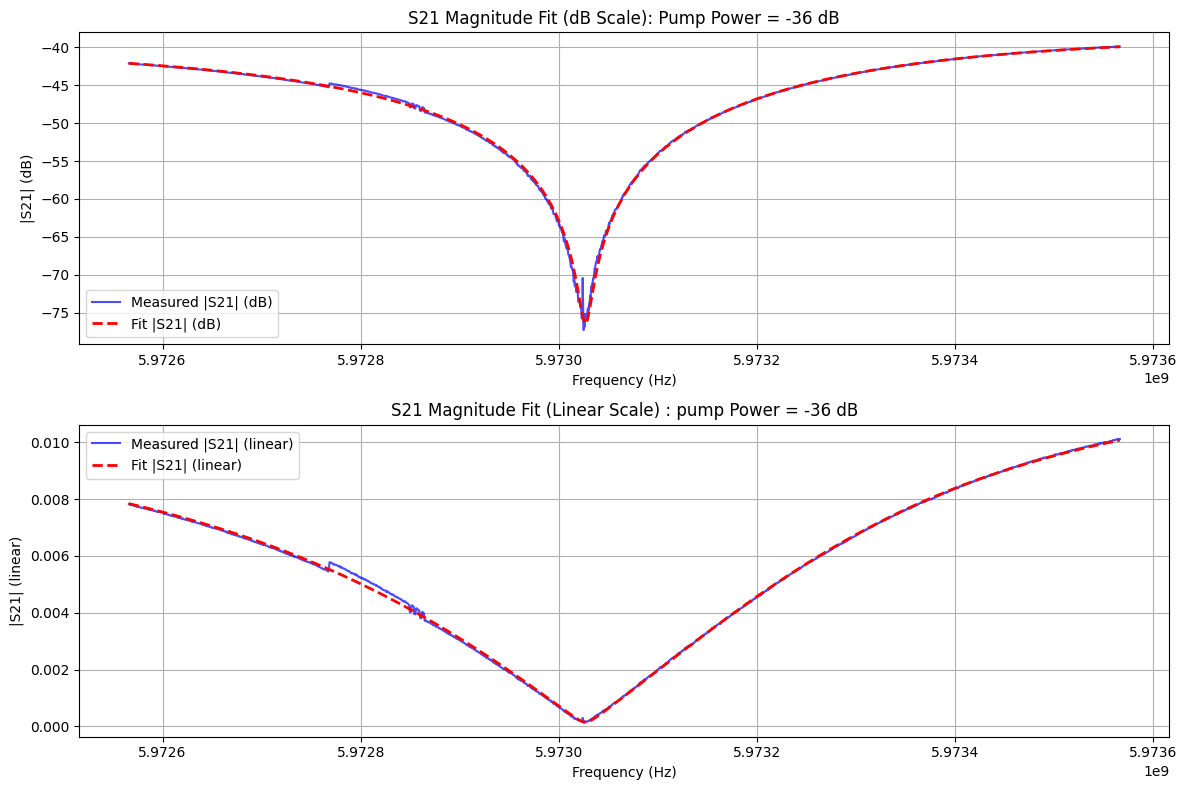

In [89]:
folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.973024 GHz -36 dBm pump -46 dBm probe.txt'
pump_power= -36
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973127e+09
Internal damping Γ₀ (Hz): 910961.0
Coupling rate Γc (Hz): 895875.5
Quality factor Q₀: 6557.0
Γin (Hz): 15085.502897459708
Asymmetry parameter wd: 526911.386128


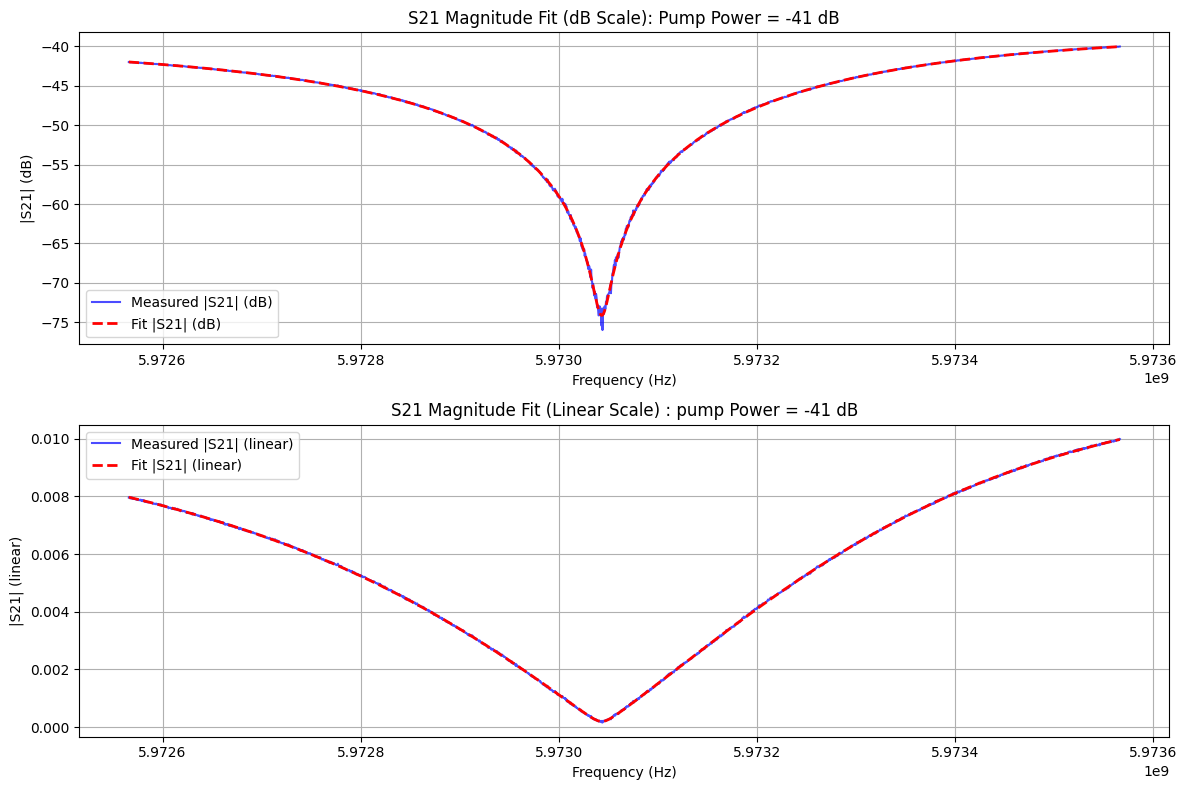

In [90]:
folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.973044 GHz -41 dBm pump -51 dBm probe.txt'
pump_power= -41
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973149e+09
Internal damping Γ₀ (Hz): 944835.0
Coupling rate Γc (Hz): 923459.2
Quality factor Q₀: 6321.9
Γin (Hz): 21375.79352081602
Asymmetry parameter wd: 624672.884640


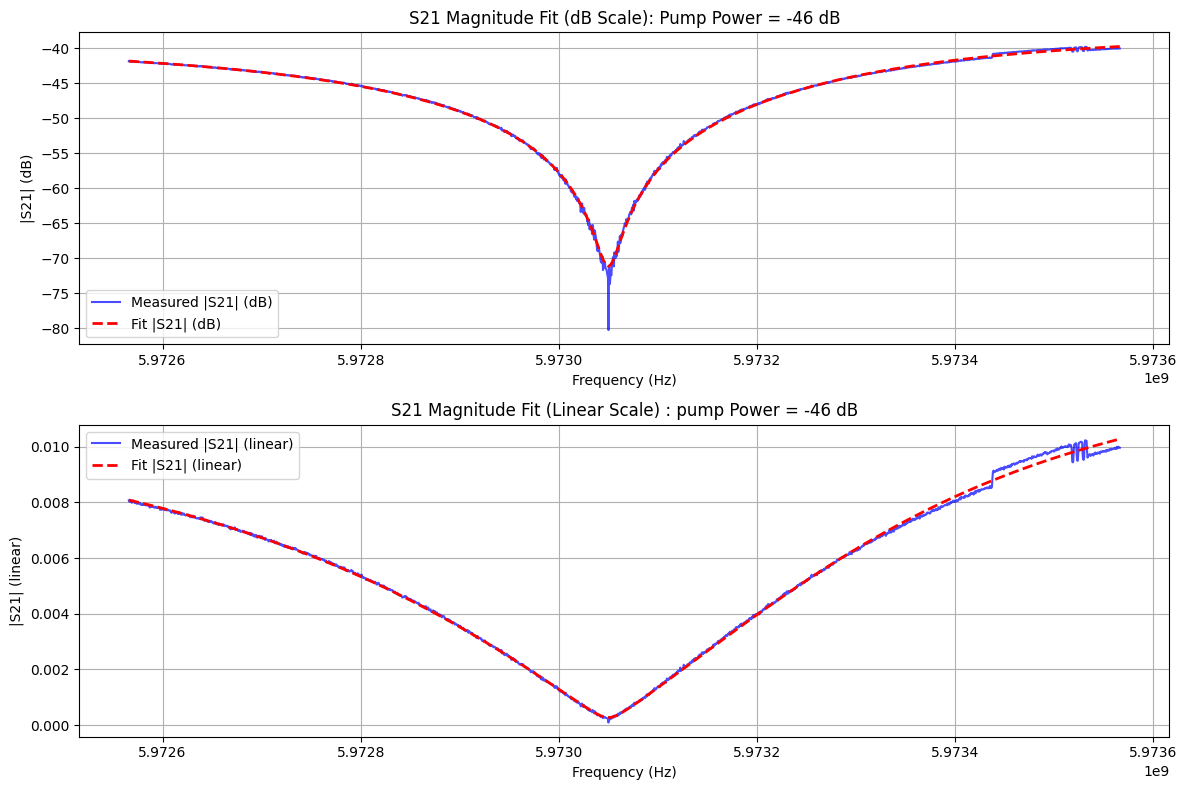

In [91]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.97305 GHz -46 dBm pump -56 dBm probe.txt'
pump_power= -46
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)

Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)


=== Fitted Parameters ===
Resonance frequency (Hz): 5.973131e+09
Internal damping Γ₀ (Hz): 900870.5
Coupling rate Γc (Hz): 871679.5
Quality factor Q₀: 6630.4
Γin (Hz): 29191.010438783826
Asymmetry parameter wd: 507217.241518


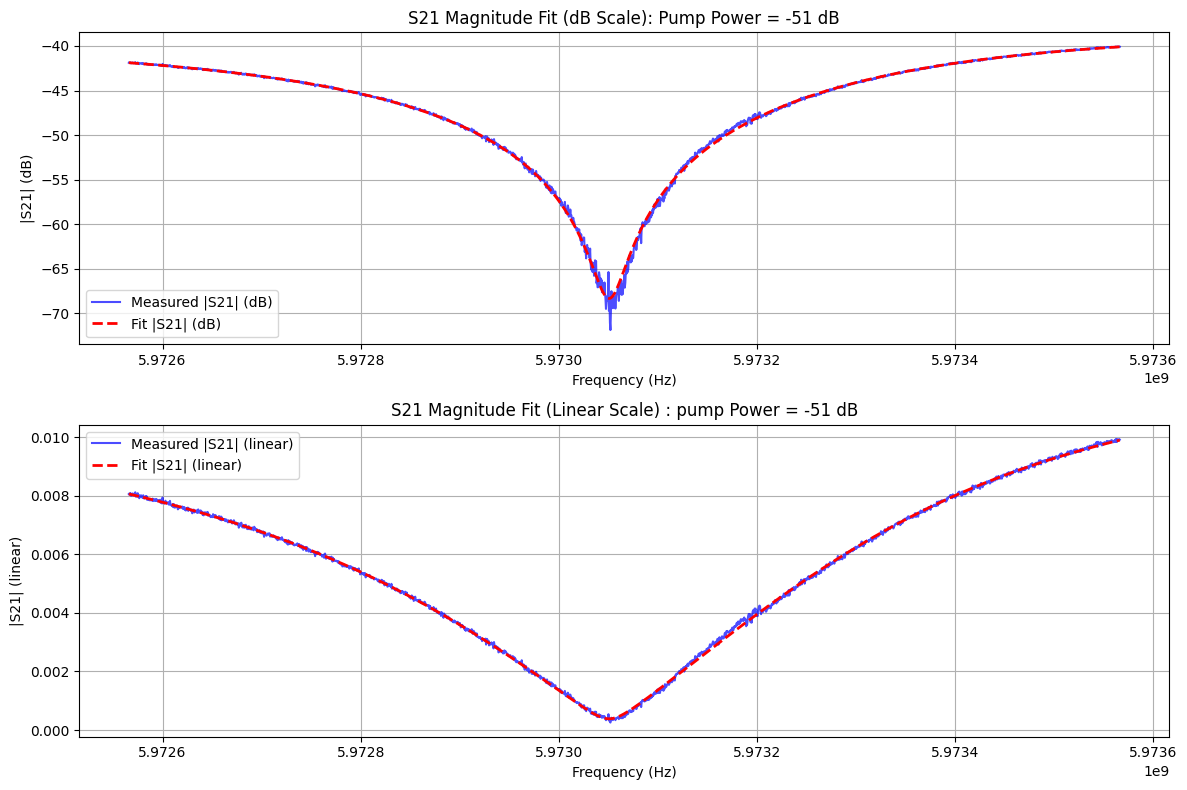

In [92]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.97305 GHz -51 dBm pump -61 dBm probe.txt'
pump_power= -51
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973135e+09
Internal damping Γ₀ (Hz): 918307.3
Coupling rate Γc (Hz): 882263.2
Quality factor Q₀: 6504.5
Γin (Hz): 36044.10616748028
Asymmetry parameter wd: 519837.935850


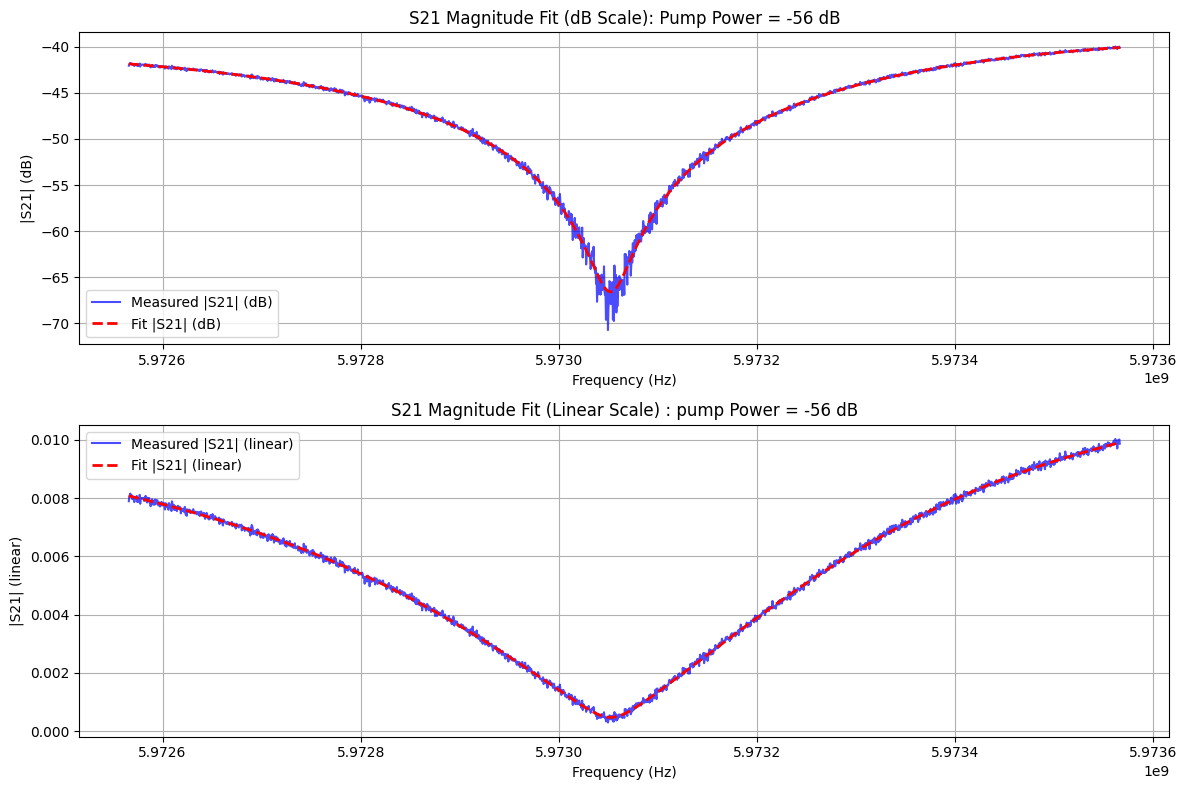

In [93]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.97305 GHz -56 dBm pump -66 dBm probe.txt'
pump_power= -56
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973135e+09
Internal damping Γ₀ (Hz): 924094.2
Coupling rate Γc (Hz): 885220.3
Quality factor Q₀: 6463.8
Γin (Hz): 38873.92049567485
Asymmetry parameter wd: 518664.576314


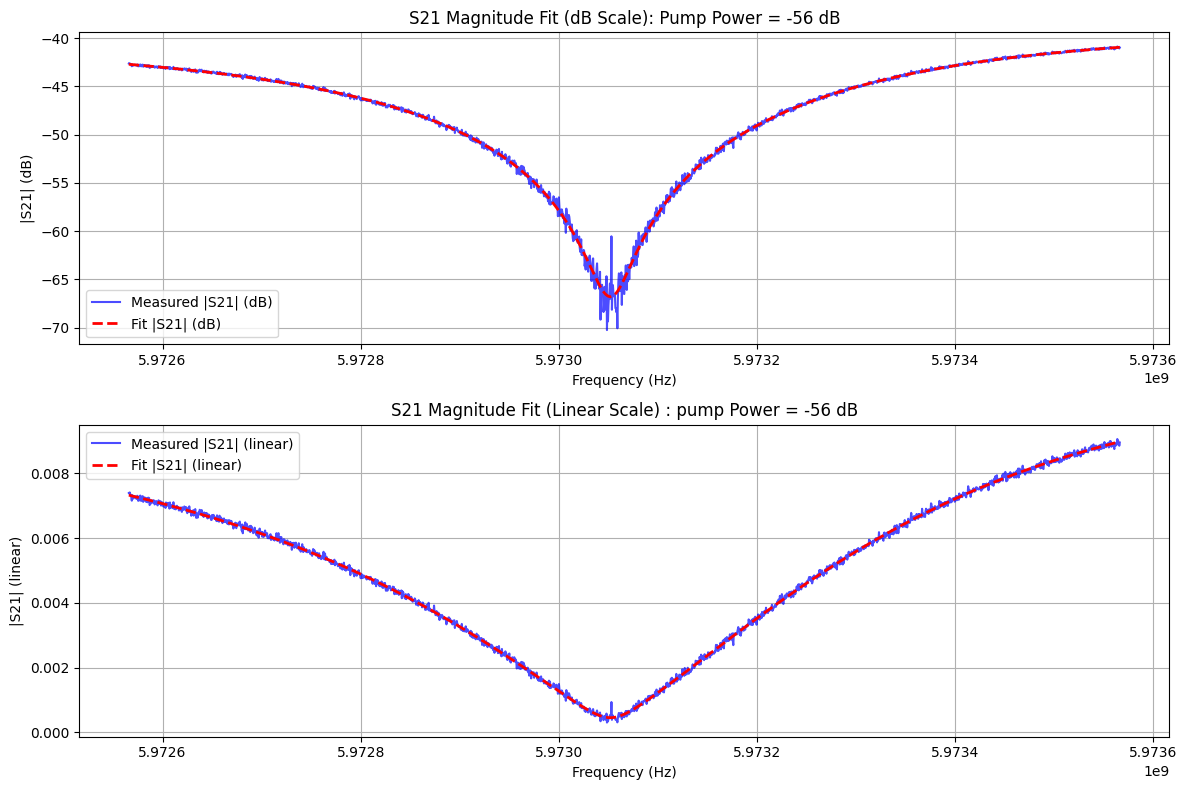

In [94]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.973053 GHz -56 dBm pump -66 dBm probe installed 40 dB attenuator.txt'
pump_power= -56
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)+20  # Adjusted for 40 dB attenuation
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973134e+09
Internal damping Γ₀ (Hz): 923550.2
Coupling rate Γc (Hz): 869758.8
Quality factor Q₀: 6467.6
Γin (Hz): 53791.383975829725
Asymmetry parameter wd: 517304.419086


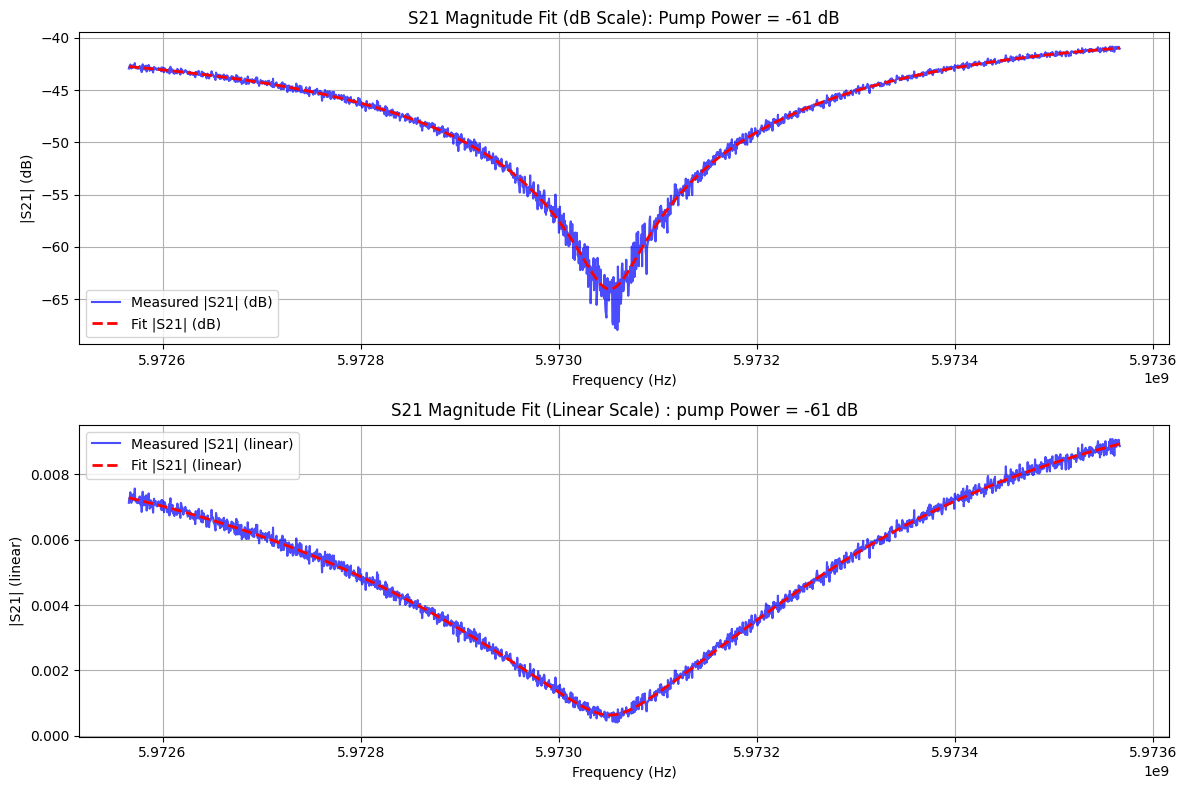

In [95]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.973053 GHz -61 dBm pump -71 dBm probe installed 40 dB attenuator.txt'
pump_power= -61
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)+20 # Adjusted for 40 dB attenuation
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973131e+09
Internal damping Γ₀ (Hz): 926573.9
Coupling rate Γc (Hz): 849685.5
Quality factor Q₀: 6446.5
Γin (Hz): 76888.43979283754
Asymmetry parameter wd: 497121.000762


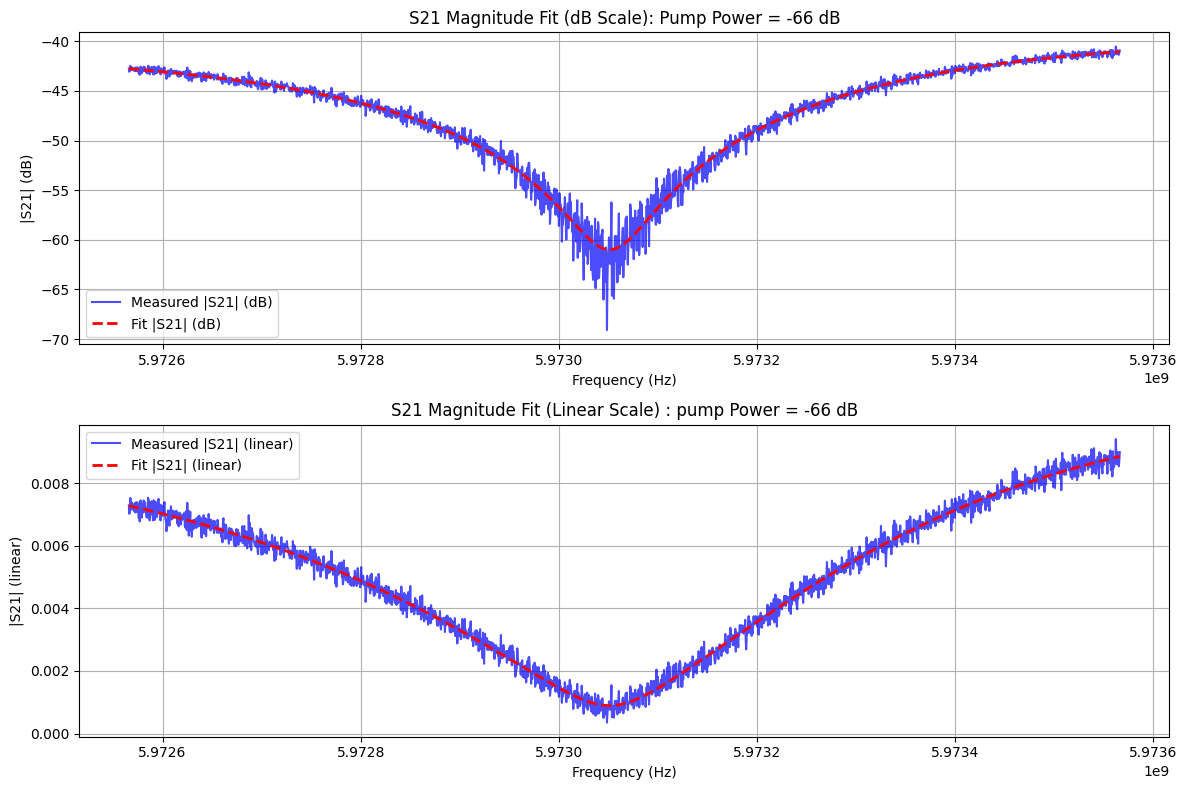

In [96]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.973053 GHz -66 dBm pump -76 dBm probe installed 40 dB attenuator.txt'
pump_power= -66
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)+20 # 20dB extra attenuation
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

=== Fitted Parameters ===
Resonance frequency (Hz): 5.973134e+09
Internal damping Γ₀ (Hz): 942667.9
Coupling rate Γc (Hz): 850167.4
Quality factor Q₀: 6336.4
Γin (Hz): 92500.48978172863
Asymmetry parameter wd: 505159.320971


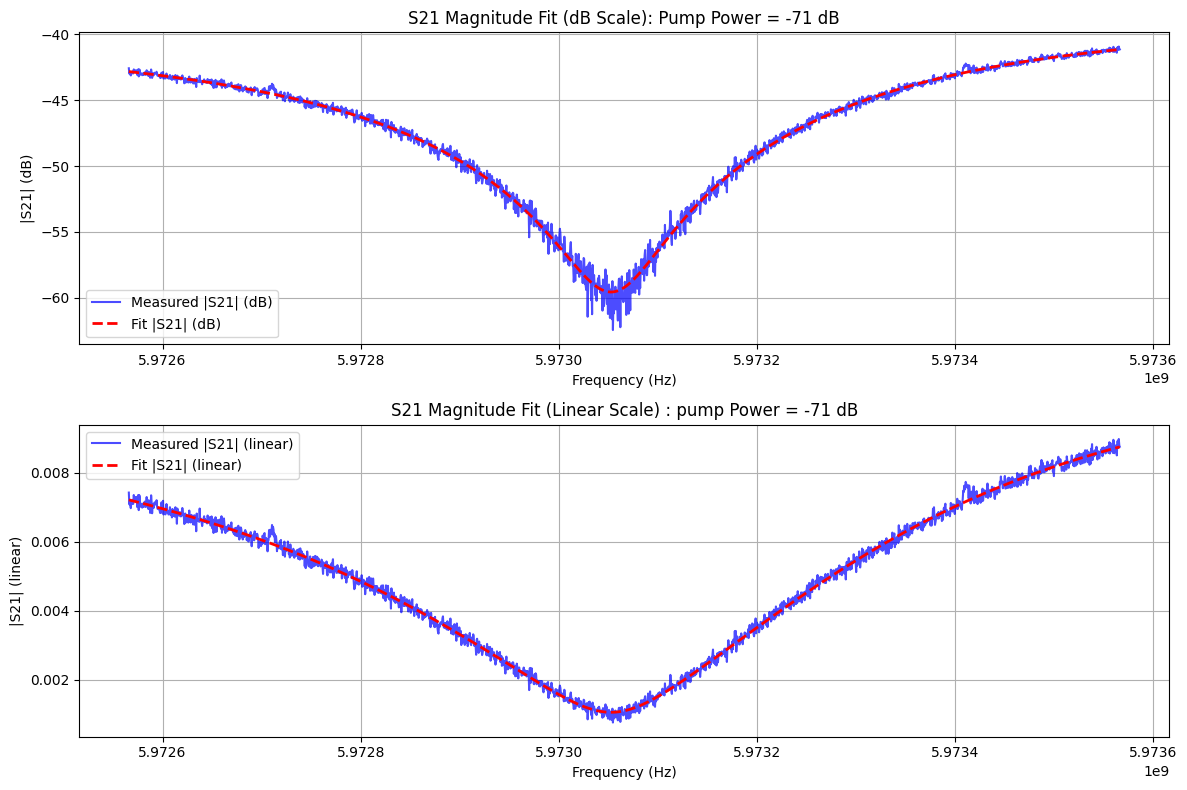

In [97]:
def fit_s21_magnitude(freq, logMag_dB):
    # Convert to linear scale
    S21_mag = 10**(logMag_dB / 20)
    omega = 2 * np.pi * freq
    
    # Model for magnitude-only fitting
    def s21_magnitude_model(w, p):
        w0, Gamma0, Gammac, A, wd = p
        s21_complex = 1 - (Gammac   - 2j*wd) / (Gamma0 + 2j*(w - w0))
        return A * np.abs(s21_complex)
    
    # Residuals for magnitude fitting
    def residuals_mag(p, mag_data, w):
        model_mag = s21_magnitude_model(w, p)
        return model_mag - mag_data
    
    # Initial guess
    w0_guess = 5.97305e9* np.pi*2
    
    p0 = [
        w0_guess,           # w0 (rad/s)
        1e6 * 2 * np.pi,   # Gamma0 (rad/s)
        2.72e5 * 2 * np.pi, # Gammac (rad/s)
        1.0,               # A (amplitude scaling)
        493074.217801   # wd (asymmetry parameter)
    ]
    
    # Fit
    try:
        plsq = leastsq(residuals_mag, p0, args=(S21_mag, omega))
        p_final = plsq[0]
        return p_final, S21_mag
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None, S21_mag

folder='EPFL sample 1 5.973 GHz 215 mK'
filename= '5.973053 GHz -71 dBm pump -81 dBm probe installed 40 dB attenuator.txt'
pump_power= -71
freq=[]
S21=[]
f=open(folder+'\\'+filename,'r')
data=f.readlines()
f.close()
for line in data[16:]:
        fields = line.split('\t')
        freq_val = float(fields[1])
    
        freq.append(freq_val)
        S21.append(float(fields[2]))
freq=array(freq)
logMag=array(S21)+20 # 20dB extra attenuation
S21_linear = 10**(logMag / 20)  # Convert from dB to linear
p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


Band5[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_damping03[pump_power]=p_fitted[2]/(2*np.pi)
Scaling_factor5[pump_power]=p_fitted[3]
asymmetry_parameter5[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency05[pump_power]=p_fitted[0]/(2*np.pi)

In [99]:
print("internal damping for different pump powers:")
for power, band in Band5.items():
    print(f"Pump Power: {power} dBm, Γin (Hz): {band:.6f} Hz")
print("external damping for different pump powers:")    
for power, band in external_damping03.items():
    print(f"Pump Power: {power} dBm, Γex (Hz): {band:.6f} Hz")
print("Scaling factor for different pump powers:")
for power, scaling in Scaling_factor5.items():
    print(f"Pump Power: {power} dBm, Scaling Factor: {scaling:.6f}")


internal damping for different pump powers:
Pump Power: -31 dBm, Γin (Hz): 8988.669888 Hz
Pump Power: -36 dBm, Γin (Hz): 11378.805958 Hz
Pump Power: -41 dBm, Γin (Hz): 15085.502897 Hz
Pump Power: -46 dBm, Γin (Hz): 21375.793521 Hz
Pump Power: -51 dBm, Γin (Hz): 29191.010439 Hz
Pump Power: -56 dBm, Γin (Hz): 38873.920496 Hz
Pump Power: -61 dBm, Γin (Hz): 53791.383976 Hz
Pump Power: -66 dBm, Γin (Hz): 76888.439793 Hz
Pump Power: -71 dBm, Γin (Hz): 92500.489782 Hz
external damping for different pump powers:
Pump Power: -31 dBm, Γex (Hz): 879723.939741 Hz
Pump Power: -36 dBm, Γex (Hz): 868890.675530 Hz
Pump Power: -41 dBm, Γex (Hz): 895875.504861 Hz
Pump Power: -46 dBm, Γex (Hz): 923459.178889 Hz
Pump Power: -51 dBm, Γex (Hz): 871679.528538 Hz
Pump Power: -56 dBm, Γex (Hz): 885220.258312 Hz
Pump Power: -61 dBm, Γex (Hz): 869758.784131 Hz
Pump Power: -66 dBm, Γex (Hz): 849685.475095 Hz
Pump Power: -71 dBm, Γex (Hz): 850167.429358 Hz
Scaling factor for different pump powers:
Pump Power: -31 

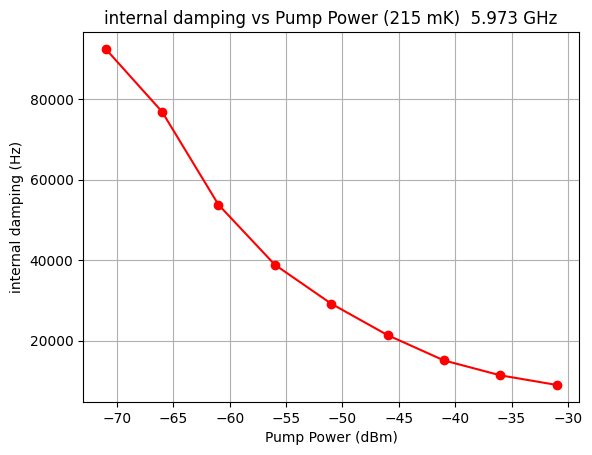

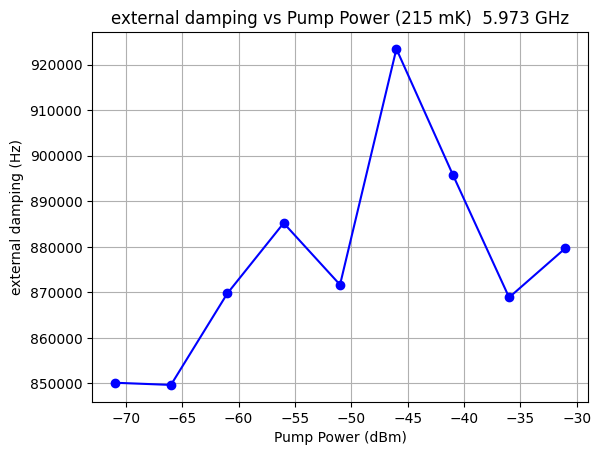

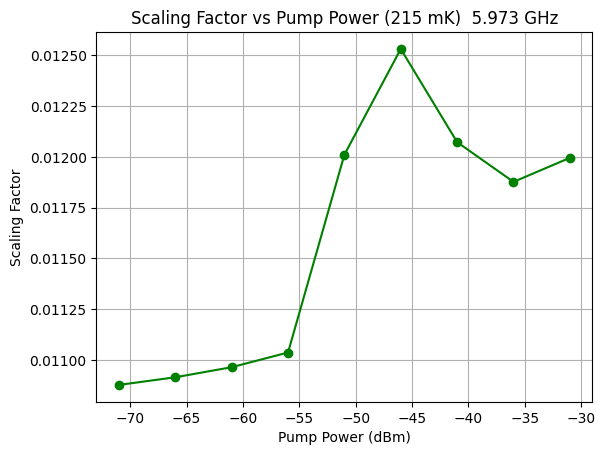

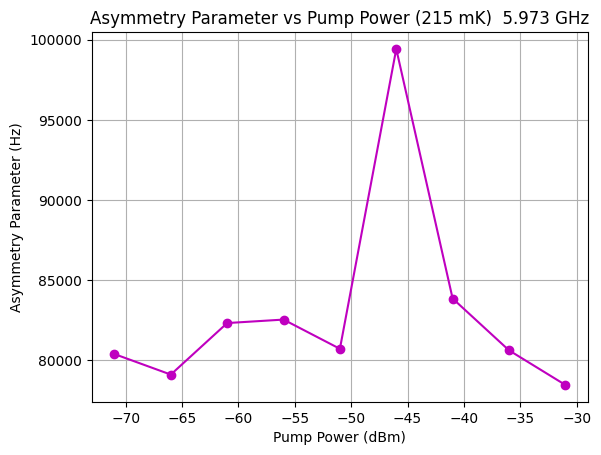

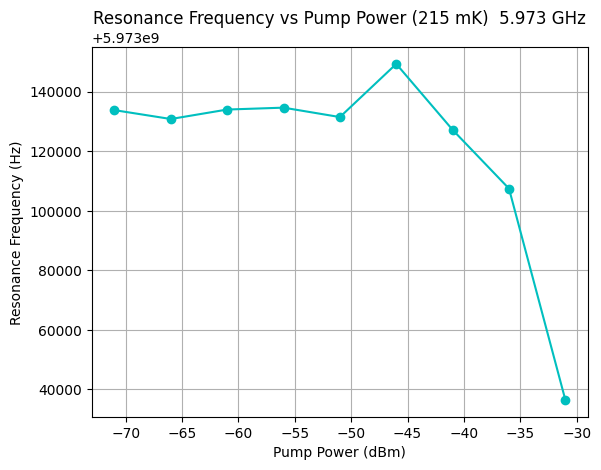

In [100]:
plot(list(Band5.keys()), list(Band5.values()), 'ro-')
xlabel('Pump Power (dBm)')
ylabel('internal damping (Hz)')
grid(True)
title('internal damping vs Pump Power (215 mK)  5.973 GHz')
show()
plot(list(external_damping03.keys()), list(external_damping03.values()), 'bo-')
xlabel('Pump Power (dBm)')
ylabel('external damping (Hz)')
grid(True)
title('external damping vs Pump Power (215 mK)  5.973 GHz')
show()
plot(list(Scaling_factor5.keys()), list(Scaling_factor5.values()), 'go-')
xlabel('Pump Power (dBm)')
ylabel('Scaling Factor')
grid(True)
title('Scaling Factor vs Pump Power (215 mK)  5.973 GHz')
show()
plot(list(asymmetry_parameter5.keys()), list(asymmetry_parameter5.values()), 'mo-')
xlabel('Pump Power (dBm)')
ylabel('Asymmetry Parameter (Hz)')
grid(True)
title('Asymmetry Parameter vs Pump Power (215 mK)  5.973 GHz')
show()
plot(list(resonance_frequency05.keys()), list(resonance_frequency05.values()), 'co-')
xlabel('Pump Power (dBm)')
ylabel('Resonance Frequency (Hz)')
grid(True)
title('Resonance Frequency vs Pump Power (215 mK)  5.973 GHz')
show()

# Comparison of internal damping for different temperatures 5.973 GHz

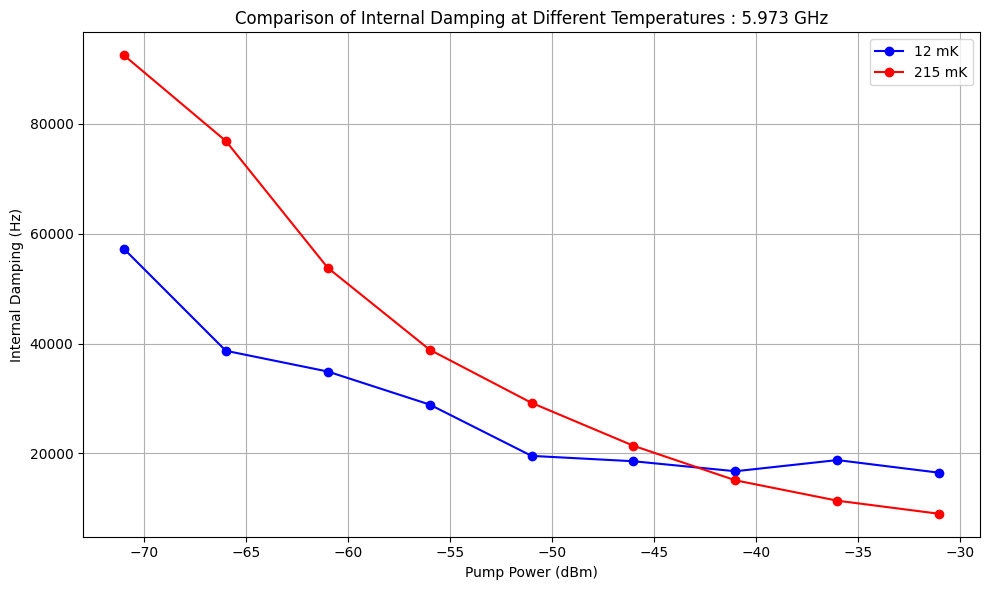

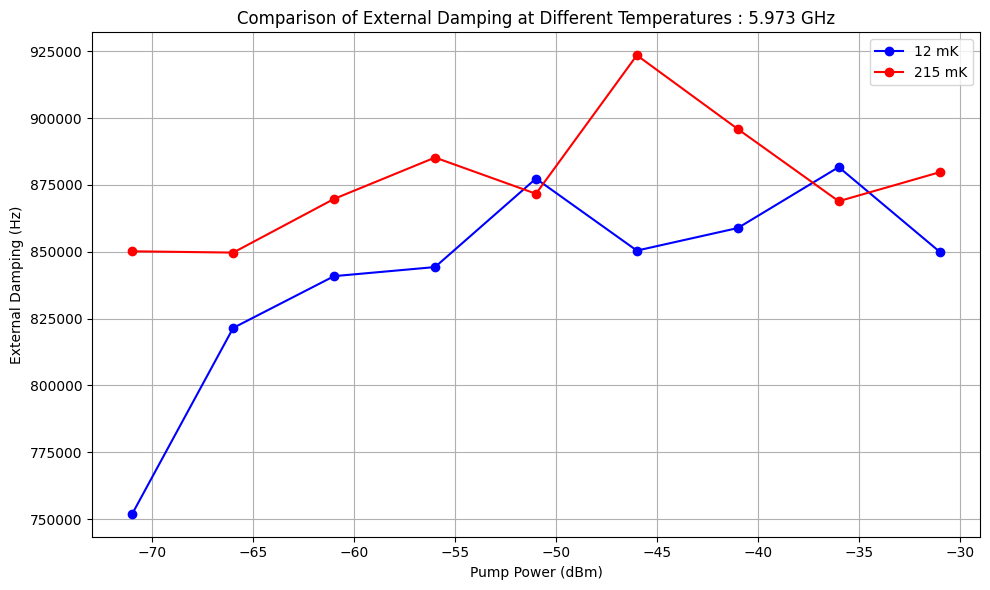

In [27]:
# Comparison of internal damping for different temperatures
plt.figure(figsize=(10, 6))
plt.plot(list(Band4.keys()), list(Band4.values()), 'bo-', label='12 mK')
plt.plot(list(Band5.keys()), list(Band5.values()), 'ro-', label='215 mK')
plt.xlabel('Pump Power (dBm)')
plt.ylabel('Internal Damping (Hz)')
plt.title('Comparison of Internal Damping at Different Temperatures : 5.973 GHz')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# comparison of external damping for different temperatures
plt.figure(figsize=(10, 6))
plt.plot(list(external_damping02.keys()), list(external_damping02.values()), 'bo-', label='12 mK')
plt.plot(list(external_damping03.keys()), list(external_damping03.values()), 'ro-', label='215 mK')
plt.xlabel('Pump Power (dBm)')
plt.ylabel('External Damping (Hz)')
plt.title('Comparison of External Damping at Different Temperatures : 5.973 GHz')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# II. Determine whether the area of Sx depends on pump power

## EPFL sample 1 5.1 GHz 215 mK

In [10]:
from scipy import *
from scipy.optimize import leastsq
from pylab import *
import glob
from datetime import *
import time
from scipy.special import *
import os
import re
import pandas as pd 

In [43]:
"""p_fitted = analyze_s21_logmag(freq*1e9, logMag,pump_power)


# Band[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
Scaling_factor[pump_power]=p_fitted[3]
damping_gammac_as_parameter[pump_power]=((p_fitted[1]-p_fitted[2]) / (2 * np.pi))
external_coupling[pump_power]=p_fitted[2]/(2*np.pi)
gamma0[pump_power]=p_fitted[1]/(2*np.pi)
asymmetry_parameter[pump_power]=p_fitted[4]/(2*np.pi)
resonance_frequency[pump_power]=p_fitted[0]/(2*np.pi)"""

import pandas as pd
import numpy as np  
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# S = (k_ext * G**2*n_d/(4*omega**2+ k_tot**2))*S_x
# S_x = ((k_b* T * Γm )/(m_eff *omega**2))/[(w-omega)**2 + (Γm/2)**2]
# Area under S_x = (k_b * T) / (2*m_eff * omega**2)
# n_d = E/h_bar * w_d # light entering the cavity
# where k_ext is the external coupling rate, G is d(w_c)/dx, n_d is the number of photons in the drive mode, omega is the resonance frequency,
#  k_tot is the total damping rate, k_b is Boltzmann's constant, T is the temperature, Γm is the mechanical damping rate, m_eff is the effective mass of the mechanical oscillator.

k_b = 1.380649e-23  # Boltzmann's constant in J/K
ξmass = 0.27
m_eff = ξmass*2700*(np.pi)*((100e-6)**2)*200e-9 # Effective mass of the mechanical oscillator in kg: from EPFL paper using the resonance freq. vs diameter plot density = 2700 kg/m3
h_bar = 1.0545718e-34  # Reduced Planck's constant in J·s
T=215e-3  # Temperature in K (215 mK)

omega_m=2*np.pi* 1.52477e6  # Mechanical  frequency in rad/s
w_d=2*np.pi*5.09686043e9 # freq. of light entering the resonator in rad/s (example value, adjust as needed)
d=200e-9 # distaance between the elctrodes across drum
g0 =(0.37*np.sqrt(h_bar)*(w_d/2/d)*((100e-6)**2 *(200e-9)**2 * 2700 * 350e6)**(-0.25))  # vacuum opto-mechanical coupling in rad/s g0 = 0.37√ℏ(ω_c/2d)(R^2 t^2 rho*sigma_m)^(-1/4) where R is the radius of the drum, t is the thickness, rho is the density of the drum,
# sigma_m is the mechanical stress in the drum (From Youseffi 2023 paper section B eqn 54)

x_zpf = np.sqrt(h_bar / (2*m_eff * omega_m))  # zero point fluctuation ( units : m)
G=g0/x_zpf # rate of change of resonance frequency with respect to displacement in rad/s/m
print(f"g0: {g0/(2*np.pi)} Hz, G: {G} rad/s/m, x_zpf: {x_zpf} m")
Area_dic={}
Area_analytical={}
Area_using_parameter_value={}
# Extracting necessary terms from fits
filenames =['-31 dBm pump_0006.csv',
            '-36 dBm pump_0003.csv',
            '-41 dBm pump_0002.csv',
            '-46 dBm pump_0000.csv',
            '-51 dBm pump_0001.csv',
            '-56 dBm pump_0002.csv',
            '-61 dBm pump_0004.csv',
            '-66 dBm pump_0005.csv']
folder = "EPFL sample 1 5.1 GHz 215 mK\\5.09686043 GHz 215 mK mechanics green pump"



g0: 10.98018357206024 Hz, G: 6.293789187991163e+16 rad/s/m, x_zpf: 1.096168397596485e-15 m


intial guess: [2.986088e-14, 1524774.0, 1.7, -1.535643e-20]
=== Fitted Parameters for pump power:-31 ===
Resonance frequency (Hz): 1.524773e+06
Linewidth Γm (Hz): 1.146
Amplitude : 3.513903e-20
Noise range: 2.519384e-23


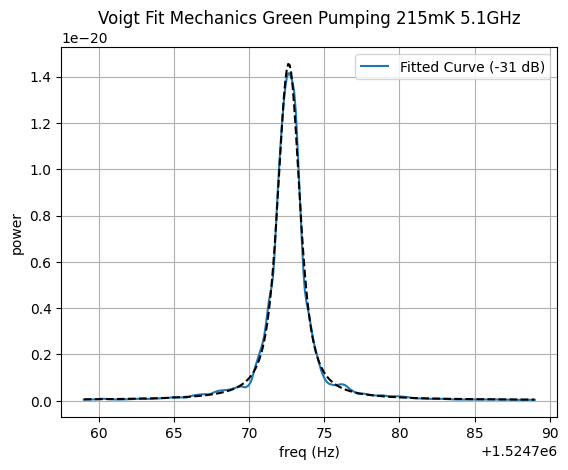

intial guess: [6.232587914925139e-12, 1524775.749636479, 15, 3.545968253989874e-24]
=== Fitted Parameters for pump power:-36 ===
Resonance frequency (Hz): 1.524774e+06
Linewidth Γm (Hz): 1.578
Amplitude : 9.045109e-21
Noise range: 1.275840e-23
intial guess: [6.232587914925139e-12, 1524775.749636479, 15, 3.545968253989874e-24]
=== Fitted Parameters for pump power:-41 ===
Resonance frequency (Hz): 1.524774e+06
Linewidth Γm (Hz): 1.584
Amplitude : 2.535298e-21
Noise range: 1.285729e-23
intial guess: [6.232587914925139e-12, 1524775.749636479, 15, 3.545968253989874e-24]
=== Fitted Parameters for pump power:-46 ===
Resonance frequency (Hz): 1.524775e+06
Linewidth Γm (Hz): 1.453
Amplitude : 7.834149e-22
Noise range: 9.964767e-24
intial guess: [6.232587914925139e-12, 1524775.749636479, 15, 3.545968253989874e-24]
=== Fitted Parameters for pump power:-51 ===
Resonance frequency (Hz): 1.524774e+06
Linewidth Γm (Hz): 1.361
Amplitude : 2.252343e-22
Noise range: 9.632285e-24


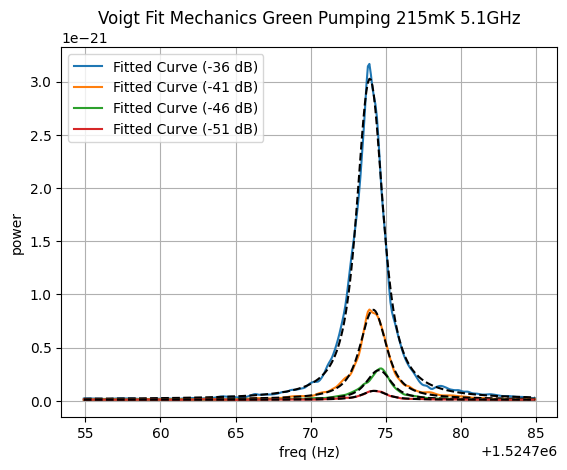

intial guess: [6.69863e-15, 1524774.7557146763, 1.809, 3.737126e-14]
=== Fitted Parameters for pump power:-56 dB ===
Resonance frequency (Hz): 1.524774e+06
Linewidth Γm (Hz): 1.701
Amplitude : 5.437827e-23
Noise range: 9.523509e-24
intial guess: [6.69863e-15, 1524774.7557146763, 1.809, 3.737126e-14]
=== Fitted Parameters for pump power:-61 dB ===
Resonance frequency (Hz): 1.524774e+06
Linewidth Γm (Hz): 1.252
Amplitude : 1.394646e-23
Noise range: 9.192735e-24
intial guess: [6.69863e-15, 1524774.7557146763, 1.809, 3.737126e-14]
=== Fitted Parameters for pump power:-66 dB ===
Resonance frequency (Hz): 1.524775e+06
Linewidth Γm (Hz): 1.798
Amplitude : 5.044905e-24
Noise range: 9.158586e-24


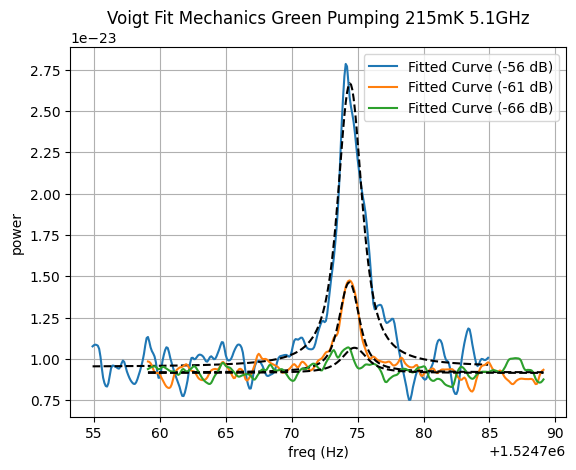

In [64]:
import numpy as np

def read_measurement_file(filename):
    """Reads measurement data from CSV files used in your experiment."""
    folder = "EPFL sample 1 5.1 GHz 215 mK\\5.09686043 GHz 215 mK mechanics green pump"
    filename = next((f for f in filenames if f.startswith(f"{pump_power} dBm pump")), None)
    freq = []
    S = []
    with open(folder+"//"+filename, 'r') as f:
        data = f.readlines()
    
    # Use the same slicing as your original code
    for line in data[45+350:-350]:  # Adjust these indices if needed
        fields = line.strip().split(',')
        if len(fields) >= 2:
            try:
                freq.append(float(fields[0]))  # First column: frequency
                S.append(float(fields[1]))     # Second column: S21
            except ValueError:
                continue  # Skip lines that can't be parsed
    
    return np.array(freq), np.array(S)

# Corrected parameters and calculations
rbw = 1  #  Resolution bandwidth in Hz 
total_gain_dB = 60  # Typical total amplification
fitted_parameter_voigt={}   
fitted_curves={}
def peval(freq, p):
    f0=p[1] #resonance frequency
    df=p[2] #linewidth
    sigma = rbw / (2 * np.sqrt(2 * np.log(2)))
    return p[0]*voigt_profile(freq-f0,sigma,df/2)+p[3]
def residuals(p, power, freq):
    return peval(freq,p)-power

# fitting voigt profile to 215mK mechanics green pump
if not os.path.isdir(folder):
    print(f"Folder not found: {folder}")
else: 
# i. -31 dB voigt fitting
    file00='-31 dBm pump_0006.csv'
    freq0=[]
    pump=-31
    power0=[]
    f=open(folder+"\\"+file00,'r')
    data=f.readlines()
    f.close()
    for line in data[45+350:-350]:
                fields=line.split(',')
                freq0.append(float(fields[0]))
                power0.append(float(fields[1]))
    freq0=array(freq0)-5.09686043e+9
    power0=1e-3*10**((array(power0)-75)/10)
        
    plot(freq0,power0, label=f'Fitted Curve ({pump} dB)')           
    p0=[2.986088e-14, 1.524774e+06,1.7, -1.535643e-20]    # probably p[0] is amplitude, p[1] is resonance frequency, p[2] is linewidth, p[3] is offset/noise range
    plsq0 = leastsq(residuals, p0, args=(power0, freq0), full_output=1)
    p_final=plsq0[0]
    print("intial guess:",p0)
    # Print results
    print(f"=== Fitted Parameters for pump power:{pump} ===")
    print(f"Resonance frequency (Hz): {p_final[1]:.6e}")
    print(f"Linewidth Γm (Hz): { p_final[2]:.3f}")
    print(f"Amplitude : {p_final[0]:.6e}")
    print(f"Noise range: {p_final[3]:.6e}")
    plot(freq0,peval(freq0, p_final),'k--')
    S_fitted=peval(freq0, p_final)
    fitted_parameter_voigt[pump]=p_final
    fitted_curves[pump]=[freq0,power]
    xlabel('freq (Hz)')
    # xlim(1.524740e6, 1.5248e6)
    # plt.ylim(0e-12, 0.2e-1)
    plt.title("Voigt Fit Mechanics Green Pumping 215mK 5.1GHz")
    plt.grid(True)
    ylabel('power')
    plt.legend(loc='best') 
    show() 


# ii. -36,-41,-46,-51 dB voigt fitting
    files=['-36 dBm pump_0003.csv',
            '-41 dBm pump_0002.csv',
            '-46 dBm pump_0000.csv',
            '-51 dBm pump_0001.csv']
    pump_pwr=[-36,-41,-46,-51]
    for pump in pump_pwr:      
            filename = next((f for f in files if f.startswith(f"{pump} dBm pump")), None)
            freq=[]
            power=[]
            f=open(folder+"\\"+filename,'r')
            data=f.readlines()
            f.close()
            for line in data[45+350:-350]:
                fields=line.split(',')
                freq.append(float(fields[0]))
                power.append(float(fields[1]))
            freq=array(freq)-5.09686043e+9
            power=(1e-3*10**((array(power)-75)/10))
        
            plot(freq,power, label=f'Fitted Curve ({pump} dB)')           
            p0=[6.232587914925139e-12, 1524775.749636479,15, 3.545968253989874e-24]    # probably p[0] is amplitude, p[1] is resonance frequency, p[2] is linewidth, p[3] is offset/noise range
            plsq = leastsq(residuals, p0, args=(power, freq), full_output=1)
            p_final=plsq[0]
            print("intial guess:",p0)
            # Print results
            print(f"=== Fitted Parameters for pump power:{pump} ===")
            print(f"Resonance frequency (Hz): {p_final[1]:.6e}")
            print(f"Linewidth Γm (Hz): { p_final[2]:.3f}")
            print(f"Amplitude : {p_final[0]:.6e}")
            print(f"Noise range: {p_final[3]:.6e}")
            plot(freq,peval(freq, p_final),'k--')
            S_fitted=peval(freq, p_final)
            fitted_parameter_voigt[pump]=p_final
            fitted_curves[pump]=[freq,power]
            xlabel('freq (Hz)')
            # xlim(1.524740e6, 1.5248e6)
            # plt.ylim(0e-12, 0.2e-1)
            plt.title("Voigt Fit Mechanics Green Pumping 215mK 5.1GHz")
            plt.grid(True)
            ylabel('power')
            plt.legend(loc='best') 
    show() 
    # ii. fitting for -56,-61.-66
    files_01 = ['-56 dBm pump_0002.csv',
            '-61 dBm pump_0004.csv',
            '-66 dBm pump_0005.csv']
    pump_pwr=[-56,-61,-66]
    for pump in pump_pwr:      
            filename = next((f for f in files_01 if f.startswith(f"{pump} dBm pump")), None)
            freq=[]
            power=[]
            f=open(folder+"\\"+filename,'r')
            data=f.readlines()
            f.close()
            for line in data[45+350:-350]:
                fields=line.split(',')
                freq.append(float(fields[0]))
                power.append(float(fields[1]))
            freq=array(freq)-5.09686043e+9
            power=(1e-3*10**((array(power)-75)/10))
            power=power 
            plot(freq,power, label=f'Fitted Curve ({pump} dB)')           
            p0=[ 6.698630e-15, 1524774.7557146763,1.809, 3.737126e-14]    # probably p[0] is amplitude, p[1] is resonance frequency, p[2] is linewidth, p[3] is offset/noise range
            plsq = leastsq(residuals, p0, args=(power, freq), full_output=1)
            p_final=plsq[0]
            print("intial guess:",p0)
            # Print results
            print(f"=== Fitted Parameters for pump power:{pump} dB ===")
            print(f"Resonance frequency (Hz): {p_final[1]:.6e}")
            print(f"Linewidth Γm (Hz): { p_final[2]:.3f}")
            print(f"Amplitude : {p_final[0]:.6e}")
            print(f"Noise range: {p_final[3]:.6e}")
            plot(freq,peval(freq, p_final),'k--')
            S_fitted=peval(freq, p_final)
            fitted_parameter_voigt[pump]=p_final
            fitted_curves[pump]=[freq,power]
            xlabel('freq (Hz)')
            # xlim(1.524740e6, 1.5248e6)
            # plt.ylim(0e-12, 0.2e-1)
            plt.title("Voigt Fit Mechanics Green Pumping 215mK 5.1GHz")
            plt.grid(True)
            ylabel('power')
            plt.legend(loc='best') 
    show() 





 pump power : -31 dB
k_ext: 274691.30449392064 Hz, k_tot: 277604.74038262037 Hz, w_c: 5096831350.114215 Hz
 detuning : 29079.885784589205 Hz
n_d 8.103202e+04
 factor: 1.010836e+07, m_eff: 4.580442088933917e-12 kg, omega_m: 1524772.6320095712 Hz
 pump power : -36 dB
k_ext: 277496.0088974667 Hz, k_tot: 281392.79952054686 Hz, w_c: 5096830289.85791 Hz
 detuning : 30140.142089158893 Hz
n_d 2.514582e+04
 factor: 3.168129e+06, m_eff: 4.580442088933917e-12 kg, omega_m: 1524773.9293103716 Hz
 pump power : -41 dB
k_ext: 276710.43674401933 Hz, k_tot: 283567.00285188376 Hz, w_c: 5096828598.0576935 Hz
 detuning : 31831.94230585388 Hz
n_d 7.774611e+03
 factor: 9.766242e+05, m_eff: 4.580442088933917e-12 kg, omega_m: 1524774.1543233695 Hz
 pump power : -46 dB
k_ext: 273165.0292291408 Hz, k_tot: 282884.06762307143 Hz, w_c: 5096831529.060112 Hz
 detuning : 28900.93988753188 Hz
n_d 2.459040e+03
 factor: 3.049521e+05, m_eff: 4.580442088933917e-12 kg, omega_m: 1524774.5300379025 Hz
 pump power : -51 dB
k_e

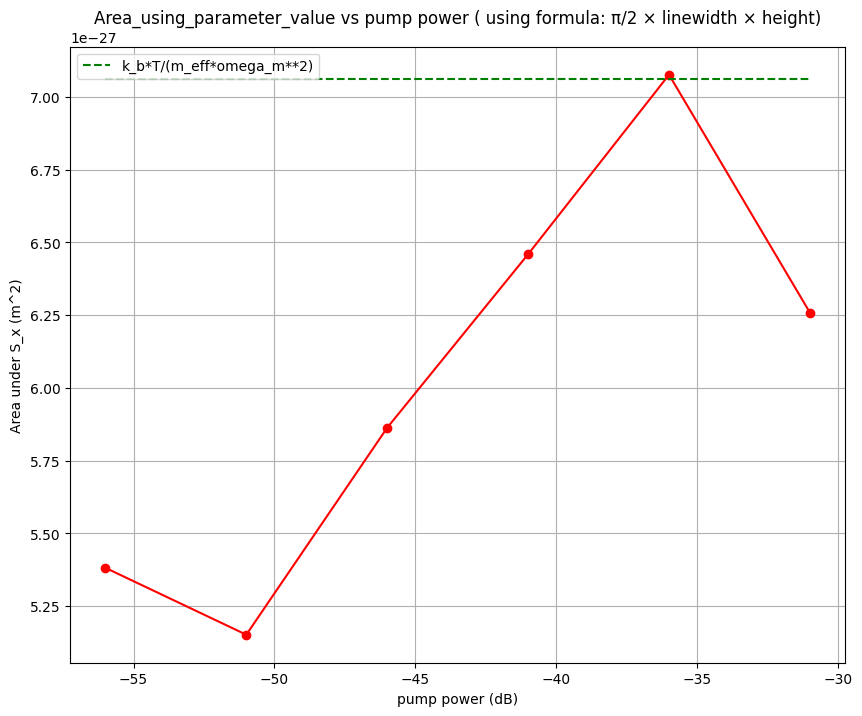

sigma 0.42466090014400953
1.064467019431226 sigma * sqrt(2*pi)
3.9810717055349695e-16 P_in_W
4.2377195325327965e-16 P_in_W * sigma * sqrt(2*pi)


In [65]:


# finding Area and post fitting processing
#  π/2 × linewidth × height. (given in thesis)
for pump_power, p_fitted in Storing_pFinal_215mK.items():
    # Extract parameters from fits
    k_ext = p_fitted[2]  # External coupling rate [rad/s]
    k_tot = p_fitted[1]  # Total damping rate [rad/s]
    w_c = p_fitted[0]    # Resonance frequency [rad/s]
    p_voigt_fit=fitted_parameter_voigt[pump_power]
    print(f" pump power : {pump_power} dB")
    print(f"k_ext: {k_ext/(2*np.pi)} Hz, k_tot: {k_tot/(2*np.pi)} Hz, w_c: {w_c/(2*np.pi)} Hz")
    Γm=2*np.pi*p_voigt_fit[2] 
   
    # Γm=2*np.pi*Γm # Mechanical damping rate in rad/s 
    omega_m=2*np.pi*p_voigt_fit[1]
    
    # omega_m=2*np.pi*omega_m # mechanical frequency in rad/s
    # Convert to noise spectrum output
    
    # Calculate photon number n_d (corrected formula)
    P_in_W = 1e-3 * 10**((pump_power-68)/10) # accounting for attenuation
    detuning = w_d - w_c
    print(f" detuning : {detuning/(2*np.pi)} Hz")
    n_d = (4 * P_in_W * k_ext) / (h_bar * w_d * ((k_tot)**2 + 4*detuning**2))
    # print("parameters: ",P_in_W,k_ext, h_bar, w_d, k_tot, detuning)
    print(f"n_d {n_d:.6e}")
    w=2*np.pi*fitted_curves[pump_power][0]
    S_fitted=fitted_curves[pump_power][1]
    # S_x= k_b*T*Γm/(m_eff*omega_m**2)/((w-omega_m)**2+(omega_m/2)**2)
    factor = 2*(k_ext * G**2 * n_d * h_bar * w_d) / (4*omega_m**2 + k_tot**2)
    print(f" factor: {factor:.6e}, m_eff: {m_eff} kg, omega_m: {omega_m/(2*np.pi)} Hz")
    # S_x=S_fitted / factor  # Convert to PSD of mechanical motion
    # plot(fitted_curves[pump_power][0],S_x, label=f'S_x for {pump_power} dB')
    # plt.show()
    # Find the peak position (maximum of S_x)
    peak_idx = np.argmax(S_fitted)
    peak_x = fitted_curves[pump_power][0][peak_idx]
    # Define a window around the peak (e.g., ±10 Hz)
    window_width = 10  # Hz
    x_min = peak_x - window_width
    x_max = peak_x + window_width
    # Mask for the integration range
    mask = (fitted_curves[pump_power][0] >= x_min) & (fitted_curves[pump_power][0] <= x_max)
    # area1 = np.trapezoid(S_x[mask], fitted_curves[pump_power][0][mask])  # Numerical integration around the peak
    # Area_dic[pump_power]=area1
    area_2=(k_b*T)/(m_eff*omega_m**2)  # area under S_x from equaipartition
    Area_analytical[pump_power]=area_2
    
    area_3=(p_voigt_fit[0]*p_voigt_fit[2]*(np.pi/2)/factor)  # π/2 × linewidth × height 
    Area_using_parameter_value[pump_power]=area_3


# plt.figure(figsize=(10,8))
# plt.plot(list(Area_dic.keys()), list(Area_dic.values()), "ro-")
# plt.xlabel("pump power (dB)")
# plt.ylabel("Area under S_x (m^2)")
# plt.grid(True)
# plt.title("Area vs pump power using numerical computation")
# plt.show()

# plt.figure(figsize=(10,8))
# plt.plot(list(Area_analytical.keys()), list(Area_analytical.values()), "ro-")
# plt.xlabel("pump power (dB)")
# plt.ylabel("Area under S_x (m^2)")
# plt.grid(True)
# plt.title("Area vs pump power using (k_b*T)/(m_eff*omega_m**2)")
# plt.show()

plt.figure(figsize=(10,8))
plt.plot(list(Area_using_parameter_value.keys()), list(Area_using_parameter_value.values()), "ro-")
plt.hlines((k_b*T)/(m_eff*omega_m**2), xmin=min(Area_using_parameter_value.keys()), xmax=max(Area_using_parameter_value.keys()), colors='g', linestyles='dashed', label='k_b*T/(m_eff*omega_m**2)')
plt.xlabel("pump power (dB)")
plt.ylabel("Area under S_x (m^2)")
plt.grid(True)
legend()
plt.title("Area_using_parameter_value vs pump power ( using formula: π/2 × linewidth × height)")
plt.show()
print("sigma",rbw / (2 * np.sqrt(2 * np.log(2))))
print(rbw / (2 * np.sqrt(2 * np.log(2)))*np.sqrt(2*np.pi), "sigma * sqrt(2*pi)")
print(1e-3 * 10**((pump_power-68)/10), "P_in_W")
print(1e-3 * 10**((pump_power-68)/10)*rbw / (2 * np.sqrt(2 * np.log(2)))*np.sqrt(2*np.pi), "P_in_W * sigma * sqrt(2*pi)")


Summarised procedure : https://docs.google.com/document/d/1cDgFQj8HWV-WPsYmfJZAt95BZD5Bc-vRQd2PZgBUFLE/edit?usp=sharing

New section

In [70]:
from scipy.special import j1
# expression of Single photon optomechanical coupling rate (g0) including the uncertain parameters ( R, t, rho, sigma_m, R_b, d)
def g0_uncertain_parameters(R, t, rho, sigma_m, R_b, d):
    """
    Calculate the single photon optomechanical coupling rate (g0) with uncertain parameters.
    Parameters:
    R (float): Radius of the drum in meters.    
    t (float): Thickness of the drum in meters.
    rho (float): Density of the drum material in kg/m^3.
    sigma_m (float): Mechanical stress in the drum in Pascals.
    R_b (float): Radius of the electrode plate in meters.
    d (float): Distance between the electrodes in meters.
    Returns:
    float: Single photon optomechanical coupling rate (g0) in rad/s.
    """
    # g_0 = (w_c/2d) * ξcap * ξpar * x_zpf
    # ξcap = (2/R_b**2) * (R_b*R/aplha_01) * j1(aplha01*R_b/R) where j1 is the Bessel function of the first kind of order 1 and
    # alpha_01 is the first root of the Bessel function value approx. = 2.404825557695772
    # ξpar = 0.8 FEM simulations
    # x_zpf = np.sqrt(h_bar / (2*m_eff * omega_m))
    # substituing the expression of x_zpf and omega_m we get
    # g0 = 0.58 * (w_c/2d) * ξcap * ξpar * ((h_bar)**0.5) * ((R**2 * t**2 * rho * sigma_m)**(-0.25))
    # g0 =0.58 * 0.8 * (w_c/2/d) * (2/R_b**2) * (R_b*R/2.404825557695772) * j1(2.404825557695772*R_b/R) * ((h_bar)**0.5) * ((R**2 * t**2 * rho * sigma_m)**(-0.25))
    alpha_01 = 2.404825557695772  # First root of the Bessel function of the first kind of order 1
    ξcap = (2 / R_b**2) * (R_b * R / alpha_01) * j1(alpha_01 * R_b / R)
    ξpar = 0.8  # From FEM simulations
    x_zpf = np.sqrt(h_bar / (2 * m_eff * omega_m))  # Zero point fluctuation in meters
    g0 = 0.58 * ξpar * (w_d / (2 * d)) * ξcap * ((h_bar)**0.5) * ((R**2 * t**2 * rho * sigma_m)**(-0.25))
    return g0

# looking at the factor relating the PSD of the position of the mechanical resonator (Sx) to the output noise spectrum.
# we know that g=g0 sqrt(n_d) 
def factor_relation(k_ext, G, n_d, h_bar, w_d, omega_m, k_tot):
    """
    Calculate the factor relating the PSD of the position of the mechanical resonator (Sx) to the output noise spectrum.    
    Parameters:
    k_ext (float): External coupling rate in rad/s.
    G (float): Rate of change of resonance frequency with respect to displacement in rad/s/m.
    n_d (float): Number of photons in the drive mode.
    h_bar (float): Reduced Planck's constant in J·s.
    w_d (float): Frequency of light entering the resonator in rad/s.
    omega_m (float): Mechanical frequency in rad/s.
    k_tot (float): Total damping rate in rad/s.
    Returns:
    float: Factor relating the PSD of the position of the mechanical resonator (Sx) to the output noise spectrum.
    """
    factor = 2* (k_ext * G**2 * n_d * h_bar * w_d) / (4 * omega_m**2 + k_tot**2)
    return factor
    
omega_m=2*np.pi* 1.52477e6  # Mechanical  frequency in rad/s
w_d=2*np.pi*5.09686043e9 # freq. of light entering the resonator in rad/s (example value, adjust as needed)
d=200e-9 # distaance between the elctrodes across drum

g0 = g0_uncertain_parameters(100e-6, 200e-9, 2700, 350e6, 100e-6/2, 200e-9)  # Example values for R, t, rho, sigma_m, R_b, d
k_b = 1.380649e-23  # Boltzmann's constant in J/K
ξmass = 0.27
m_eff = ξmass*2700*(np.pi)*((100e-6)**2)*200e-9 # Effective mass of the mechanical oscillator in kg: from EPFL paper using the resonance freq. vs diameter plot density = 2700 kg/m3
h_bar = 1.0545718e-34  # Reduced Planck's constant in J·s
T=215e-3  # Temperature in K (215 mK)
x_zpf = np.sqrt(h_bar / (2*m_eff * omega_m))  # zero point fluctuation ( units : m)
G=g0/x_zpf # rate of change of resonance frequency with respect to displacement in rad/s/m
print(f"g0: {g0/(2*np.pi)} Hz, G: {G} rad/s/m, x_zpf: {x_zpf} m")
Area_dic={}
Area_analytical={}
Area_using_parameter_value={}
# Extracting necessary terms from fits
filenames =['-31 dBm pump_0006.csv',
            '-36 dBm pump_0003.csv',
            '-41 dBm pump_0002.csv',
            '-46 dBm pump_0000.csv',
            '-51 dBm pump_0001.csv',
            '-56 dBm pump_0002.csv',
            '-61 dBm pump_0004.csv',
            '-66 dBm pump_0005.csv']
folder = "EPFL sample 1 5.1 GHz 215 mK\\5.09686043 GHz 215 mK mechanics green pump"


g0: 11.426690854578 Hz, G: 6.549725046315098e+16 rad/s/m, x_zpf: 1.096168397596485e-15 m


 pump power : -31 dB
k_ext: 274691.30449392064 Hz, k_tot: 277604.74038262037 Hz, w_c: 5096831350.114215 Hz
 detuning : 29079.885784589205 Hz
n_d 8.103202e+04
 factor: 1.094718e+07, m_eff: 4.580442088933917e-12 kg, omega_m: 1524772.6320095712 Hz
 pump power : -36 dB
k_ext: 277496.0088974667 Hz, k_tot: 281392.79952054686 Hz, w_c: 5096830289.85791 Hz
 detuning : 30140.142089158893 Hz
n_d 2.514582e+04
 factor: 3.431031e+06, m_eff: 4.580442088933917e-12 kg, omega_m: 1524773.9293103716 Hz
 pump power : -41 dB
k_ext: 276710.43674401933 Hz, k_tot: 283567.00285188376 Hz, w_c: 5096828598.0576935 Hz
 detuning : 31831.94230585388 Hz
n_d 7.774611e+03
 factor: 1.057668e+06, m_eff: 4.580442088933917e-12 kg, omega_m: 1524774.1543233695 Hz
 pump power : -46 dB
k_ext: 273165.0292291408 Hz, k_tot: 282884.06762307143 Hz, w_c: 5096831529.060112 Hz
 detuning : 28900.93988753188 Hz
n_d 2.459040e+03
 factor: 3.302580e+05, m_eff: 4.580442088933917e-12 kg, omega_m: 1524774.5300379025 Hz
 pump power : -51 dB
k_e

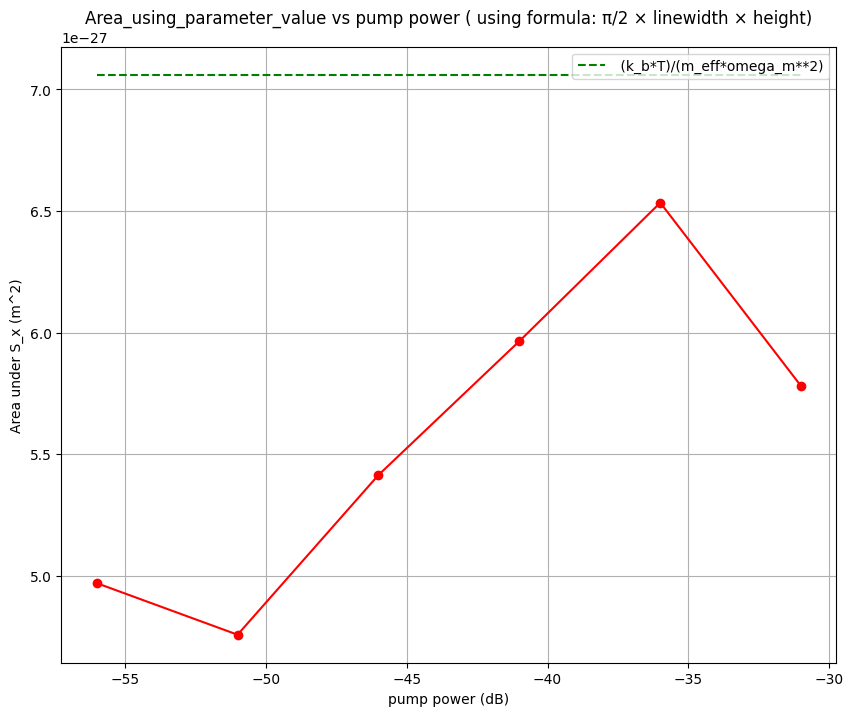

In [71]:

# finding Area and post fitting processing
#  π/2 × linewidth × height. (given in thesis)
for pump_power, p_fitted in Storing_pFinal_215mK.items():
    # Extract parameters from fits
    k_ext = p_fitted[2]  # External coupling rate [rad/s]
    k_tot = p_fitted[1]  # Total damping rate [rad/s]
    w_c = p_fitted[0]    # Resonance frequency [rad/s]
    p_voigt_fit=fitted_parameter_voigt[pump_power]
    print(f" pump power : {pump_power} dB")
    print(f"k_ext: {k_ext/(2*np.pi)} Hz, k_tot: {k_tot/(2*np.pi)} Hz, w_c: {w_c/(2*np.pi)} Hz")
    Γm=2*np.pi*p_voigt_fit[2] 
   
    # Γm=2*np.pi*Γm # Mechanical damping rate in rad/s 
    omega_m=2*np.pi*p_voigt_fit[1]
    
    # omega_m=2*np.pi*omega_m # mechanical frequency in rad/s
    # Convert to noise spectrum output
    
    # Calculate photon number n_d (corrected formula)
    P_in_W = 1e-3 * 10**((pump_power-68)/10) # accounting for attenuation
    detuning = w_d - w_c
    print(f" detuning : {detuning/(2*np.pi)} Hz")
    n_d = (4 * P_in_W * k_ext) / (h_bar * w_d * ((k_tot)**2 + 4*detuning**2))
    # print("parameters: ",P_in_W,k_ext, h_bar, w_d, k_tot, detuning)
    print(f"n_d {n_d:.6e}")
    w=2*np.pi*fitted_curves[pump_power][0]
    S_fitted=fitted_curves[pump_power][1]
    # S_x= k_b*T*Γm/(m_eff*omega_m**2)/((w-omega_m)**2+(omega_m/2)**2)
    factor = 2* (k_ext * G**2 * n_d * h_bar * w_d) / (4*omega_m**2 + k_tot**2)
    print(f" factor: {factor:.6e}, m_eff: {m_eff} kg, omega_m: {omega_m/(2*np.pi)} Hz")
    # S_x=S_fitted / factor  # Convert to PSD of mechanical motion

    area_2=(k_b*T)/(m_eff*omega_m**2)  # area under S_x from equaipartition
    Area_analytical[pump_power]=area_2
    
    area_3=(p_voigt_fit[0]*p_voigt_fit[2]*(np.pi/2)/factor)  # π/2 × linewidth × height 
    Area_using_parameter_value[pump_power]=area_3

# plt.figure(figsize=(10,8))
# plt.plot(list(Area_analytical.keys()), list(Area_analytical.values()), "ro-")
# plt.xlabel("pump power (dB)")
# plt.ylabel("Area under S_x (m^2)")
# plt.grid(True)
# plt.title("Area vs pump power using (k_b*T)/(m_eff*omega_m**2)")
# plt.show()

plt.figure(figsize=(10,8))
plt.plot(list(Area_using_parameter_value.keys()), list(Area_using_parameter_value.values()), "ro-")
plt.hlines(y=Area_analytical[-31], xmin=min(Area_using_parameter_value.keys()), xmax=max(Area_using_parameter_value.keys()), colors='g', linestyles='dashed', label=' (k_b*T)/(m_eff*omega_m**2)')
plt.xlabel("pump power (dB)")
plt.ylabel("Area under S_x (m^2)")
plt.grid(True)
legend()
plt.title("Area_using_parameter_value vs pump power ( using formula: π/2 × linewidth × height)")
plt.show()